In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import time
import numpy as np
import pandas as pd
from selenium import webdriver
import csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import requests
import os
from fake_useragent import UserAgent
import pprint
import ast # changing string dictionaries to dictionaries
import datetime

%matplotlib inline

In [2]:
from nltk.tokenize import PunktSentenceTokenizer #segmentation
from nltk.stem import PorterStemmer #stemming
from nltk.corpus import stopwords #stopwords
from nltk.tag import pos_tag #parts of speech tagging
from nltk.tokenize import WordPunctTokenizer #parts of speech tagging
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer #hashing #TF-IDF
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes
from matplotlib.patches import Wedge
import matplotlib.patches as patches
from matplotlib.path import Path
from textblob import TextBlob
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# ##1 SCRAP THE LINKS

In [3]:
# # testing 2 using xpath
# #https://www.99.co/singapore/rent/condos-apartments
# #https://www.99.co/singapore/commercial/rent?page_num={}

# page = 134
# while page < 401:
#     try:        
#         url = "https://www.99.co/singapore/rent?page_num={}"

#         ua = UserAgent()
#         header = {'user-agent':ua.chrome}

#         response = requests.get(url.format(page), header)
#     #     print(page, url.format(page))
#         HTML = response.text

#         title = Selector(text=HTML).xpath('//h4[@class="SearchListingItem__title__4k6VW listing-list-item__title__map__1U-2y"]//text()').extract() 
#         link = Selector(text=HTML).xpath('//a[@class="listing-list-item__container_innerWrapper__aYra7"]/@href').extract() 
#         details = Selector(text=HTML).xpath('//div[@class="ListingsContainer__listings__1XIV4"]//text()').extract() 
#         agent_name = Selector(text=HTML).xpath('//p[@class="SearchListingItem__listerName__2rKUC ut_xsHide"]/text()').extract()
#         listing_time = Selector(text=HTML).xpath('//div[@class="listing-list-item__tags__2k4Pp"]//text()').extract()
#         rent = Selector(text=HTML).xpath('//div[@class="listing-list-item__price__lihQt"]//text()').extract() 
#         area_sf = Selector(text=HTML).xpath('//span[@class="listing-list-item__sqft__1fFDh"]/text()').extract() 
#         area_m2 = Selector(text=HTML).xpath('//span[@class="listing-list-item__sqm__ln1z9"]/text()').extract()
        
#         # dirty description of the project

#         list = []
#         full_list1 = []
#         for row in details:
#             if row == '〈':
#                 list = []
#                 full_list1.append(list)
#             list.append(row)

#     #   beautiful soup to get clean description of the project
    
#         soup = BeautifulSoup(HTML, 'lxml')

#         try:
#             soup             = soup.find('div', {'class': 'ListingsContainer__listings__1XIV4'})
#         except:
#             soup             = np.nan

#         soup = soup.get_text(separator=' ')
#         string = ''
#         full_list2 = []
#         for row in soup:
#             if row == '〈':
#                 full_list2.append(string)
#                 string = ''
#             if ord(row) < 128:
#                 string += row
#         full_list2.append(string) # the last string is not appended because the row never finds a <, so I need to append it for the last one
#         try:
#             with open("./links2.csv", "a", newline="") as f:
#                 data = csv.writer(f)
#                 for i,job_link in enumerate(link):
#                     data.writerow([page, url.format(page),title[i], link[i], rent[i], area_sf[i], area_m2[i], full_list1[i], full_list2[i+1], agent_name[i], listing_time[i]])
#             print(page, url.format(page))
#             time.sleep(np.random.normal(10,1.123))
#             page += 1
#         except:
#             print(len(area_sf))
#             print(len(area_m2))
#             print(len(agent_name))
#             print(len(listing_time))
#             print(page,"error")
#             page += 1
#             with open("./links2.csv", "a", newline="") as f:
#                 data = csv.writer(f)
#                 data.writerow(['error', 'error','error', 'error', 'error', 'error', 'error', 'error', 'error', 'error', 'error'])

#     except:
#         page += 1
#         time.sleep(np.random.normal(10,1.123))
#         print(page,"error")
#         with open("./links2.csv", "a", newline="") as f:
#             data = csv.writer(f)
#             data.writerow(['error', 'error','error', 'error', 'error', 'error', 'error', 'error', 'error', 'error', 'error'])
#         break

        


134 https://www.99.co/singapore/rent?page_num=134
135 https://www.99.co/singapore/rent?page_num=135
136 https://www.99.co/singapore/rent?page_num=136
137 https://www.99.co/singapore/rent?page_num=137
138 https://www.99.co/singapore/rent?page_num=138
139 https://www.99.co/singapore/rent?page_num=139
140 https://www.99.co/singapore/rent?page_num=140
141 https://www.99.co/singapore/rent?page_num=141
142 https://www.99.co/singapore/rent?page_num=142
143 https://www.99.co/singapore/rent?page_num=143
144 https://www.99.co/singapore/rent?page_num=144
145 https://www.99.co/singapore/rent?page_num=145
146 https://www.99.co/singapore/rent?page_num=146
147 https://www.99.co/singapore/rent?page_num=147
148 https://www.99.co/singapore/rent?page_num=148
149 https://www.99.co/singapore/rent?page_num=149
150 https://www.99.co/singapore/rent?page_num=150
151 https://www.99.co/singapore/rent?page_num=151
152 https://www.99.co/singapore/rent?page_num=152
153 https://www.99.co/singapore/rent?page_num=153


298 https://www.99.co/singapore/rent?page_num=298
299 https://www.99.co/singapore/rent?page_num=299
300 https://www.99.co/singapore/rent?page_num=300
301 https://www.99.co/singapore/rent?page_num=301
302 https://www.99.co/singapore/rent?page_num=302
303 https://www.99.co/singapore/rent?page_num=303
304 https://www.99.co/singapore/rent?page_num=304
305 https://www.99.co/singapore/rent?page_num=305
306 https://www.99.co/singapore/rent?page_num=306
307 https://www.99.co/singapore/rent?page_num=307
308 https://www.99.co/singapore/rent?page_num=308
309 https://www.99.co/singapore/rent?page_num=309
310 https://www.99.co/singapore/rent?page_num=310
311 https://www.99.co/singapore/rent?page_num=311
312 https://www.99.co/singapore/rent?page_num=312
313 https://www.99.co/singapore/rent?page_num=313
314 https://www.99.co/singapore/rent?page_num=314
315 https://www.99.co/singapore/rent?page_num=315
316 https://www.99.co/singapore/rent?page_num=316
317 https://www.99.co/singapore/rent?page_num=317


In [585]:
# df = pd.read_csv('./links2.csv', names = ['page', 'original_url' ,'title', 'link', 'rent', 'area_sf', 'area_m2',
#                                           'description', 'description_clean', 'agent_name', 'listing_time'])
# df.head()

,page,original_url,title,link,rent,area_sf,area_m2,description,description_clean,agent_name,listing_time
0,2,https://www.99.co/singapore/rent?page_num=2,Bishan 8,/singapore/rent/property/bishan-8-condo-EpFnrw...,"$4,000","1,163 sqft",108.05 sqm,"['〈', '〉', '1/10', 'Bishan 8', '61 Bishan Stre...",1/10 Bishan 8 61 Bishan Street 21 D20 Condo...,Faith Yee,20 minutes ago
1,2,https://www.99.co/singapore/rent?page_num=2,Forte Suites,/singapore/rent/property/forte-suites-condo-ub...,"$3,300",614 sqft,57.04 sqm,"['〈', '〉', '1/13', 'Forte Suites', '88 Mergui ...",1/13 Forte Suites 88 Mergui Road D8 Condo 2...,Madeline Chow,22 minutes ago
2,2,https://www.99.co/singapore/rent?page_num=2,Margate Terrace,/singapore/rent/property/margate-road-landed-a...,"$5,900","3,200 sqft",297.29 sqm,"['〈', '〉', '1/5', 'Margate Terrace', 'Margate ...",1/5 Margate Terrace Margate Road D15 Terrac...,Alex Chong,26 minutes ago
3,2,https://www.99.co/singapore/rent?page_num=2,897 Tampines Street 81,/singapore/rent/property/897-tampines-street-8...,"$2,650","1,119 sqft",103.96 sqm,"['〈', '〉', '1/5', '897 Tampines Street 81', 'S...",1/5 897 Tampines Street 81 Singapore 520897 ...,Aaron Ho,28 minutes ago
4,2,https://www.99.co/singapore/rent?page_num=2,423 Clementi Avenue 1,/singapore/rent/property/423-clementi-avenue-1...,"$1,800",500 sqft,46.45 sqm,"['〈', '〉', '1/5', '423 Clementi Avenue 1', 'Si...",1/5 423 Clementi Avenue 1 Singapore 120423 ...,jay loke,28 minutes ago


In [586]:
# # Lets not waste time scrapping double the stuff. Dropping duplicates of the links. 
# df = df.sort_values(['link'])
# df1 = df.reset_index()
# print(df1.shape)
# df2 = df1.drop_duplicates(['link'])
# print(df2.shape)

(10894, 12)
(9872, 12)


In [587]:
# # adding another column which shows the full_link
# df2['full_link'] = 'https://www.99.co' + df2['link']
# df2['full_link'].head()

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    https://www.99.co/singapore/rent/property/1-be...
1    https://www.99.co/singapore/rent/property/1-be...
2    https://www.99.co/singapore/rent/property/1-be...
3    https://www.99.co/singapore/rent/property/1-be...
4    https://www.99.co/singapore/rent/property/1-be...
Name: full_link, dtype: object

# ##2 SCRAPPING EACH LINK

In [593]:
# # Notes to start: 
# # had to figure out how where to scrape, and how to scrap as cleanly as possible
# # selenium is blocked, so can't scrape javascript stuff
        
# property_link = df2['full_link']
# num = len(property_link)

# ua = UserAgent()
# header = {'user-agent':ua.chrome}
        
# for page in range(num):
#     try:
#         response = requests.get(property_link[page], header)
#         print(page, property_link[page])
#         HTML = response.text

#         title = Selector(text=HTML).xpath('//h1[@class="Heading__heading__2ncUp"]//text()').extract()     
#         condo = Selector(text=HTML).xpath('//ol[@class="Breadcrumbs__list__2aVzA"]//text()').extract()
#         mrt = Selector(text=HTML).xpath('//div[@class="NearestMrt__container__1WjgR"]//text()').extract()
#         address = Selector(text=HTML).xpath('//div[@class="Listing__leftColumn__3k7xe"]/p[@class="Text__text__x0JSc"]/text()').extract()
#         listing_time = Selector(text=HTML).xpath('//span[@class="RepostedDate__dateFormatted__2n-fm"]//text()').extract()
#         rent_YN = Selector(text=HTML).xpath('//h3[@class="Listing__listingTypeLabel__35lNJ"]//text()').extract()
#         rental_price = Selector(text=HTML).xpath('//h3[@class="Heading__heading__2ncUp"]//text()').extract()
#         features = Selector(text=HTML).xpath('//p[@class="Text__text__x0JSc Listing__summaryText__1QR5z"]/text()').extract() 
#         amenities = Selector(text=HTML).xpath('//p[@class="Text__text__x0JSc Listing__amenityLabel__CQblY"]/text()').extract()     
#         description = Selector(text=HTML).xpath('//pre[@class="Paragraph__text__lEhtw"]/text()').extract()

#         # agent information
#         agent = Selector(text=HTML).xpath('//h3[@class="SectionTitle__sectionTitle__fSooe"]//text()').extract()
#         agency = Selector(text=HTML).xpath('//div[@class="Enquiry__agentInfo__3AZ2T"]/p[@class="Text__text__x0JSc"][1]/text()').extract()

#         # for the details of the property

#         rental_dict = {}
#         count = 0
#         for i in range(1,10):
#             try:
#                 xpath1 = '//div[@class="Listing__keyDetailItem__2sR9y"][{}]//text()'
#                 rental_details = Selector(text=HTML).xpath(xpath1.format(i)).extract()
#                 rental_dict[rental_details[0]] = rental_details[1]
#                 count += 1
#             except:
#                 pass
#         print(count, "rental_details")

#         # more details on the property

#         property_dict = {}
#         count = 0
#         for i in range(1,10):
#             try:
#                 xpath2 = '//div[@class="ProjectOverviewCard__info__70VMS"]/p[@class="Text__text__x0JSc"][{}]/text()'
#                 property_details = Selector(text=HTML).xpath(xpath2.format(i)).extract()
#                 property_dict[property_details[0]] = property_details[2]
#                 count += 1
#             except:
#                 pass
#         print(count, "property_details")


#         #formatting description
        
#         description2 = ' '.join(description).replace('\n','').replace('\r','').replace('-','')
        
#         #adding time
#         now = datetime.datetime.now()

#         #writing to a csv file

#         with open("./residential_details2.csv", "a", newline="") as f:
#             data = csv.writer(f)
#             data.writerow([now.isoformat(), page, property_link[page],title[0], condo, condo[1], condo[2], mrt, address, listing_time[0], rent_YN[0], rental_price[0], 
#                                features, amenities, rental_dict, agent[0], agency[0], property_dict, description2])
#         time.sleep(np.random.normal(3,0.123))
#         print(address)
#     except:
#         print('error')
#         time.sleep(np.random.normal(3,0.123))
    


0 https://www.99.co/singapore/rent/property/1-beach-road-hdb-VKkDKDELUBDuMYATgK6iR
2 rental_details
3 property_details
['HDB 3 Rooms, District 07, Singapore']
1 https://www.99.co/singapore/rent/property/1-beach-road-hdb-p88KW6HjZTin7Qm9E6fhjm
6 rental_details
3 property_details
['HDB 2 Rooms, District 07, Singapore']
2 https://www.99.co/singapore/rent/property/1-beach-road-hdb-sWmmkkthCR9fFkUuBDwowQ
5 rental_details
3 property_details
['HDB 3 Rooms, District 07, Singapore']
3 https://www.99.co/singapore/rent/property/1-beach-road-hdb-sZFVotNHc3hQkdD4sYKL85
3 rental_details
3 property_details
['HDB 3 Rooms, District 07, Singapore']
4 https://www.99.co/singapore/rent/property/1-beach-road-hdb-tTBk9G5KS8p6idRPnyd4LH
3 rental_details
3 property_details
['HDB 3 Rooms, District 07, Singapore']
5 https://www.99.co/singapore/rent/property/1-canberra-condo-rYhksvdijHPa3kTieGubJ9
5 rental_details
4 property_details
['Canberra Drive, District 27, Singapore']
6 https://www.99.co/singapore/rent/pro

3 rental_details
3 property_details
['HDB 3 Rooms, District 03, Singapore']
54 https://www.99.co/singapore/rent/property/112-ho-ching-road-hdb-CsaQxNvzuKE3cotHNyCiMD
4 rental_details
3 property_details
['HDB 2 Rooms, District 22, Singapore']
55 https://www.99.co/singapore/rent/property/112-ho-ching-road-hdb-G7tNnSVU62yBYNvPzsTJjA
3 rental_details
3 property_details
['HDB 2 Rooms, District 22, Singapore']
56 https://www.99.co/singapore/rent/property/112-ho-ching-road-hdb-WDHdwqJJSCszMzxQLrraVQ
4 rental_details
3 property_details
['HDB 2 Rooms, District 22, Singapore']
57 https://www.99.co/singapore/rent/property/112-jurong-east-street-13-hdb-YdgXSXbMZE7LkK8SaoF93e
3 rental_details
3 property_details
['HDB 4 Rooms, District 22, Singapore']
58 https://www.99.co/singapore/rent/property/112-lengkong-tiga-hdb-3txivKR93XCG8PNiUutGei
4 rental_details
3 property_details
['HDB 4 Rooms, District 14, Singapore']
59 https://www.99.co/singapore/rent/property/112-lorong-3-geylang-hdb-cPNyNhh532dNj2TT

3 property_details
['HDB 5 Rooms, District 25, Singapore']
113 https://www.99.co/singapore/rent/property/123-marsiling-rise-hdb-ggXHwEhbyV4WwjSoyoAM6e
4 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
114 https://www.99.co/singapore/rent/property/124-bedok-north-road-hdb-kSUfVyE29kYDYVNvD7wr6H
7 rental_details
3 property_details
['HDB 3 Rooms, District 16, Singapore']
115 https://www.99.co/singapore/rent/property/125-bedok-north-road-hdb-2QjjbyzAGAwiNvTnGwmyzG
0 rental_details
0 property_details
error
116 https://www.99.co/singapore/rent/property/125-bukit-batok-central-hdb-RmNwkxEMvgWpncdVJQND7T
3 rental_details
3 property_details
['HDB Executive, District 23, Singapore']
117 https://www.99.co/singapore/rent/property/126-ang-mo-kio-avenue-3-hdb-BoAsgPBScjCEH2BLERcPjh
6 rental_details
3 property_details
['HDB 4 Rooms, District 20, Singapore']
118 https://www.99.co/singapore/rent/property/126c-kim-tian-road-hdb-gTvWPNxCHPEvS33E7uAECY
3 rental_details
3 property

3 property_details
['HDB 2 Rooms, District 20, Singapore']
164 https://www.99.co/singapore/rent/property/149-silat-avenue-hdb-CUXg5KVcvKQdxtM2k7qtv3
4 rental_details
3 property_details
['HDB 3 Rooms, District 03, Singapore']
error
error
error
168 https://www.99.co/singapore/rent/property/149-silat-avenue-hdb-nFBvBe5KsefPAyJQ3tacFD
3 rental_details
3 property_details
['HDB 2 Rooms, District 03, Singapore']
169 https://www.99.co/singapore/rent/property/149-tampines-street-12-hdb-BP28VhVMkuNshWxTTJUuSQ
5 rental_details
3 property_details
['HDB Executive, District 18, Singapore']
170 https://www.99.co/singapore/rent/property/152-jalan-teck-whye-hdb-Nw3txv6px2JFtTb89Cw6Nj
4 rental_details
3 property_details
['HDB 4 Rooms, District 23, Singapore']
171 https://www.99.co/singapore/rent/property/152-serangoon-north-avenue-1-hdb-d6LYjXdiKS7cHX2cqGhMfZ
3 rental_details
3 property_details
['District 19, Singapore']
error
error
174 https://www.99.co/singapore/rent/property/154-bishan-street-13-hdb-

['HDB 3 Rooms, District 23, Singapore']
220 https://www.99.co/singapore/rent/property/174-ang-mo-kio-avenue-4-hdb-3PBBQdwezVGaEn3xzJwDXW
3 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
221 https://www.99.co/singapore/rent/property/174-lorong-1-toa-payoh-hdb-MniPutju7s67mHSCDzZnvk
4 rental_details
3 property_details
['HDB 3 Rooms, District 12, Singapore']
222 https://www.99.co/singapore/rent/property/174-lorong-1-toa-payoh-hdb-tC5Bwszmp2qK3Ze2x3DBU7
5 rental_details
3 property_details
['HDB 3 Rooms, District 12, Singapore']
223 https://www.99.co/singapore/rent/property/174-woodlands-street-13-hdb-D9tELwLxJwy2z9z7UQUX7Y
6 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
224 https://www.99.co/singapore/rent/property/174-yishun-avenue-7-hdb-sEVhEaBLZnEm48FPjvAS6
3 rental_details
3 property_details
['HDB 4 Rooms, District 27, Singapore']
225 https://www.99.co/singapore/rent/property/176-ang-mo-kio-avenue-4-hdb-WCHEvANcDR9h3vupD5AVgD
2 ren

4 rental_details
3 property_details
['HDB 4 Rooms, District 12, Singapore']
279 https://www.99.co/singapore/rent/property/204-toa-payoh-north-hdb-dkgjDEwueL24azTCmNaAHa
4 rental_details
3 property_details
['HDB 4 Rooms, District 12, Singapore']
280 https://www.99.co/singapore/rent/property/205-jurong-east-street-21-hdb-rtWvEpoBQavgRJdqtxEfyh
3 rental_details
3 property_details
['HDB 3 Rooms, District 22, Singapore']
281 https://www.99.co/singapore/rent/property/205-yishun-street-21-hdb-Szm6Q7aPfH7SdBkGKw2SLh
3 rental_details
3 property_details
['HDB 4 Rooms, District 27, Singapore']
282 https://www.99.co/singapore/rent/property/208-jurong-east-street-21-hdb-F7ynxhLHbdMWsX8VsPSV8m
4 rental_details
3 property_details
['HDB 3 Rooms, District 22, Singapore']
283 https://www.99.co/singapore/rent/property/209-yishun-street-21-hdb-572RhmG7QzFoDWprgKVF6H
7 rental_details
3 property_details
['HDB 4 Rooms, District 27, Singapore']
284 https://www.99.co/singapore/rent/property/209c-punggol-place-

331 https://www.99.co/singapore/rent/property/232-bishan-street-22-hdb-p6pfqHn3mGWLeK5TgKHTR5
3 rental_details
3 property_details
error
332 https://www.99.co/singapore/rent/property/232-bishan-street-22-hdb-qBfHC6TBZL3P56gW5dnoEQ
3 rental_details
3 property_details
['HDB 4 Rooms, District 20, Singapore']
333 https://www.99.co/singapore/rent/property/232-compassvale-walk-hdb-bue5ovzs5vhcqy2idug9j6
5 rental_details
3 property_details
['HDB 5 Rooms, District 19, Singapore']
334 https://www.99.co/singapore/rent/property/232-pending-road-hdb-8hGfzgEfxogR44RPFyZaQV
3 rental_details
3 property_details
['HDB 3 Rooms, District 23, Singapore']
335 https://www.99.co/singapore/rent/property/233-ang-mo-kio-avenue-3-hdb-RUzg2VevTMuBDz5AdiPbXJ
4 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
336 https://www.99.co/singapore/rent/property/233-bukit-batok-east-avenue-5-hdb-ix4NuCXy98QdmSm5emA3Ho
3 rental_details
3 property_details
['HDB 3 Rooms, District 23, Singapore']
337 ht

['HDB 4 Rooms, District 08, Singapore']
384 https://www.99.co/singapore/rent/property/26-jalan-klinik-hdb-4NwRd9feQjmno9geXJZ9bF
0 rental_details
0 property_details
error
385 https://www.99.co/singapore/rent/property/26-newton-condo-fptQxoXKr38DogNEKi2JWQ
5 rental_details
4 property_details
['Newton Road, District 11, Singapore']
386 https://www.99.co/singapore/rent/property/26-teck-whye-lane-hdb-Tjov8cBRrdWgcCrcn8joM6
3 rental_details
3 property_details
['HDB 3 Rooms, District 23, Singapore']
387 https://www.99.co/singapore/rent/property/26-toa-payoh-east-hdb-8Fx7U4FJpB9t5n2oLHNx57
5 rental_details
3 property_details
['HDB 3 Rooms, District 12, Singapore']
388 https://www.99.co/singapore/rent/property/26-toa-payoh-east-hdb-xAtLZ9LZFEppkosUEwWFbQ
5 rental_details
3 property_details
['HDB 3 Rooms, District 12, Singapore']
389 https://www.99.co/singapore/rent/property/262b-compassvale-street-hdb-ooVstchmcsjZMkPqrkBR9n
5 rental_details
3 property_details
['HDB Executive, District 19, Sing

3 rental_details
3 property_details
['HDB Executive, District 23, Singapore']
433 https://www.99.co/singapore/rent/property/288d-jurong-east-street-21-hdb-SKttHD5BNN6f3ty9qajriT
4 rental_details
3 property_details
['HDB 5 Rooms, District 22, Singapore']
434 https://www.99.co/singapore/rent/property/289-yishun-avenue-6-hdb-tw4ogkBiBLEYoHsyGipEHF
2 rental_details
3 property_details
['HDB 5 Rooms, District 27, Singapore']
error
436 https://www.99.co/singapore/rent/property/289c-bukit-batok-street-25-hdb-kiXG4QpVmDdbQiCHRLgAS8
4 rental_details
3 property_details
['HDB 5 Rooms, District 23, Singapore']
437 https://www.99.co/singapore/rent/property/289c-bukit-batok-street-25-hdb-o7NFfxVgyNmz6tWRLeZTXH
4 rental_details
3 property_details
['HDB 5 Rooms, District 23, Singapore']
438 https://www.99.co/singapore/rent/property/28c-dover-crescent-hdb-3cwpaRVkGep3Pxhu23jzea
3 rental_details
3 property_details
error
error
440 https://www.99.co/singapore/rent/property/28c-dover-crescent-hdb-9fKqv98EsK

4 rental_details
2 property_details
['HDB 2 Rooms, District 19, Singapore']
495 https://www.99.co/singapore/rent/property/309-canberra-road-hdb-s9ZzUXKarQi2EPWg3r2CM
3 rental_details
3 property_details
['HDB 5 Rooms, District 27, Singapore']
496 https://www.99.co/singapore/rent/property/30a-holland-close-hdb-tDEdbyhiuCirtVspGgevC9
3 rental_details
3 property_details
error
497 https://www.99.co/singapore/rent/property/31-holland-close-hdb-QoLb4gXuWm6rCyURWJ9q8g
3 rental_details
3 property_details
['HDB 5 Rooms, District 10, Singapore']
498 https://www.99.co/singapore/rent/property/31-marine-crescent-hdb-dxUwqyysaXw54VCaq6RAqE
5 rental_details
3 property_details
['HDB 2 Rooms, District 15, Singapore']
499 https://www.99.co/singapore/rent/property/31-marine-crescent-hdb-mFWL4qhYNMi2xVUNmXU6Wg
7 rental_details
3 property_details
['HDB 3 Rooms, District 15, Singapore']
500 https://www.99.co/singapore/rent/property/310-clementi-avenue-4-hdb-T6gwX6wiDGqYRPN7sJEFCQ
8 rental_details
3 property_

['HDB 4 Rooms, District 27, Singapore']
544 https://www.99.co/singapore/rent/property/341-sembawang-close-hdb-tZ3q7525TktqYNUNVTMxNC
6 rental_details
3 property_details
['HDB 5 Rooms, District 27, Singapore']
545 https://www.99.co/singapore/rent/property/341a-sembawang-close-hdb-2jGXGR2XhqQG4oQLmvxR7c
4 rental_details
3 property_details
['HDB 5 Rooms, District 27, Singapore']
546 https://www.99.co/singapore/rent/property/344-ang-mo-kio-avenue-3-hdb-BKMhEee9wGMtyjaq2EekBj
7 rental_details
3 property_details
['HDB 4 Rooms, District 20, Singapore']
547 https://www.99.co/singapore/rent/property/345-ang-mo-kio-avenue-3-hdb-Ei8bEUmTrF6UEJzuP85hdP
5 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
548 https://www.99.co/singapore/rent/property/345-clementi-avenue-5-hdb-2rXkXTM8imZGQvEeskcciR
5 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
549 https://www.99.co/singapore/rent/property/345-jurong-east-street-31-hdb-w4VTtmzNfG3xYgL9vWYw8o
3 ren

error
596 https://www.99.co/singapore/rent/property/359b-admiralty-drive-hdb-vR2SioMSVxeAyMGUatC2VQ
6 rental_details
3 property_details
['HDB Executive, District 27, Singapore']
597 https://www.99.co/singapore/rent/property/359b-admiralty-drive-hdb-xab3bZR4PJyWKYJq6ccUmX
6 rental_details
3 property_details
['HDB Executive, District 27, Singapore']
598 https://www.99.co/singapore/rent/property/361-bukit-batok-street-31-hdb-pZADW5rs3Asrx5Jn9xNsvX
3 rental_details
3 property_details
['HDB 3 Rooms, District 23, Singapore']
599 https://www.99.co/singapore/rent/property/363-clementi-avenue-2-hdb-WotU3L32bKFDfusGFQprtP
3 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
error
error
602 https://www.99.co/singapore/rent/property/364-clementi-avenue-2-hdb-bosGYydHBsLAVVbLiiCdq5
3 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
603 https://www.99.co/singapore/rent/property/365-yishun-ring-road-hdb-5pJ4nypSpCJjMUNgdRfBSR
6 rental_details
3 property

3 property_details
['HDB Executive, District 25, Singapore']
652 https://www.99.co/singapore/rent/property/403-woodlands-street-41-hdb-gnYpzwW2diwMuszmchJNAN
2 rental_details
3 property_details
['HDB Executive, District 25, Singapore']
653 https://www.99.co/singapore/rent/property/405-bedok-north-avenue-3-hdb-J25NAAnvXYPEFhi6xqn6hn
7 rental_details
3 property_details
['HDB 3 Rooms, District 16, Singapore']
654 https://www.99.co/singapore/rent/property/405b-fernvale-lane-hdb-5FX96Bj6UyeRKdyoDzj5XB
3 rental_details
3 property_details
['HDB 4 Rooms, District 28, Singapore']
error
error
error
error
error
error
error
error
error
error
error
error
error
668 https://www.99.co/singapore/rent/property/405b-fernvale-lane-hdb-tCHWFypJznMwuFxfofty9P
3 rental_details
3 property_details
['HDB 4 Rooms, District 28, Singapore']
669 https://www.99.co/singapore/rent/property/406-bukit-batok-west-avenue-7-hdb-Kit87p2PYVsrfAvBtyb9ZB
3 rental_details
3 property_details
['HDB Executive, District 23, Singapo

['HDB 3 Rooms, District 12, Singapore']
720 https://www.99.co/singapore/rent/property/44-lorong-5-toa-payoh-hdb-KhBxwmHPFabEWxth8Di4QS
3 rental_details
3 property_details
['HDB 3 Rooms, District 12, Singapore']
721 https://www.99.co/singapore/rent/property/441b-clementi-avenue-3-hdb-PJE4mS27NxTVQRnjGAiD9E
3 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
722 https://www.99.co/singapore/rent/property/441b-clementi-avenue-3-hdb-Xg3jbFeawh7CeZjX5q6t59
3 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
error
error
error
error
727 https://www.99.co/singapore/rent/property/442a-bukit-batok-west-avenue-8-hdb-5wtiunfmvsf6mZkHcUGBSQ
3 rental_details
2 property_details
['HDB 5 Rooms, District 23, Singapore']
728 https://www.99.co/singapore/rent/property/445-ang-mo-kio-avenue-10-hdb-bbDsjvJPGyvRtUr5HhqwSQ
4 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
729 https://www.99.co/singapore/rent/property/445a-fernvale-road-hd

5 rental_details
3 property_details
['HDB 5 Rooms, District 18, Singapore']
780 https://www.99.co/singapore/rent/property/49-hoy-fatt-road-hdb-ermqDERTA3ZVgjA39WoeQk
3 rental_details
3 property_details
['HDB 4 Rooms, District 03, Singapore']
781 https://www.99.co/singapore/rent/property/49-telok-blangah-drive-hdb-LZiPvfpocSrsqi2xzTbXHZ
3 rental_details
3 property_details
['HDB 3 Rooms, District 04, Singapore']
782 https://www.99.co/singapore/rent/property/490d-choa-chu-kang-avenue-5-hdb-UXFGrpfhAP7wnd2EKBY4r3
2 rental_details
3 property_details
['HDB 4 Rooms, District 23, Singapore']
783 https://www.99.co/singapore/rent/property/491g-tampines-street-45-hdb-TkXnRgDmaVWWy3CxKAgt3b
4 rental_details
3 property_details
['HDB 5 Rooms, District 18, Singapore']
784 https://www.99.co/singapore/rent/property/495b-tampines-street-43-hdb-y8SiJnp7hNQRYQKcnfRZQC
3 rental_details
3 property_details
['HDB Executive, District 18, Singapore']
785 https://www.99.co/singapore/rent/property/4b-boon-tiong-r

error
error
error
833 https://www.99.co/singapore/rent/property/524-serangoon-north-avenue-4-hdb-KasLbcaWN7gtBehoco48R
4 rental_details
3 property_details
['HDB 5 Rooms, District 19, Singapore']
834 https://www.99.co/singapore/rent/property/525-choa-chu-kang-street-51-hdb-DKfi2y6G7vS6sNHqcrSC4U
4 rental_details
3 property_details
['HDB Executive, District 23, Singapore']
835 https://www.99.co/singapore/rent/property/525-woodlands-drive-14-hdb-EkaySFiPJBLGhTvsbkeVfV
7 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
836 https://www.99.co/singapore/rent/property/525-woodlands-drive-14-hdb-gjmMVTNiAW9fxT9s7zrTLe
2 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
837 https://www.99.co/singapore/rent/property/527-bedok-north-street-3-hdb-xCScsKTr3z8QsGJK3fgdr3
4 rental_details
3 property_details
['HDB 4 Rooms, District 16, Singapore']
838 https://www.99.co/singapore/rent/property/527-choa-chu-kang-street-51-hdb-SiqSEk2iHsY5VHRS5zXGDV
4 renta

6 rental_details
3 property_details
['HDB 3 Rooms, District 15, Singapore']
886 https://www.99.co/singapore/rent/property/580-pasir-ris-street-53-hdb-KYjtj4cqUgLzV3ifcDmV7o
4 rental_details
3 property_details
['HDB Executive, District 18, Singapore']
887 https://www.99.co/singapore/rent/property/583-pasir-ris-street-53-hdb-Sz6XDzxGSgCgDzmAMwAvQf
3 rental_details
3 property_details
['HDB Executive, District 18, Singapore']
888 https://www.99.co/singapore/rent/property/583-pasir-ris-street-53-hdb-sD5TyyQanu6TeqMFSe9pZL
5 rental_details
3 property_details
['HDB Executive, District 18, Singapore']
889 https://www.99.co/singapore/rent/property/583-woodlands-drive-16-hdb-2rYgGrLhcXYUnRkcGj9RE4
4 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
890 https://www.99.co/singapore/rent/property/585-ang-mo-kio-avenue-3-hdb-Us7Dx7Acjdw2v5YJPmvSqU
4 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
891 https://www.99.co/singapore/rent/property/585-ang-

3 property_details
['HDB 5 Rooms, District 05, Singapore']
940 https://www.99.co/singapore/rent/property/605-senja-road-hdb-qdTvVwXvV4rN3NcvUpohND
5 rental_details
3 property_details
['HDB 4 Rooms, District 23, Singapore']
error
error
943 https://www.99.co/singapore/rent/property/605-woodlands-drive-42-hdb-ndTmjBQuTvcpPCQZZjfaz4
5 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
944 https://www.99.co/singapore/rent/property/607-ang-mo-kio-avenue-4-hdb-CTyfWZwd9kJRYKXqPZEK4A
4 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
945 https://www.99.co/singapore/rent/property/607-ang-mo-kio-avenue-4-hdb-j2u9Jg97jmZMpLJGLPCAib
4 rental_details
3 property_details
['HDB 3 Rooms, District 20, Singapore']
946 https://www.99.co/singapore/rent/property/608-clementi-west-street-1-hdb-NmWKXmY6bhk2pskAwcBgZM
7 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
947 https://www.99.co/singapore/rent/property/609-ang-mo-kio-avenue-4-h

991 https://www.99.co/singapore/rent/property/65-circuit-road-hdb-ZXAAU9TgTzK4v6FHpVofTB
3 rental_details
3 property_details
['District 13, Singapore']
992 https://www.99.co/singapore/rent/property/650-woodlands-ring-road-hdb-xiFUHd5qQe854QHLf9VoEi
7 rental_details
3 property_details
['HDB Executive, District 25, Singapore']
993 https://www.99.co/singapore/rent/property/651b-jurong-west-street-61-hdb-UJePhhf7u2rScnUfX6Cy7S
4 rental_details
3 property_details
['HDB 4 Rooms, District 22, Singapore']
994 https://www.99.co/singapore/rent/property/653-yishun-avenue-4-hdb-E4NmwqGszu8V6wcfxrejD
4 rental_details
3 property_details
['HDB 3 Rooms, District 27, Singapore']
995 https://www.99.co/singapore/rent/property/655-yishun-avenue-4-hdb-6pxAdXrnGdELvftgpPLTN3
4 rental_details
3 property_details
error
996 https://www.99.co/singapore/rent/property/657a-jurong-west-street-65-hdb-MTssFySV7pQ6jgVvKijM5K
7 rental_details
3 property_details
['HDB 4 Rooms, District 22, Singapore']
997 https://www.99

2 rental_details
3 property_details
['HDB 5 Rooms, District 22, Singapore']
1044 https://www.99.co/singapore/rent/property/686a-woodlands-drive-73-hdb-SHSDEVbYz6SdYQo63vCoXg
2 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
1045 https://www.99.co/singapore/rent/property/686b-jurong-west-central-1-hdb-aGWCBoqpos4BP5WzTUfure
4 rental_details
3 property_details
['HDB 5 Rooms, District 22, Singapore']
1046 https://www.99.co/singapore/rent/property/686c-woodlands-drive-73-hdb-DFva3nYEQtDYc9YDsiAKLg
3 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
1047 https://www.99.co/singapore/rent/property/687-jurong-west-central-1-hdb-dLRKesuN3iS5Afbcwyp5Ng
3 rental_details
3 property_details
['HDB Executive, District 22, Singapore']
1048 https://www.99.co/singapore/rent/property/687c-woodlands-drive-75-hdb-RCwT2D8WX8Dn6HociMyoa8
2 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
1049 https://www.99.co/singapore/rent/property/

error
1093 https://www.99.co/singapore/rent/property/707-yishun-avenue-5-hdb-PHo3Y4pfPV7yJCPU3PZfp
3 rental_details
3 property_details
['HDB 3 Rooms, District 27, Singapore']
1094 https://www.99.co/singapore/rent/property/709-woodlands-drive-70-hdb-F4ct3XCYEKoV8L9frs2n5A
5 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
1095 https://www.99.co/singapore/rent/property/711-clementi-west-street-2-hdb-GtbMGbsaoXgPJVEGxm9ENP
5 rental_details
3 property_details
['HDB 3 Rooms, District 05, Singapore']
1096 https://www.99.co/singapore/rent/property/711-clementi-west-street-2-hdb-tKAcZNpzGuFJNT4Jdb69Vn
5 rental_details
3 property_details
['HDB 4 Rooms, District 05, Singapore']
1097 https://www.99.co/singapore/rent/property/711-woodlands-drive-70-hdb-yK7iojEw4y9jVARctxbuiG
4 rental_details
3 property_details
['HDB 4 Rooms, District 25, Singapore']
1098 https://www.99.co/singapore/rent/property/712-pasir-ris-street-72-hdb-i86tJn9c5Pf96cvr3RnbRM
7 rental_details
3 property

['Shenton Way, District 02, Singapore']
1160 https://www.99.co/singapore/rent/property/76-shenton-condo-B5sYuBE7XuwjBQXaM3TS9E
4 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1161 https://www.99.co/singapore/rent/property/76-shenton-condo-BE38ve2qF7pKv2cbQebXPg
2 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1162 https://www.99.co/singapore/rent/property/76-shenton-condo-BUSjNhfPRea8MLCxY5X7uQ
4 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1163 https://www.99.co/singapore/rent/property/76-shenton-condo-BxovWDnKE8rq35gvAvzHpb
3 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1164 https://www.99.co/singapore/rent/property/76-shenton-condo-Din3SSDWcV8ECtpL66utzZ
5 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1165 https://www.99.co/singapore/rent/property/76-shenton-condo-Dr6cSfK2ou6FLYcL7HMJh9
8 rental_details
4 property_details
['Shenton Way, Distric

5 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1211 https://www.99.co/singapore/rent/property/76-shenton-condo-ySdYsiRcnmJXMYwoS5wsRb
4 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
error
error
error
error
error
error
error
error
error
error
error
error
error
1225 https://www.99.co/singapore/rent/property/76-shenton-condo-yxMMhqhYdDDBBaXYrZCCAm
4 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
1226 https://www.99.co/singapore/rent/property/760-woodlands-avenue-6-hdb-RupbnjCjzRZWUjsEX7r8gU
3 rental_details
3 property_details
['HDB 5 Rooms, District 25, Singapore']
1227 https://www.99.co/singapore/rent/property/760-yishun-street-72-hdb-CzDChksjUe53856omG3W4D
4 rental_details
3 property_details
['HDB 3 Rooms, District 27, Singapore']
1228 https://www.99.co/singapore/rent/property/763-yishun-street-72-hdb-Xsn2Sr6sqMSfBc4ATRkhYA
6 rental_details
3 property_details
['HDB 3 Rooms, District 27, Singapore']
1229 

['HDB 3 Rooms, District 19, Singapore']
1276 https://www.99.co/singapore/rent/property/809-yishun-ring-road-hdb-KjrU9PpoxTxDEoW9aTSSz8
3 rental_details
3 property_details
['HDB 5 Rooms, District 27, Singapore']
1277 https://www.99.co/singapore/rent/property/809b-choa-chu-kang-avenue-1-hdb-K3H8gospid5sqveL4R4cYL
6 rental_details
2 property_details
['HDB 3 Rooms, District 23, Singapore']
1278 https://www.99.co/singapore/rent/property/81-redhill-lane-hdb-5SrXcVSYCLGeB6FQcxmesT
7 rental_details
3 property_details
['HDB 5 Rooms, District 03, Singapore']
1279 https://www.99.co/singapore/rent/property/814-jurong-west-street-81-hdb-ZYAWiAuiDFYuGQp5UghyhM
3 rental_details
3 property_details
['HDB 5 Rooms, District 22, Singapore']
error
error
1282 https://www.99.co/singapore/rent/property/815-jellicoe-road-hdb-BxMGmve5Sv2M6KDC9Fju3L
3 rental_details
3 property_details
['HDB 5 Rooms, District 08, Singapore']
error
error
error
1286 https://www.99.co/singapore/rent/property/815b-choa-chu-kang-avenu

['HDB 4 Rooms, District 03, Singapore']
1331 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-dv7azxPMMTEuhAbT5ZEA2X
5 rental_details
3 property_details
['HDB 4 Rooms, District 03, Singapore']
error
error
1334 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-gUujKVQETzqcA2K7o7bsQH
5 rental_details
3 property_details
['HDB 4 Rooms, District 03, Singapore']
error
error
1337 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-hYWiJnwrsAopzhyLZbXcVY
5 rental_details
3 property_details
['HDB 4 Rooms, District 03, Singapore']
1338 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-mwapNcPfHxJQiSSCEcNovi
0 rental_details
0 property_details
error
1339 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-xr7D3jBdsfVYtExhCb3Uxf
6 rental_details
3 property_details
['HDB 4 Rooms, District 03, Singapore']
1340 https://www.99.co/singapore/rent/property/91-tanglin-halt-road-hdb-yHxmKELZvzU8wqDifzVmXU
5 rental_details
3 p

1385 https://www.99.co/singapore/rent/property/alba-condo-E2HEyuxeBUxyH4S6fDaW7d
8 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1386 https://www.99.co/singapore/rent/property/alba-condo-EQ4FfAuLSJcrc2ZkGy5HKL
8 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1387 https://www.99.co/singapore/rent/property/alba-condo-G8dDyVDaREeLzs7mrPKGnK
6 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1388 https://www.99.co/singapore/rent/property/alba-condo-H4msS9p8BuBtTpD9SDAVec
3 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1389 https://www.99.co/singapore/rent/property/alba-condo-LUowySVYxmvmR9grFFoJbX
8 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1390 https://www.99.co/singapore/rent/property/alba-condo-MNKz5uTYnAbE9X75FDHhhT
5 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
1391 https://www.99.co/singapore/rent/pr

1438 https://www.99.co/singapore/rent/property/altez-condo-5S4PM9nbEcPBW8gLAfNzHh
5 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1439 https://www.99.co/singapore/rent/property/altez-condo-649pWZNV25UPBRBXpLKBgM
5 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1440 https://www.99.co/singapore/rent/property/altez-condo-78swQjUK8GxCD8NrMELq6R
2 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1441 https://www.99.co/singapore/rent/property/altez-condo-7CCEa8ZHx7cXUk4UGq3T2N
7 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1442 https://www.99.co/singapore/rent/property/altez-condo-7ikJJAM2CGVkfEjLZKGY94
2 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1443 https://www.99.co/singapore/rent/property/altez-condo-8GKEYoYXK7i3e78LpBRKmZ
0 rental_details
0 property_details
error
1444 https://www.99.co/singapore/rent/property/altez-condo-8j94nEsB3cVmtETHJ

3 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1490 https://www.99.co/singapore/rent/property/altez-condo-TwHrGhmFo6zWNsvNtZ4vjV
7 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1491 https://www.99.co/singapore/rent/property/altez-condo-UFivsuotZSByyfrnNRPiUT
7 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1492 https://www.99.co/singapore/rent/property/altez-condo-UJEuPLHDK3ixD8YGJMjkyD
6 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1493 https://www.99.co/singapore/rent/property/altez-condo-UjG5dmaNWYSoHsbiSMQJsb
6 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1494 https://www.99.co/singapore/rent/property/altez-condo-UjLQKcTYgrzQXEaLnmuvk8
0 rental_details
0 property_details
error
1495 https://www.99.co/singapore/rent/property/altez-condo-VVsg3BTquzMfgzvfawCyS5
2 rental_details
4 property_details
['Enggor Street, District 02, Singapore'

5 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1543 https://www.99.co/singapore/rent/property/altez-condo-sQbmuzpenyrDNqGZduK3PU
3 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1544 https://www.99.co/singapore/rent/property/altez-condo-skC9dN9tpbZikBzvZ7E9Mb
3 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1545 https://www.99.co/singapore/rent/property/altez-condo-t3rsPzSEt4MEaQCWARigEg
7 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1546 https://www.99.co/singapore/rent/property/altez-condo-tJVbuaYQDRdncBnBQ8DR2M
4 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1547 https://www.99.co/singapore/rent/property/altez-condo-to4Lq2TLijUqMXhmMvMMrG
5 rental_details
4 property_details
['Enggor Street, District 02, Singapore']
1548 https://www.99.co/singapore/rent/property/altez-condo-trfArQgMYY5YvKbdpT5qiR
5 rental_details
4 property_details
['En

5 rental_details
0 property_details
['District 11, Singapore']
1596 https://www.99.co/singapore/rent/property/andrews-terrace-landed-5fV3UvckoN2tK4RDLc6BZE
2 rental_details
4 property_details
['Andrews Terrace, District 27, Singapore']
1597 https://www.99.co/singapore/rent/property/andrews-terrace-landed-Avd5KMi8EyHkagBhCcTXVN
2 rental_details
4 property_details
['Andrews Terrace, District 27, Singapore']
1598 https://www.99.co/singapore/rent/property/ang-mo-kio-avenue-1-landed-QtQMQeahyRocQ7iazgNTUE
4 rental_details
2 property_details
['Ang Mo Kio Avenue 1, District 20, Singapore']
1599 https://www.99.co/singapore/rent/property/ang-mo-kio-avenue-1-landed-hd2AmMUTxn3S8fUnADVVv7
4 rental_details
2 property_details
['Ang Mo Kio Avenue 1, District 20, Singapore']
1600 https://www.99.co/singapore/rent/property/ang-mo-kio-avenue-10-landed-HK5sRMFNTn7Dr75dY6BFM5
5 rental_details
0 property_details
['District 20, Singapore']
1601 https://www.99.co/singapore/rent/property/angullia-park-residen

6 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1644 https://www.99.co/singapore/rent/property/ardmore-residence-condo-fSnHsGbPi5QEsMvTqQnWuE
4 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1645 https://www.99.co/singapore/rent/property/ardmore-residence-condo-gMC85u3BpHaL4f3aQego5L
4 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1646 https://www.99.co/singapore/rent/property/ardmore-residence-condo-mAJbeZE66XKYEh3QtBV9qj
5 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1647 https://www.99.co/singapore/rent/property/ardmore-residence-condo-mxFft6gCcKvoRFXb3bgusE
7 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1648 https://www.99.co/singapore/rent/property/ardmore-residence-condo-nFXhuoPstkRQbbSAS85nGK
4 rental_details
4 property_details
['Ardmore Park, District 10, Singapore']
1649 https://www.99.co/singapore/rent/property/ardmore-residence-con

7 rental_details
4 property_details
['Coronation Road West, District 10, Singapore']
1718 https://www.99.co/singapore/rent/property/astrid-meadows-condo-c2G58EtSXJdwmM66yXtRQh
3 rental_details
4 property_details
['Coronation Road West, District 10, Singapore']
1719 https://www.99.co/singapore/rent/property/atrium-residences-condo-h69egS4gATszbF5qMJs8LC
3 rental_details
4 property_details
['Geylang Road, District 14, Singapore']
1720 https://www.99.co/singapore/rent/property/atrium-residences-condo-kuQYPbXyT5kBR42YeWnHUa
3 rental_details
4 property_details
['Lorong 28 Geylang, District 14, Singapore']
1721 https://www.99.co/singapore/rent/property/atrium-residences-condo-z3PToDSSke9rdjyMryDLZ6
5 rental_details
4 property_details
['Lorong 28 Geylang, District 14, Singapore']
1722 https://www.99.co/singapore/rent/property/auralis-condo-E2CvBMH6WMxtS9UX3WKPYX
2 rental_details
4 property_details
['East Coast Road, District 15, Singapore']
1723 https://www.99.co/singapore/rent/property/aural

6 rental_details
0 property_details
['District 11, Singapore']
1766 https://www.99.co/singapore/rent/property/barker-road-landed-5D5FCNYYAH2GeZaYLa22qd
6 rental_details
0 property_details
['District 11, Singapore']
1767 https://www.99.co/singapore/rent/property/barker-road-landed-CNZ5Y7EYucfbHM8GowUvt
2 rental_details
0 property_details
['District 11, Singapore']
1768 https://www.99.co/singapore/rent/property/barker-road-landed-EuajUkTogvQ8LnQpzeaJBc
4 rental_details
0 property_details
['District 11, Singapore']
1769 https://www.99.co/singapore/rent/property/barker-road-landed-GysDksMNNBj7J3w6uYR49a
7 rental_details
0 property_details
['District 11, Singapore']
1770 https://www.99.co/singapore/rent/property/barker-road-landed-JvY8pUohnJX6RTExDz92hg
4 rental_details
0 property_details
['District 11, Singapore']
1771 https://www.99.co/singapore/rent/property/barker-road-landed-QESqqB7Ntnd3eHczsVUd8F
4 rental_details
0 property_details
['District 11, Singapore']
1772 https://www.99.co/sin

4 property_details
error
1823 https://www.99.co/singapore/rent/property/bedok-place-landed-5iJX3eJrjFKyifzDF3V9yP
3 rental_details
4 property_details
['Bedok Place, District 16, Singapore']
1824 https://www.99.co/singapore/rent/property/bedok-place-landed-Kg7hsMsweCz6Qvyaf5payC
0 rental_details
0 property_details
error
1825 https://www.99.co/singapore/rent/property/bedok-place-landed-xu99wq8SmxmrXhDVoTSzjN
5 rental_details
4 property_details
['Bedok Place, District 16, Singapore']
1826 https://www.99.co/singapore/rent/property/bedok-residences-condo-2izSeWTspQKsmnc4oQFmWC
3 rental_details
4 property_details
['Bedok North Drive, District 16, Singapore']
1827 https://www.99.co/singapore/rent/property/bedok-residences-condo-87uCjSkYrxiehbG5MeUWWM
5 rental_details
4 property_details
['Bedok North Drive, District 16, Singapore']
1828 https://www.99.co/singapore/rent/property/bedok-residences-condo-D4t7KWD8qU6vHZTDdseohX
6 rental_details
4 property_details
['Bedok North Drive, District 16, S

2 rental_details
0 property_details
['District 10, Singapore']
error
error
error
1878 https://www.99.co/singapore/rent/property/belmont-road-landed-Z7ESFaRckwJFiF4Z3ZpEEb
5 rental_details
0 property_details
['District 10, Singapore']
1879 https://www.99.co/singapore/rent/property/belmont-road-landed-aPHPVo6FcyxmGts2gRpsiN
3 rental_details
0 property_details
['District 10, Singapore']
1880 https://www.99.co/singapore/rent/property/belmont-road-landed-bFMsoTydPu3ixptef3zmMN
7 rental_details
0 property_details
['District 10, Singapore']
1881 https://www.99.co/singapore/rent/property/belmont-road-landed-zbfBVAfaQv8EFN7U4QgBCm
4 rental_details
0 property_details
['District 10, Singapore']
error
1883 https://www.99.co/singapore/rent/property/berrima-road-landed-hUuyf22JayVjfiZWcVEHXV
3 rental_details
3 property_details
['Berrima Road, District 11, Singapore']
1884 https://www.99.co/singapore/rent/property/berwick-drive-landed-cVnMaFchNA4h4V8f4BMEH6
6 rental_details
3 property_details
['Berwi

1929 https://www.99.co/singapore/rent/property/bijou-condo-qxDTCKEbkWM4LTYC6zyepk
4 rental_details
4 property_details
['Jalan Mat Jambol, District 05, Singapore']
1930 https://www.99.co/singapore/rent/property/bijou-condo-rQUnoSgY6c4aschHyTUmdk
7 rental_details
4 property_details
['Jalan Mat Jambol, District 05, Singapore']
1931 https://www.99.co/singapore/rent/property/bijou-condo-ssZEDpzuxuxaGfZF7guo4J
7 rental_details
4 property_details
['Jalan Mat Jambol, District 05, Singapore']
1932 https://www.99.co/singapore/rent/property/bijou-condo-tpRZ6hT6yumtrRKX5GGD8T
4 rental_details
4 property_details
['Jalan Mat Jambol, District 05, Singapore']
1933 https://www.99.co/singapore/rent/property/bijou-condo-v336mnaaLSV842YrZNfJY3
6 rental_details
4 property_details
['Jalan Mat Jambol, District 05, Singapore']
1934 https://www.99.co/singapore/rent/property/bijou-condo-wR82ZAJSRDv9nctXz2mTYF
5 rental_details
4 property_details
error
1935 https://www.99.co/singapore/rent/property/bijou-condo-xB

['Bishan Street 21, District 20, Singapore']
1981 https://www.99.co/singapore/rent/property/bishan-8-condo-cukNvtpQpLesTcyVE3byqY
3 rental_details
4 property_details
['Bishan Street 21, District 20, Singapore']
1982 https://www.99.co/singapore/rent/property/bishan-8-condo-dF7q66FZYrLZqL5kTM3EHF
6 rental_details
4 property_details
['Bishan Street 21, District 20, Singapore']
1983 https://www.99.co/singapore/rent/property/bishan-8-condo-dT4vo8sUBZR9vK9VZ4qRzi
3 rental_details
4 property_details
['Bishan Street 21, District 20, Singapore']
1984 https://www.99.co/singapore/rent/property/bishan-8-condo-dh75hG5NM7MSKSY2LCdMYE
4 rental_details
4 property_details
['Bishan Street 21, District 20, Singapore']
1985 https://www.99.co/singapore/rent/property/bishan-8-condo-dqUi2BiUFdzBYUxmWYTmsE
4 rental_details
4 property_details
['Bishan Street 21, District 20, Singapore']
1986 https://www.99.co/singapore/rent/property/bishan-8-condo-eboM3RjLzQzMfAJgTtXrTb
4 rental_details
4 property_details
['Bi

2029 https://www.99.co/singapore/rent/property/boathouse-residences-condo-WpuRL2TAKqLRP6dANt9MuS
5 rental_details
4 property_details
error
2030 https://www.99.co/singapore/rent/property/boon-lay-drive-landed-nJqWqhY52LkznWN4wx2oVo
4 rental_details
0 property_details
['District 22, Singapore']
2031 https://www.99.co/singapore/rent/property/boon-lay-drive-landed-nfaKsEUTcESi4Ps7m9Adof
5 rental_details
0 property_details
['District 22, Singapore']
2032 https://www.99.co/singapore/rent/property/boon-lay-drive-landed-sxCX7Cmz6v7kd9EHz546G9
5 rental_details
0 property_details
['District 22, Singapore']
2033 https://www.99.co/singapore/rent/property/boon-teck-towers-condo-rycit7wLZhdvWvfUThVag5
5 rental_details
4 property_details
['Boon Teck Road, District 12, Singapore']
2034 https://www.99.co/singapore/rent/property/boonview-condo-5r9gKGtvZRJRL9d9WoWr6A
3 rental_details
4 property_details
['Marymount Terrace, District 20, Singapore']
2035 https://www.99.co/singapore/rent/property/boonview-c

2079 https://www.99.co/singapore/rent/property/bridport-avenue-landed-mStizHLM7J5XKGbo9PAfe4
3 rental_details
3 property_details
error
2080 https://www.99.co/singapore/rent/property/bridport-avenue-landed-nUkBaS3WkkeBe72iatzUFo
6 rental_details
3 property_details
['Bridport Avenue, District 19, Singapore']
2081 https://www.99.co/singapore/rent/property/brighton-crescent-landed-94kWbkwtyyKdcWt6C7W3wY
6 rental_details
4 property_details
['Brighton Crescent, District 19, Singapore']
2082 https://www.99.co/singapore/rent/property/brighton-crescent-landed-VuHY5XUJQRwnRxW5pKTDtA
3 rental_details
4 property_details
['Brighton Crescent, District 19, Singapore']
2083 https://www.99.co/singapore/rent/property/brighton-crescent-landed-xRmAKcst7aeRKYqpLndRu7
6 rental_details
0 property_details
['District 19, Singapore']
2084 https://www.99.co/singapore/rent/property/brizay-park-landed-vCg4PfnMV7ynKy4f3XMYBK
5 rental_details
2 property_details
['Brizay Park, District 10, Singapore']
2085 https://ww

2146 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-MkZBk6AfeQ9eNahfebFH7e
5 rental_details
4 property_details
error
2147 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-T8iUwXjACSgqk9Atr7KrRH
6 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
2148 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-TtYv6cgSEqXjP7V9HHcsD6
5 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
2149 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-VDNhwJznq4gotJLqX9zFzV
5 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
2150 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-VJKcFx9bbKwPTghCKCVTUe
4 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
2151 https://www.99.co/singapore/rent/property/cairnhill-crest-condo-Z3vEdz8b8Lhyh6jVFtNGFC
6 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
2

['Keppel Bay Drive, District 04, Singapore']
2197 https://www.99.co/singapore/rent/property/caribbean-at-keppel-bay-condo-9uatRUoJkqMvgZgph2wyNe
3 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2198 https://www.99.co/singapore/rent/property/caribbean-at-keppel-bay-condo-A68rvX8bwWrpnQf5pd6VYn
3 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2199 https://www.99.co/singapore/rent/property/caribbean-at-keppel-bay-condo-BHUmN9ie3BtmxtZccTa6rG
3 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2200 https://www.99.co/singapore/rent/property/caribbean-at-keppel-bay-condo-BhEp8E2VZABg8q48auxA5Z
4 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2201 https://www.99.co/singapore/rent/property/caribbean-at-keppel-bay-condo-FE5oUSeJLjdub9yqYkfEmH
4 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2202 https://www.99.co/singapore/rent/property/car

8 rental_details
4 property_details
['Lim Tua Tow Road, District 19, Singapore']
2247 https://www.99.co/singapore/rent/property/casa-cambio-condo-tSdW9gtXESG8f9YR9CqUd3
6 rental_details
4 property_details
['Lim Tua Tow Road, District 19, Singapore']
2248 https://www.99.co/singapore/rent/property/casa-esperanza-condo-9EMp4ZsRpzahE7N4kZFgtF
7 rental_details
4 property_details
['Bukit Timah Road, District 21, Singapore']
2249 https://www.99.co/singapore/rent/property/casa-irrawaddy-condo-nUH5ETcoKGedL8Ecy6BBQo
2 rental_details
4 property_details
['Irrawaddy Road, District 12, Singapore']
2250 https://www.99.co/singapore/rent/property/casa-irrawaddy-condo-s5K79V8X7TXKRyiyH3tPee
5 rental_details
4 property_details
['Irrawaddy Road, District 12, Singapore']
2251 https://www.99.co/singapore/rent/property/casa-melwani-condo-LTHbdP2LqCkfasBk7vzTLg
7 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
2252 https://www.99.co/singapore/rent/property/casa-merah-condo-3ZTvozXJ5

4 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2301 https://www.99.co/singapore/rent/property/caspian-condo-fuaWahicRR4VCdxyyyYwZe
5 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2302 https://www.99.co/singapore/rent/property/caspian-condo-kXa8xuKswBNQEx2yuwGKzM
2 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2303 https://www.99.co/singapore/rent/property/caspian-condo-kkCgxYRtX7sYn9KjZDyUtP
2 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2304 https://www.99.co/singapore/rent/property/caspian-condo-qTTSVdy2Ts7FW6Y2y7EuXK
4 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2305 https://www.99.co/singapore/rent/property/caspian-condo-ruZ3C745sM3Xbgz5V4P59U
3 rental_details
4 property_details
['Lakeside Drive, District 22, Singapore']
2306 https://www.99.co/singapore/rent/property/caspian-condo-uJCWGNA3js6qv8ZF5b6QW8
4 rental_details
4 pro

4 rental_details
4 property_details
['Cavenagh Road, District 09, Singapore']
2356 https://www.99.co/singapore/rent/property/cavenagh-lodge-condo-wBRCFAUDZa5DdV94cTgtoc
2 rental_details
4 property_details
['Cavenagh Road, District 09, Singapore']
2357 https://www.99.co/singapore/rent/property/cavendish-park-condo-6z4XgeQ4LsCUpxLtzFzAqB
5 rental_details
4 property_details
['Pine Grove, District 21, Singapore']
2358 https://www.99.co/singapore/rent/property/cavendish-park-condo-v4uQ3ve2fJsCfTMP6mAWpF
4 rental_details
4 property_details
['Pine Grove, District 21, Singapore']
2359 https://www.99.co/singapore/rent/property/cedarwood-grove-landed-Vuxx4h9kZgnyBUMPznSUHY
5 rental_details
4 property_details
['Cedarwood Grove, District 25, Singapore']
2360 https://www.99.co/singapore/rent/property/cedarwood-grove-landed-dvkmLUUUpt9JfVWrnpfdAD
5 rental_details
0 property_details
['District 25, Singapore']
2361 https://www.99.co/singapore/rent/property/centra-loft-condo-x77sRERUG2ZV7iJiapY74E
4 re

2403 https://www.99.co/singapore/rent/property/centro-residences-condo-GNjaTJQjRquGzEdFm8RpHQ
7 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2404 https://www.99.co/singapore/rent/property/centro-residences-condo-GtHiVdQTihp4iqwMiDWwnj
3 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2405 https://www.99.co/singapore/rent/property/centro-residences-condo-HPggmccAFhKY7bUfaodVJk
4 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2406 https://www.99.co/singapore/rent/property/centro-residences-condo-HmrNSj3zb6PPL7WxNthf3n
5 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2407 https://www.99.co/singapore/rent/property/centro-residences-condo-L2vmj4amqc8xv7Uj7TD2sC
4 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2408 https://www.99.co/singapore/rent/property/centro-residences-condo-LKwXZMfoWdroonFX9pDJMh
5 rental_details

3 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2452 https://www.99.co/singapore/rent/property/centro-residences-condo-iAXntSLQopuAxMu8ctMCY7
3 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2453 https://www.99.co/singapore/rent/property/centro-residences-condo-iYQHALyW89CjvpjNyQde7D
4 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2454 https://www.99.co/singapore/rent/property/centro-residences-condo-ik6zJhHeEKS7HD9v3dc67U
6 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2455 https://www.99.co/singapore/rent/property/centro-residences-condo-j23sjDx3iVMSyb3bYnpzjF
2 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2456 https://www.99.co/singapore/rent/property/centro-residences-condo-j5KgwZrNc7nkTpzWs4YBE
3 rental_details
4 property_details
['Ang Mo Kio Avenue 8, District 20, Singapore']
2457 https://www.99.co/sing

['Chancery Lane, District 11, Singapore']
2499 https://www.99.co/singapore/rent/property/chancery-lane-landed-dPbd6bNyHoQzbeYCCgPW83
5 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
2500 https://www.99.co/singapore/rent/property/chancery-lane-landed-dQHazRFvW38JfSp5fDYzKR
3 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
2501 https://www.99.co/singapore/rent/property/chancery-lane-landed-e9MZwqoEmGrCCkLeBW8U7n
5 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
2502 https://www.99.co/singapore/rent/property/chancery-lane-landed-eF53b44MkjcpxLVYvrK6u4
4 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
2503 https://www.99.co/singapore/rent/property/chancery-lane-landed-eRc4Gyhn24VuLTdzCwePwB
2 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
2504 https://www.99.co/singapore/rent/property/chancery-lane-landed-eT88RjEV8eY4p3HQNcm9se
3 rental_details
0 pro

2550 https://www.99.co/singapore/rent/property/chartwell-drive-landed-g94jXSvm5Mh3mNNybkGarn
6 rental_details
3 property_details
['Chartwell Drive, District 19, Singapore']
2551 https://www.99.co/singapore/rent/property/chelsea-gardens-condo-4vTgs83HnvFLiU3x6AaG4c
4 rental_details
4 property_details
['Walshe Road, District 10, Singapore']
2552 https://www.99.co/singapore/rent/property/chelsea-grove-condo-dUCbdzkvxBYvaYqXaZVBQi
3 rental_details
4 property_details
['Martaban Road, District 12, Singapore']
2553 https://www.99.co/singapore/rent/property/chelsea-lodge-condo-PdGMtMtc4FVuDFGG3HBsfg
3 rental_details
4 property_details
['Tanjong Katong Road, District 15, Singapore']
2554 https://www.99.co/singapore/rent/property/chelsea-lodge-condo-f7Tt2T3Mjx9UWvNaWfuend
2 rental_details
4 property_details
['Tanjong Katong Road, District 15, Singapore']
2555 https://www.99.co/singapore/rent/property/chelsea-lodge-condo-gX227ixUDUtL5s9kEVJERX
7 rental_details
4 property_details
['Tanjong Katong 

['Beach Road, District 07, Singapore']
2615 https://www.99.co/singapore/rent/property/city-gate-condo-g4CAWSNkaVB55gw8tYSJ8Y
7 rental_details
4 property_details
['Beach Road, District 07, Singapore']
2616 https://www.99.co/singapore/rent/property/city-gate-condo-gak5dKP8ZiYkUwNU6KeS3T
4 rental_details
4 property_details
['Beach Road, District 07, Singapore']
2617 https://www.99.co/singapore/rent/property/city-gate-condo-hDs2qJmScJ34u3gGNtjDwU
3 rental_details
4 property_details
['Beach Road, District 07, Singapore']
2618 https://www.99.co/singapore/rent/property/city-gate-condo-hrEczBzFmKuhejqSwMrBbj
3 rental_details
4 property_details
error
2619 https://www.99.co/singapore/rent/property/city-gate-condo-hta7uywUhqHvG8cMRiWXHV
5 rental_details
4 property_details
['Beach Road, District 07, Singapore']
error
2621 https://www.99.co/singapore/rent/property/city-gate-condo-i7fpaYHKHqcQQcSbKaUqQf
3 rental_details
4 property_details
['Beach Road, District 07, Singapore']
2622 https://www.99.co

['Jellicoe Road, District 08, Singapore']
2674 https://www.99.co/singapore/rent/property/citylights-condo-4GdHqWDRGcSWUF4bWqY5TE
2 rental_details
4 property_details
['Jellicoe Road, District 08, Singapore']
2675 https://www.99.co/singapore/rent/property/citylights-condo-6UytdxiqUBBzaLtNFdG3sj
5 rental_details
4 property_details
['Jellicoe Road, District 08, Singapore']
2676 https://www.99.co/singapore/rent/property/citylights-condo-8Pw84Fjr56grLNBBoiRMt7
3 rental_details
4 property_details
error
2677 https://www.99.co/singapore/rent/property/citylights-condo-Cf5UCUng4LbW7FGhJmUWLc
6 rental_details
4 property_details
['Jellicoe Road, District 08, Singapore']
2678 https://www.99.co/singapore/rent/property/citylights-condo-DgsgRiqwUGBGFSTx6J9mXF
6 rental_details
4 property_details
['Jellicoe Road, District 08, Singapore']
2679 https://www.99.co/singapore/rent/property/citylights-condo-GSrQ8qBURpLJoMpccY52VQ
6 rental_details
4 property_details
['Jellicoe Road, District 08, Singapore']
2680

3 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2727 https://www.99.co/singapore/rent/property/cliveden-at-grange-condo-EfDn7KXyZCj8wmvQbE53Me
6 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2728 https://www.99.co/singapore/rent/property/cliveden-at-grange-condo-H6GKFDGypUBXyG6EBeBHM4
5 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2729 https://www.99.co/singapore/rent/property/cliveden-at-grange-condo-KwvNuUhzyj4XqyxCEeJSTW
6 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2730 https://www.99.co/singapore/rent/property/cliveden-at-grange-condo-LVYgmoyLVMHGHhYuS3yri
3 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2731 https://www.99.co/singapore/rent/property/cliveden-at-grange-condo-MEweWmnQ3ACWxi8Y6cXyFL
4 rental_details
4 property_details
['Grange Road, District 10, Singapore']
2732 https://www.99.co/singapore/rent/property/cliveden-at-grange-cond

3 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2777 https://www.99.co/singapore/rent/property/commonwealth-towers-condo-RKsBcnBNQr2gofKpSGqo4P
6 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2778 https://www.99.co/singapore/rent/property/commonwealth-towers-condo-S8haDSTAmojrTXXznUV7W9
5 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2779 https://www.99.co/singapore/rent/property/commonwealth-towers-condo-TG7zPdZgroaywEpAJJnnrB
3 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2780 https://www.99.co/singapore/rent/property/commonwealth-towers-condo-TYR864VkCw3ooGH9R3a6JF
3 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2781 https://www.99.co/singapore/rent/property/commonwealth-towers-condo-UGBbqqjgTZPnNQ5pgYoRk4
6 rental_details
4 property_details
['Commonwealth Avenue, District 03, Singapore']
2782 https://www

5 rental_details
4 property_details
['Keppel Bay Drive, District 04, Singapore']
2826 https://www.99.co/singapore/rent/property/coronation-road-landed-wuYqkr7EgRLWAxKh28moqH
5 rental_details
4 property_details
['Coronation Road, District 10, Singapore']
2827 https://www.99.co/singapore/rent/property/coronation-road-west-landed-JwewdFZKttt9w4QeMZvtC7
6 rental_details
0 property_details
['District 10, Singapore']
2828 https://www.99.co/singapore/rent/property/coronation-road-west-landed-Vup4VCvNH5n2sVS3NjkTak
5 rental_details
0 property_details
['District 10, Singapore']
2829 https://www.99.co/singapore/rent/property/coronation-road-west-landed-Xr8M9c5UKHGQFuckJdWzgh
4 rental_details
0 property_details
['District 10, Singapore']
2830 https://www.99.co/singapore/rent/property/coronation-road-west-landed-YYGogKK9mNBikUQsnqFhqH
4 rental_details
0 property_details
['District 10, Singapore']
2831 https://www.99.co/singapore/rent/property/coronation-road-west-landed-hxTQHwRRZKT8zykUuY3e7h
3 re

6 rental_details
0 property_details
['District 04, Singapore']
2876 https://www.99.co/singapore/rent/property/cove-way-landed-mYrK6CSrPeCnYrUUHtV57Y
3 rental_details
3 property_details
['Cove Way, District 04, Singapore']
2877 https://www.99.co/singapore/rent/property/cowdray-avenue-landed-6pEq3SjREcKa96awVApsPe
4 rental_details
3 property_details
['Cowdray Avenue, District 19, Singapore']
2878 https://www.99.co/singapore/rent/property/cowdray-avenue-landed-qgXADTNZTX3WTHFYbuVDVX
3 rental_details
3 property_details
['Cowdray Avenue, District 19, Singapore']
error
2880 https://www.99.co/singapore/rent/property/cradels-condo-anA6pmJtn6QgAFn4ZkMcmE
5 rental_details
4 property_details
['Lorong Limau, District 12, Singapore']
2881 https://www.99.co/singapore/rent/property/craig-place-condo-2oDwRnQ9LGnrXJC4JBa6sB
8 rental_details
4 property_details
['Craig Road, District 02, Singapore']
2882 https://www.99.co/singapore/rent/property/craig-place-condo-JKL5AvYqK6myKbx3Kqgozb
8 rental_details
4

5 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2932 https://www.99.co/singapore/rent/property/cyan-condo-6jbYZaN52aSfGZL2JMgw3S
4 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2933 https://www.99.co/singapore/rent/property/cyan-condo-9CLHxoELPKZRjDvWjegmc6
3 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2934 https://www.99.co/singapore/rent/property/cyan-condo-9q6ppN3jEPRDNnRcSZE7k6
3 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2935 https://www.99.co/singapore/rent/property/cyan-condo-AoDyBktzLLvGJivonThuwa
5 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2936 https://www.99.co/singapore/rent/property/cyan-condo-Ar6SMKt6N996Wz2YvFBExe
3 rental_details
4 property_details
['Keng Chin Road, District 10, Singapore']
2937 https://www.99.co/singapore/rent/property/cyan-condo-AriVnNMzRSQD4Qan3BkTtQ
3 rental_details
4 property_details
['Ke

['District 10, Singapore']
2986 https://www.99.co/singapore/rent/property/dalvey-estate-landed-fQtLXZyAQt87Ja8b8Q7qkd
5 rental_details
3 property_details
['Dalvey Estate, District 10, Singapore']
2987 https://www.99.co/singapore/rent/property/dalvey-estate-landed-myBd72B3e6bjWFx7syMxLj
5 rental_details
3 property_details
['Dalvey Estate, District 10, Singapore']
2988 https://www.99.co/singapore/rent/property/dchateau-shelford-condo-Wo4TXixvysk7pyuN9PmmLG
5 rental_details
4 property_details
['Shelford Road, District 11, Singapore']
2989 https://www.99.co/singapore/rent/property/de-centurion-condo-PH5LtjxktyBTHV9jKsXDcG
2 rental_details
4 property_details
['Tanjong Rhu Road, District 15, Singapore']
error
error
2992 https://www.99.co/singapore/rent/property/delfi-orchard-condo-6ZjCQyUtGSngFqr7SzoxtG
3 rental_details
4 property_details
['Orchard Road, District 09, Singapore']
2993 https://www.99.co/singapore/rent/property/delfi-orchard-condo-ERgC9jPagrqDAhLT8TDcTH
3 rental_details
4 prope

3039 https://www.99.co/singapore/rent/property/dmira-condo-TCy7LuCSLQAAXJVFvxtKq6
5 rental_details
4 property_details
['Boon Teck Road, District 12, Singapore']
3040 https://www.99.co/singapore/rent/property/dmira-condo-d9MQ2fwz3WaKws2tMACWP9
4 rental_details
4 property_details
['Boon Teck Road, District 12, Singapore']
3041 https://www.99.co/singapore/rent/property/dnest-condo-8dcUK2aKSdKK5hcbWkSWgC
6 rental_details
4 property_details
['Pasir Ris Grove, District 18, Singapore']
3042 https://www.99.co/singapore/rent/property/dnest-condo-Co29AjKVjDyNMZ7cZRhRsW
5 rental_details
4 property_details
['Pasir Ris Grove, District 18, Singapore']
3043 https://www.99.co/singapore/rent/property/dnest-condo-PSGYMJtBfdpmPGnHNvRk64
4 rental_details
4 property_details
['Pasir Ris Grove, District 18, Singapore']
3044 https://www.99.co/singapore/rent/property/dnest-condo-TZaitkrXPstP2eQQPJDkR8
4 rental_details
4 property_details
['Pasir Ris Grove, District 18, Singapore']
3045 https://www.99.co/singapo

2 rental_details
0 property_details
['District 11, Singapore']
3104 https://www.99.co/singapore/rent/property/dunearn-road-landed-CRACSJj7YMrAhc7HQZy2Jd
2 rental_details
0 property_details
['District 11, Singapore']
3105 https://www.99.co/singapore/rent/property/dunearn-road-landed-NNjgK5AKhY7XK7EZL8hhM9
6 rental_details
0 property_details
['District 11, Singapore']
3106 https://www.99.co/singapore/rent/property/dunearn-road-landed-XaznMXp6RRxqPRtZatwTjL
4 rental_details
0 property_details
['District 11, Singapore']
3107 https://www.99.co/singapore/rent/property/dunearn-road-landed-Z8C257cxfBL5hZQFCwpDed
5 rental_details
0 property_details
['District 11, Singapore']
3108 https://www.99.co/singapore/rent/property/dunearn-suites-condo-d4hsdtPyom3eGEDJL7BEZL
5 rental_details
4 property_details
['Dunearn Road, District 11, Singapore']
3109 https://www.99.co/singapore/rent/property/dunsfold-drive-landed-6Gj47k794KauiPYqJc6u7D
5 rental_details
3 property_details
['Dunsfold Drive, District 13

7 rental_details
4 property_details
['Palm Road, District 15, Singapore']
3168 https://www.99.co/singapore/rent/property/east-sussex-lane-landed-TgytsVfoqnUstWrLPttbsV
7 rental_details
0 property_details
['District 10, Singapore']
3169 https://www.99.co/singapore/rent/property/east-treasure-condo-VzyjocLmMki3QvrVc3ExrX
3 rental_details
4 property_details
['Lorong N Telok Kurau, District 15, Singapore']
3170 https://www.99.co/singapore/rent/property/east-village-condo-YKmmRJJZff47npc7ioz74H
4 rental_details
4 property_details
['Upper Changi Road, District 16, Singapore']
3171 https://www.99.co/singapore/rent/property/eastern-lagoon-condo-7ij6Vu8S9faSdWaiZFZ6z4
3 rental_details
4 property_details
['Upper East Coast Road, District 15, Singapore']
3172 https://www.99.co/singapore/rent/property/eastern-lagoon-condo-D4qJXbXTKfEraFZimQqvFT
3 rental_details
4 property_details
['Upper East Coast Road, District 16, Singapore']
3173 https://www.99.co/singapore/rent/property/eastern-lagoon-condo-D

3228 https://www.99.co/singapore/rent/property/eco-condo-UUjCimeuRH7QKbQaT6sGZK
2 rental_details
4 property_details
error
3229 https://www.99.co/singapore/rent/property/eco-condo-dRfhHEc4AWLi9td7F5PNLA
2 rental_details
4 property_details
error
3230 https://www.99.co/singapore/rent/property/eco-condo-rUMGa8mVJuARwVXUBZrZ8f
2 rental_details
4 property_details
['Bedok South Avenue 3, District 16, Singapore']
3231 https://www.99.co/singapore/rent/property/eco-condo-rt3tLtU3ec4LyGV7hWTC83
5 rental_details
4 property_details
error
3232 https://www.99.co/singapore/rent/property/eco-condo-s2nScfpBRkvk7Pf3BC5Xva
2 rental_details
4 property_details
['Bedok South Avenue 3, District 16, Singapore']
3233 https://www.99.co/singapore/rent/property/eco-sanctuary-condo-iuWYaDrFvxhAdVbW9diQQE
5 rental_details
4 property_details
['Chestnut Avenue, District 23, Singapore']
3234 https://www.99.co/singapore/rent/property/eco-sanctuary-condo-tJmS9mTydhybq8doifmd3Z
3 rental_details
4 property_details
['Chestn

3280 https://www.99.co/singapore/rent/property/elizabeth-towers-condo-yjG4FLZDTPsWgmfqeZUc9U
2 rental_details
4 property_details
['Mount Elizabeth, District 09, Singapore']
3281 https://www.99.co/singapore/rent/property/ellington-square-landed-f3xFGmEEKGJ7YwPk6KvqAo
3 rental_details
4 property_details
['Ellington Square, District 20, Singapore']
3282 https://www.99.co/singapore/rent/property/emerald-garden-condo-8LsgFGwkAJL8SKCQBc9SZ9
4 rental_details
4 property_details
['Club Street, District 01, Singapore']
3283 https://www.99.co/singapore/rent/property/emerald-garden-condo-GRypiG9YYenKMZcFLrt9eD
4 rental_details
4 property_details
['Club Street, District 01, Singapore']
3284 https://www.99.co/singapore/rent/property/emerald-garden-condo-RrED7WT9W8Foyj3uLmmz66
3 rental_details
4 property_details
['Club Street, District 01, Singapore']
3285 https://www.99.co/singapore/rent/property/emerald-garden-condo-hosyWFDbyKLEqoPPHfqfFC
3 rental_details
4 property_details
['Club Street, District 

2 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
3335 https://www.99.co/singapore/rent/property/eon-shenton-condo-vTh3EpzG7MsKY6ZcMsm5dH
7 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
3336 https://www.99.co/singapore/rent/property/eon-shenton-condo-y7xZgMezpEQ7CcPWmZmnLT
5 rental_details
4 property_details
['Shenton Way, District 02, Singapore']
3337 https://www.99.co/singapore/rent/property/escada-view-condo-c9kq8yX6CTgUKn2aCzE98A
5 rental_details
4 property_details
['Lengkong Empat, District 14, Singapore']
3338 https://www.99.co/singapore/rent/property/espada-condo-5W5Y4T9TL3fTwvEfS2pS74
3 rental_details
4 property_details
['Saint Thomas Walk, District 09, Singapore']
3339 https://www.99.co/singapore/rent/property/espada-condo-8PhSTdVJBN29hsAKEFqx77
5 rental_details
4 property_details
['Saint Thomas Walk, District 09, Singapore']
3340 https://www.99.co/singapore/rent/property/espada-condo-BoRLARcTDb4NtRNEjcAhu8
5 rental_details

3 rental_details
2 property_details
['Everton Road, District 02, Singapore']
3390 https://www.99.co/singapore/rent/property/ewart-park-landed-hA7n8otaksb4E28gXEWmFM
3 rental_details
0 property_details
['District 10, Singapore']
3391 https://www.99.co/singapore/rent/property/ewe-boon-regent-condo-fVMmFD5M7co4RcrWny7Kmi
3 rental_details
4 property_details
['Ewe Boon Road, District 10, Singapore']
3392 https://www.99.co/singapore/rent/property/ewe-boon-regent-condo-gkCmuyqWvxAotBcyv7ND8N
6 rental_details
4 property_details
['Ewe Boon Road, District 10, Singapore']
3393 https://www.99.co/singapore/rent/property/faber-avenue-landed-zVZ2QLVp974roi7cE3dj9n
6 rental_details
4 property_details
['Faber Avenue, District 05, Singapore']
3394 https://www.99.co/singapore/rent/property/faber-crest-condo-ebcNVRLaAGEqFdvqK4TKDe
4 rental_details
4 property_details
['Faber Heights, District 05, Singapore']
3395 https://www.99.co/singapore/rent/property/faber-garden-condominium-condo-fxD5cU54LHzPYXTY4qL5y

['Tampines Road, District 19, Singapore']
3456 https://www.99.co/singapore/rent/property/fortune-park-condo-vrbxZiAWtY3jya6efjL3w4
3 rental_details
4 property_details
['Tampines Road, District 19, Singapore']
3457 https://www.99.co/singapore/rent/property/fortville-condo-Ljk6cZtmr5MfHY3dfbq28E
3 rental_details
4 property_details
['Fort Road, District 15, Singapore']
3458 https://www.99.co/singapore/rent/property/fortville-condo-Mg2rYTe3LJMB7FQsYuNa3
3 rental_details
4 property_details
['Fort Road, District 15, Singapore']
3459 https://www.99.co/singapore/rent/property/fortville-condo-Zj6MyMwDRN5jGPAVsJ5nGe
3 rental_details
4 property_details
['Fort Road, District 15, Singapore']
3460 https://www.99.co/singapore/rent/property/four-seasons-park-condo-4PjnyuHXEHjJ2JcMiV2Vi3
3 rental_details
4 property_details
['Cuscaden Walk, District 10, Singapore']
3461 https://www.99.co/singapore/rent/property/four-seasons-park-condo-f3aZiZ5m5ui4RkmVKRBNjb
5 rental_details
4 property_details
['Cuscaden

3511 https://www.99.co/singapore/rent/property/gem-residences-condo-x8HqmeGbemJvM4kVQuEDkW
5 rental_details
4 property_details
['Lorong 5 Toa Payoh, District 12, Singapore']
3512 https://www.99.co/singapore/rent/property/gentle-drive-landed-DoLvFKqBfUsPN5DeKpmRSE
0 rental_details
0 property_details
error
3513 https://www.99.co/singapore/rent/property/gentle-drive-landed-uCsm3KsFmXmv3FJc5dZTLM
4 rental_details
4 property_details
['Gentle Drive, District 11, Singapore']
3514 https://www.99.co/singapore/rent/property/geylang-road-landed-i5EJeJfiDvyiv4KoV22NQB
4 rental_details
2 property_details
['Geylang Road, District 14, Singapore']
3515 https://www.99.co/singapore/rent/property/gillenia-condo-vefSfkKFPBUHXGMMvuz9jX
2 rental_details
4 property_details
['Rosyth Road, District 19, Singapore']
3516 https://www.99.co/singapore/rent/property/gilstead-38-condo-pgYxAKwjAtaD27YW7KVoPR
3 rental_details
4 property_details
['Gilstead Road, District 11, Singapore']
3517 https://www.99.co/singapore/

4 rental_details
4 property_details
['Lorong K Telok Kurau, District 15, Singapore']
3562 https://www.99.co/singapore/rent/property/gold-palm-mansions-condo-vEZNjYkKs7MSYhK9eRFFnN
8 rental_details
4 property_details
['Lorong K Telok Kurau, District 15, Singapore']
3563 https://www.99.co/singapore/rent/property/gold-palm-mansions-condo-zJR8o6pEaY8gFVmvmzETLM
4 rental_details
4 property_details
['Lorong K Telok Kurau, District 15, Singapore']
3564 https://www.99.co/singapore/rent/property/golden-heights-condo-k9rr78dxcNi75TNVnZGQ4S
4 rental_details
4 property_details
error
3565 https://www.99.co/singapore/rent/property/golden-walk-landed-45fmftQsyWHbaAgUBbeAb8
6 rental_details
3 property_details
['Golden Walk, District 19, Singapore']
3566 https://www.99.co/singapore/rent/property/golden-walk-landed-RxeTfGxLaWmkm9mgBGaYxe
4 rental_details
3 property_details
['Golden Walk, District 19, Singapore']
3567 https://www.99.co/singapore/rent/property/goldenhill-park-condominium-condo-f2CexgQJ4Gc

8 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3613 https://www.99.co/singapore/rent/property/grange-70-condo-cJtPW7JFrYYFfLAz52H7i7
5 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3614 https://www.99.co/singapore/rent/property/grange-70-condo-emXPieFZ4wzAU8k8HPHMq5
5 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3615 https://www.99.co/singapore/rent/property/grange-70-condo-ffMxUPsSQy8dETkEjFmxUm
6 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3616 https://www.99.co/singapore/rent/property/grange-70-condo-grD7FVd9E8tdQz8bGg5nZK
6 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3617 https://www.99.co/singapore/rent/property/grange-70-condo-hm4CF48xA6UWz3PFT3mak9
2 rental_details
4 property_details
['Grange Road, District 10, Singapore']
3618 https://www.99.co/singapore/rent/property/grange-70-condo-iHzXpu2YugSfDKYCEJe8U
5 rental_details
4 property_d

3663 https://www.99.co/singapore/rent/property/greenleaf-view-landed-FPTV5gAdhyVZu4U8GVLpok
3 rental_details
2 property_details
['Greenleaf View, District 10, Singapore']
3664 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-2eWN6nnGjtdtPyPwnmf2pR
4 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3665 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-3Wm5H3XBxo4BitAarUjThj
6 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3666 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-3rm6xCo27uoyevJr6gKk6k
5 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3667 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-5Nz5GE7GwhrEAgXY5oDgQ7
2 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3668 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-7tarxGpHWEdXqEvYEkkFpa
5 rental_details
4 property_details

3710 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-yUKyAjhVNi8fSViJNxjZbR
4 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3711 https://www.99.co/singapore/rent/property/greenwood-avenue-landed-zQCmProELuJAAZgscFaioM
4 rental_details
4 property_details
['Greenwood Avenue, District 11, Singapore']
3712 https://www.99.co/singapore/rent/property/greenwood-crescent-landed-Z9T9VAKAQMUvaEoi5owwNA
4 rental_details
4 property_details
['Greenwood Crescent, District 11, Singapore']
3713 https://www.99.co/singapore/rent/property/greenwood-crescent-landed-j8GYtX3gFvq3hqEx6etwLg
6 rental_details
4 property_details
['Greenwood Crescent, District 11, Singapore']
3714 https://www.99.co/singapore/rent/property/greenwood-crescent-landed-uL8py57pejbgfHmBs7Rvvi
6 rental_details
4 property_details
['Greenwood Crescent, District 11, Singapore']
3715 https://www.99.co/singapore/rent/property/greenwood-lane-landed-uqjbxDy27LZoc9nVDVV2Pg
3 rental_details
4 pr

6 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3760 https://www.99.co/singapore/rent/property/hana-condo-RbxqbV42Vwi358Yv5BXBVB
3 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3761 https://www.99.co/singapore/rent/property/hana-condo-TYDeHjjL8vuHwCQkMFpwZV
6 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3762 https://www.99.co/singapore/rent/property/hana-condo-VWQuNSwGyKpzK2cmq2CMMX
5 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3763 https://www.99.co/singapore/rent/property/hana-condo-ZLZzYi3hX34zcudMwJKgbZ
7 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3764 https://www.99.co/singapore/rent/property/hana-condo-ZbLY4nDjF7LH3SyDXiEiS5
5 rental_details
4 property_details
['Tomlinson Road, District 10, Singapore']
3765 https://www.99.co/singapore/rent/property/hana-condo-eKzstrNJdzCJDmiFXeBVm6
6 rental_details
4 property_details
['To

3815 https://www.99.co/singapore/rent/property/heritage-view-condo-xzkrK4k2FLi2Ad4C7aZ2wF
5 rental_details
4 property_details
['Dover Rise, District 05, Singapore']
3816 https://www.99.co/singapore/rent/property/heron-bay-condo-FHUTXcK5ehyw39VNMUdr96
5 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
3817 https://www.99.co/singapore/rent/property/heron-bay-condo-SdPMTC3MFceHmKu7uBuMQi
5 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
3818 https://www.99.co/singapore/rent/property/heron-bay-condo-f2M9Zsw9f4tckZJpWRTFHG
2 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
3819 https://www.99.co/singapore/rent/property/heron-bay-condo-hsky8bjDMWtGhHoGqEgmzA
4 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
3820 https://www.99.co/singapore/rent/property/heron-bay-condo-oYh5Dqc34xujSzAYps2dEW
4 rental_details
4 property_details
['Upper Serangoon View, Distr

3869 https://www.99.co/singapore/rent/property/high-park-residences-condo-koSxk7MJSy8LrSnRtUjWpZ
3 rental_details
4 property_details
['Fernvale Road, District 28, Singapore']
3870 https://www.99.co/singapore/rent/property/high-park-residences-condo-mYTopToFisrCEneqsyoa7d
2 rental_details
4 property_details
['Fernvale Road, District 28, Singapore']
3871 https://www.99.co/singapore/rent/property/high-park-residences-condo-oGaEtBdyH25mruDbfRkcRe
6 rental_details
4 property_details
['Fernvale Road, District 28, Singapore']
3872 https://www.99.co/singapore/rent/property/high-park-residences-condo-prJLa4mV7gwpnCcF8BsXPe
3 rental_details
4 property_details
['Fernvale Road, District 28, Singapore']
3873 https://www.99.co/singapore/rent/property/high-park-residences-condo-sLK6DmAbyfqsXjMGgSW68b
2 rental_details
4 property_details
['Fernvale Road, District 28, Singapore']
3874 https://www.99.co/singapore/rent/property/high-park-residences-condo-sy5debxMK9QhztU2qXw3tN
3 rental_details
4 property_

3924 https://www.99.co/singapore/rent/property/hillcrest-road-landed-cKkyhJSPXGt47zQMP99AuM
5 rental_details
2 property_details
['Hillcrest Road, District 11, Singapore']
3925 https://www.99.co/singapore/rent/property/hillcrest-road-landed-rS9oDrhHtVmWUuSqzLsGw4
4 rental_details
2 property_details
['Hillcrest Road, District 11, Singapore']
3926 https://www.99.co/singapore/rent/property/hillcrest-road-landed-u6WT42h8cVwHRvphFKMt4U
5 rental_details
2 property_details
['Hillcrest Road, District 11, Singapore']
3927 https://www.99.co/singapore/rent/property/hillcrest-road-landed-usyvp4bmcStJHCsnnjwf9J
5 rental_details
2 property_details
['Hillcrest Road, District 11, Singapore']
3928 https://www.99.co/singapore/rent/property/hillcrest-road-landed-zC7RjDmsHt39awzjqSVWSf
4 rental_details
2 property_details
['Hillcrest Road, District 11, Singapore']
3929 https://www.99.co/singapore/rent/property/hillion-residences-condo-26zC97BWqnqmpRh3Jt9PqZ
5 rental_details
4 property_details
['Jelebu Road,

4 rental_details
3 property_details
['Holland Grove View, District 10, Singapore']
3974 https://www.99.co/singapore/rent/property/holland-grove-view-landed-chagQ5ECZcK2ZH9Pd8QSnY
5 rental_details
3 property_details
['Holland Grove View, District 10, Singapore']
3975 https://www.99.co/singapore/rent/property/holland-grove-view-landed-t8MJXsPWWtSxmnBB8oP7ff
2 rental_details
3 property_details
['Holland Grove View, District 10, Singapore']
3976 https://www.99.co/singapore/rent/property/holland-grove-view-landed-tzcFuSUjuBGVoWL8YxFYS6
5 rental_details
3 property_details
['Holland Grove View, District 10, Singapore']
3977 https://www.99.co/singapore/rent/property/holland-heights-landed-B4TDtYY9gzMnY2wix5PorK
4 rental_details
0 property_details
['District 10, Singapore']
3978 https://www.99.co/singapore/rent/property/holland-link-landed-3qZDfoKjfJkahugAP7dBw9
3 rental_details
4 property_details
['Holland Link, District 10, Singapore']
error
error
3981 https://www.99.co/singapore/rent/propert

5 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4028 https://www.99.co/singapore/rent/property/horizon-residences-condo-2X9yZ4qSRiVRaxEk2Gd5qQ
4 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4029 https://www.99.co/singapore/rent/property/horizon-residences-condo-4BMnTt8L2kYNZZkBwTpdNg
6 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4030 https://www.99.co/singapore/rent/property/horizon-residences-condo-4VWxfa8e47G4ypLgPXXEJf
4 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4031 https://www.99.co/singapore/rent/property/horizon-residences-condo-5o8PaDXCyVJW5fkDWRi3Ro
5 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4032 https://www.99.co/singapore/rent/property/horizon-residences-condo-6kPNC5BjD9rSPxCo2y4pQU
4 rental_details
4 property_details
['Pasir Panjang Hill, District 05, Singapore']
4033 https://www.99.co/sing

4074 https://www.99.co/singapore/rent/property/horizon-towers-condo-wNB47B9Saa2RNfXVMKMNjJ
5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4075 https://www.99.co/singapore/rent/property/horizon-towers-condo-yr9sX8KoGtcHX4sWD6MfDZ
5 rental_details
4 property_details
['Leonie Hill, District 09, Singapore']
4076 https://www.99.co/singapore/rent/property/horne-road-landed-pK3xXuWZXnzApCWvGHF3Qa
4 rental_details
2 property_details
['Horne Road, District 08, Singapore']
4077 https://www.99.co/singapore/rent/property/hua-guan-avenue-landed-Qs5UosUGSmogjnJe8HdoR3
5 rental_details
0 property_details
['District 21, Singapore']
4078 https://www.99.co/singapore/rent/property/hua-guan-avenue-landed-YjwxyAVtCY4u6Gdihx2Z8Z
3 rental_details
2 property_details
['Hua Guan Avenue, District 21, Singapore']
4079 https://www.99.co/singapore/rent/property/hua-guan-crescent-landed-SLNhf5Xgi64bpFw9x3QSYF
5 rental_details
3 property_details
['Hua Guan Crescent, District 21, Sing

7 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4127 https://www.99.co/singapore/rent/property/icon-condo-hoEpucnovo6VsStihqKkR3
4 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4128 https://www.99.co/singapore/rent/property/icon-condo-kJWyjVaBkujgfJ6GQSDADP
4 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4129 https://www.99.co/singapore/rent/property/icon-condo-kkK7ihJjjRTYg7MS7Vw4Cj
2 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4130 https://www.99.co/singapore/rent/property/icon-condo-mYAiHREGJzYkt5q4SvRTrC
6 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4131 https://www.99.co/singapore/rent/property/icon-condo-mnQZCCwXKybSqo9T5zjBWR
2 rental_details
4 property_details
['Gopeng Street, District 02, Singapore']
4132 https://www.99.co/singapore/rent/property/icon-condo-oJAsBYVHk6xxtvr82kjTZe
5 rental_details
4 property_details
['Gopeng S

4193 https://www.99.co/singapore/rent/property/j-gateway-condo-5DuCfkyqZch5bpwK8hcnj7
4 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4194 https://www.99.co/singapore/rent/property/j-gateway-condo-6bZmdTQJsLXAiqHdbMhP35
3 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4195 https://www.99.co/singapore/rent/property/j-gateway-condo-8bhDGdGCqy7B49Bpsi3ywR
3 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4196 https://www.99.co/singapore/rent/property/j-gateway-condo-9nqcYBhQBycA6e3J9UwsrE
4 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4197 https://www.99.co/singapore/rent/property/j-gateway-condo-C3D9GMtUFUVNTPxWNLEGrg
3 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4198 https://www.99.co/singapore/rent/property/j-gateway-condo-E9eJXNeFVMoQH3VekFZeDo
4 rental_details
4 property_details
['Gateway Drive, District 22, Singapore']
4199 https://www

3 rental_details
0 property_details
['District 16, Singapore']
4243 https://www.99.co/singapore/rent/property/jalan-chengam-landed-oMzJCAgQieWeTa5uZA4T5T
6 rental_details
4 property_details
['Jalan Chengam, District 20, Singapore']
4244 https://www.99.co/singapore/rent/property/jalan-chengkek-landed-YoeQMETdXENkRZqXa39SiQ
6 rental_details
0 property_details
['District 13, Singapore']
4245 https://www.99.co/singapore/rent/property/jalan-chermat-landed-9PD5DhbqtFXnQUe533xM2J
6 rental_details
0 property_details
['District 19, Singapore']
4246 https://www.99.co/singapore/rent/property/jalan-eunos-landed-fwKtcWVBw8yrLGrX2iQ5qZ
3 rental_details
2 property_details
['Jalan Eunos, District 14, Singapore']
4247 https://www.99.co/singapore/rent/property/jalan-haji-salam-landed-62dJ6B2jiPewYhZYfhzqmk
2 rental_details
0 property_details
['District 16, Singapore']
4248 https://www.99.co/singapore/rent/property/jalan-haji-salam-landed-bCvuetyNvteTzm3CY7dddQ
7 rental_details
0 property_details
['Distr

5 rental_details
3 property_details
['Jalan Rabu, District 20, Singapore']
4299 https://www.99.co/singapore/rent/property/jalan-remis-landed-fyuoEGYbF9tFuPq9ZDbJ34
5 rental_details
3 property_details
['Jalan Remis, District 16, Singapore']
4300 https://www.99.co/singapore/rent/property/jalan-rengas-landed-EzaCFy7xGh66FutxF9Q5dA
5 rental_details
3 property_details
['Jalan Rengas, District 28, Singapore']
4301 https://www.99.co/singapore/rent/property/jalan-sampurna-landed-tJsvPK6nS2B3csN3s5boa6
3 rental_details
0 property_details
['District 10, Singapore']
4302 https://www.99.co/singapore/rent/property/jalan-sankam-landed-AryR9VmcT277CWph6FYLtD
4 rental_details
3 property_details
['Jalan Sankam, District 27, Singapore']
4303 https://www.99.co/singapore/rent/property/jalan-seaview-landed-5nX5Fjf7FEsP8Ww8uF9Xuj
3 rental_details
4 property_details
['Jalan Seaview, District 15, Singapore']
4304 https://www.99.co/singapore/rent/property/jalan-seaview-landed-oJBrwhKQABrubtxsWig8rQ
0 rental_de

3 rental_details
4 property_details
error
4353 https://www.99.co/singapore/rent/property/jasmine-road-landed-zXHq5TjRsGaknJoPUNWvt8
3 rental_details
3 property_details
['Jasmine Road, District 20, Singapore']
4354 https://www.99.co/singapore/rent/property/jervois-lodge-condo-5NFyavMWUZZxA3Zc5GyAKL
8 rental_details
4 property_details
['Jervois Road, District 10, Singapore']
4355 https://www.99.co/singapore/rent/property/jervois-lodge-condo-He52djF4g25C9D7VuEjHQR
8 rental_details
4 property_details
['Jervois Road, District 10, Singapore']
4356 https://www.99.co/singapore/rent/property/jervois-lodge-condo-mUVFmXZGYEj8xJHPizDmMM
3 rental_details
4 property_details
['Jervois Road, District 10, Singapore']
4357 https://www.99.co/singapore/rent/property/jervois-mansions-condo-6A9Gwo77o8xRzoVNH2m2pF
4 rental_details
4 property_details
['Jervois Road, District 10, Singapore']
4358 https://www.99.co/singapore/rent/property/jervois-mansions-condo-F7AivywRm6uaVvXsP6b9Zd
4 rental_details
4 property

['Kampong Bugis, District 12, Singapore']
4419 https://www.99.co/singapore/rent/property/kallang-riverside-condo-jjieBTP59vcxQ6ci7XgAu3
3 rental_details
4 property_details
['Kampong Bugis, District 12, Singapore']
4420 https://www.99.co/singapore/rent/property/kallang-riverside-condo-oTQ9LWVyLP3RfE6Fe9CKFY
2 rental_details
4 property_details
['Kampong Bugis, District 12, Singapore']
4421 https://www.99.co/singapore/rent/property/kallang-riverside-condo-wEDZ9hWxHLPxJiWeB2NLDd
3 rental_details
4 property_details
['Kampong Bugis, District 12, Singapore']
4422 https://www.99.co/singapore/rent/property/kallang-riverside-condo-xY4mtSaxNSGkTghreQScrT
3 rental_details
4 property_details
error
4423 https://www.99.co/singapore/rent/property/kallang-riverside-condo-ymzz7byHt7BXhvteCoPeb
2 rental_details
4 property_details
['Kampong Bugis, District 12, Singapore']
4424 https://www.99.co/singapore/rent/property/kasturina-lodge-condo-nfjWENWzfEyYPCTHfQvSSU
3 rental_details
4 property_details
['Kay P

4473 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-TQixYx7ruEnYP9ujcUhvzG
5 rental_details
4 property_details
['King Albert Park, District 21, Singapore']
4474 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-YxgqDoCezjNRdXaGDnSxGV
5 rental_details
4 property_details
['King Albert Park, District 21, Singapore']
4475 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-i77GKbERWHeavPuGrQjAuE
5 rental_details
4 property_details
['King Albert Park, District 21, Singapore']
4476 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-mEVz9zsViGMkKZQxY5yCVV
5 rental_details
4 property_details
['King Albert Park, District 21, Singapore']
4477 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-t38emTpe3AcaPTReAyYBDj
4 rental_details
4 property_details
['King Albert Park, District 21, Singapore']
4478 https://www.99.co/singapore/rent/property/king-albert-lodge-condo-uDgtW8dHhAwjrALoxnKLH3
5 rental_details
4 property_det

4523 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-YMQwVQTSAxvei5f5Mx9mx8
2 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
4524 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-dfkUk6cdN4Uro5PiJMa2aR
6 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
4525 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-fTkkpYcDpDoyf6s3ub7hoh
5 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
4526 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-gVYhUdvjHsHK8F5uo2vhk5
4 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
4527 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-gdA3qaXSJa4LmCr4TH6sUk
6 rental_details
4 property_details
['Upper Serangoon View, District 19, Singapore']
error
error
4530 https://www.99.co/singapore/rent/property/kingsford-waterbay-condo-hRkxqmo4B2urVvo9

6 rental_details
3 property_details
['Swiss View, District 11, Singapore']
4577 https://www.99.co/singapore/rent/property/la-suisse-ii-condo-U3HgVPZycNk8J9qakHKyMd
7 rental_details
3 property_details
['Swiss View, District 11, Singapore']
4578 https://www.99.co/singapore/rent/property/la-suisse-ii-condo-uiSfKksaFLg6mRB5JBzXFH
7 rental_details
3 property_details
['Swiss View, District 11, Singapore']
4579 https://www.99.co/singapore/rent/property/la-suisse-ii-condo-vTWL6mtCbSNmF3nvQmJAVG
6 rental_details
3 property_details
['Swiss View, District 11, Singapore']
4580 https://www.99.co/singapore/rent/property/la-vida-130-condo-9EkEgS9A5a6TVFrZLWXfpF
3 rental_details
4 property_details
['Lorong K Telok Kurau, District 15, Singapore']
4581 https://www.99.co/singapore/rent/property/la-vida-130-condo-ubeM4QhdybZfDoxrv52Fnn
4 rental_details
4 property_details
['Lorong K Telok Kurau, District 15, Singapore']
4582 https://www.99.co/singapore/rent/property/la-ville-condo-NZU5dFj7BbFH5shKMdFv9n
3 

4 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4628 https://www.99.co/singapore/rent/property/lake-grande-condo-Xb9goehNMJqfW3V5fx8arP
3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4629 https://www.99.co/singapore/rent/property/lake-grande-condo-Z5PHoV3UuBJ7y7XDpgViKj
3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4630 https://www.99.co/singapore/rent/property/lake-grande-condo-ZWDSjTZ5NkrDw5mSUBeAvR
3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4631 https://www.99.co/singapore/rent/property/lake-grande-condo-ZqwEdVAaLceuJ7ev36CwZU
5 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
error
error
error
4635 https://www.99.co/singapore/rent/property/lake-grande-condo-bfDYT2h6duk3QTZH7wd6dA
5 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4636 https://www.99.co/singapore/rent/property/lake-gran

3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4682 https://www.99.co/singapore/rent/property/lakeville-condo-Y3hqBcfDuG2SgaUskAJTR5
3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4683 https://www.99.co/singapore/rent/property/lakeville-condo-oB7HdR37xVH5szPff4M9ED
3 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4684 https://www.99.co/singapore/rent/property/lakeville-condo-oNaZRNeEHQ6hyhabfxR3M9
7 rental_details
4 property_details
['Jurong Lake Link, District 22, Singapore']
4685 https://www.99.co/singapore/rent/property/landbay-condominium-condo-XDFUmRxjHNSoCZtxmaMH2a
4 rental_details
4 property_details
['Jalan Hajijah, District 16, Singapore']
4686 https://www.99.co/singapore/rent/property/landbay-condominium-condo-bYLEhJeULEhbAjPTURLZzT
6 rental_details
4 property_details
['Jalan Hajijah, District 16, Singapore']
4687 https://www.99.co/singapore/rent/property/landbay-condominium-con

4 property_details
['Lentor Plain, District 26, Singapore']
4733 https://www.99.co/singapore/rent/property/lentor-plain-landed-uW2Rk5hRAU4FDiteK9P8yR
4 rental_details
4 property_details
['Lentor Plain, District 26, Singapore']
4734 https://www.99.co/singapore/rent/property/lentor-vale-landed-MSZaJJJtUN3AeL4UUKJ52E
4 rental_details
4 property_details
['Lentor Vale, District 26, Singapore']
4735 https://www.99.co/singapore/rent/property/leonie-condotel-condo-23YzfqiMLiBJtyTBnR2pHL
6 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4736 https://www.99.co/singapore/rent/property/leonie-condotel-condo-3EfNxY55rkCHEVL9fBX4sH
5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4737 https://www.99.co/singapore/rent/property/leonie-condotel-condo-3QMhXshmLiLcixbr7Xf3VU
6 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4738 https://www.99.co/singapore/rent/property/leonie-condotel-condo-4D6Eta6mMtUkMCNAVsCN

5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4781 https://www.99.co/singapore/rent/property/leonie-condotel-condo-SW288jzDzWvYr66tYNYccR
4 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4782 https://www.99.co/singapore/rent/property/leonie-condotel-condo-T5baezVLdW4CGysW43HEpm
2 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4783 https://www.99.co/singapore/rent/property/leonie-condotel-condo-Tn4vmoLRLqLDFTQXwLQwm7
2 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4784 https://www.99.co/singapore/rent/property/leonie-condotel-condo-TvJNGqezrD3WQS5KreyZqF
2 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4785 https://www.99.co/singapore/rent/property/leonie-condotel-condo-WAPPHY7ap7z9ueQHsx9rhF
6 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4786 https://www.99.co/singapore/rent/property/leonie-

4829 https://www.99.co/singapore/rent/property/leonie-gardens-condo-tLdz6nRYgEZumsubVGWoi8
3 rental_details
4 property_details
['Leonie Hill, District 09, Singapore']
4830 https://www.99.co/singapore/rent/property/leonie-hill-residences-condo-D55wTfKb2hUD2wo4ojHYGQ
5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4831 https://www.99.co/singapore/rent/property/leonie-hill-residences-condo-T2czRoFoz8iDdAEhrevmX8
5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4832 https://www.99.co/singapore/rent/property/leonie-hill-residences-condo-ZxqUAxMaMFWcEX2qMkUzkG
5 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4833 https://www.99.co/singapore/rent/property/leonie-hill-residences-condo-xJM9brg4KyUnCGuqurCWjj
3 rental_details
4 property_details
['Leonie Hill Road, District 09, Singapore']
4834 https://www.99.co/singapore/rent/property/leonie-hill-residences-condo-zX62cnDJNMmjWoXiurhRZf
4 rental_detai

['Khiang Guan Avenue, District 11, Singapore']
4879 https://www.99.co/singapore/rent/property/lincoln-suites-condo-rpwYYzDHR54UJtSPZ5EzAk
2 rental_details
4 property_details
['Khiang Guan Avenue, District 11, Singapore']
4880 https://www.99.co/singapore/rent/property/liv-on-sophia-condo-6mYzKmrDX52ycGpi4s7Lx8
3 rental_details
4 property_details
['Adis Road, District 09, Singapore']
4881 https://www.99.co/singapore/rent/property/liv-on-sophia-condo-8EyKceS3ovtPCjkVs3kBz
4 rental_details
4 property_details
['Adis Road, District 09, Singapore']
4882 https://www.99.co/singapore/rent/property/liv-on-sophia-condo-WHnA6D85Cqqskgk6ByZB8R
4 rental_details
4 property_details
['Adis Road, District 09, Singapore']
4883 https://www.99.co/singapore/rent/property/liv-on-sophia-condo-ibAzWN5vVfhgobacyhnjoA
3 rental_details
4 property_details
['Adis Road, District 09, Singapore']
4884 https://www.99.co/singapore/rent/property/liv-on-sophia-condo-oBKqrdUmvZHRmadwc5DLWk
5 rental_details
4 property_detail

['Lloyd Road, District 09, Singapore']
4932 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-V7uEcEKabifG62VBGedTQP
7 rental_details
4 property_details
['Lloyd Road, District 09, Singapore']
4933 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-VFfthDARt2YU7V92Zbo3PJ
4 rental_details
4 property_details
['Lloyd Road, District 09, Singapore']
4934 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-VLF5ipoKU7aVZyUWsRhXN3
5 rental_details
4 property_details
['Lloyd Road, District 09, Singapore']
4935 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-VtteGUZcT7hXaz8WiXBZQn
2 rental_details
4 property_details
['Lloyd Road, District 09, Singapore']
4936 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-WbBYVBKhx5joLZ2sXWGNoG
2 rental_details
4 property_details
['Lloyd Road, District 09, Singapore']
4937 https://www.99.co/singapore/rent/property/lloyd-sixtyfive-condo-a9Zz8DA6HpcscukCVAyDvm
2 rental_details
4 property_detail

['Stevens Road, District 10, Singapore']
4986 https://www.99.co/singapore/rent/property/lornie-road-landed-6JhJ3eB7YcLnZz3zJZ5DQm
4 rental_details
0 property_details
['District 11, Singapore']
4987 https://www.99.co/singapore/rent/property/lornie-road-landed-6VPdwyHmLfRENEAUDnBYpP
6 rental_details
0 property_details
['District 11, Singapore']
4988 https://www.99.co/singapore/rent/property/lornie-road-landed-7Y6CCcMjT7XpR7RSsFBvYX
7 rental_details
0 property_details
['District 11, Singapore']
4989 https://www.99.co/singapore/rent/property/lornie-road-landed-8azZyUSgaTSEXAYELh5qF
5 rental_details
4 property_details
['Lornie Road, District 11, Singapore']
4990 https://www.99.co/singapore/rent/property/lornie-road-landed-JXm4D9oZ6K5oWnT3eJgcZU
4 rental_details
0 property_details
['District 11, Singapore']
4991 https://www.99.co/singapore/rent/property/lornie-road-landed-LYWyKjqyWsz7GmRivW3gNN
7 rental_details
0 property_details
['District 11, Singapore']
4992 https://www.99.co/singapore/re

5 rental_details
4 property_details
['Paya Lebar Road, District 14, Singapore']
5035 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-east-wing-condo-W6VxiU5owRLFh7Daw5zt4k
3 rental_details
4 property_details
['Paya Lebar Road, District 14, Singapore']
5036 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-east-wing-condo-XWpRBT7HpkEyNTpH6U9fQM
6 rental_details
4 property_details
['Paya Lebar Road, District 14, Singapore']
5037 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-east-wing-condo-ZiHPbjup9RAxjyLYKqhN7S
4 rental_details
4 property_details
['Paya Lebar Road, District 14, Singapore']
5038 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-east-wing-condo-a8hmuuPkpqBUFtJF4a4zVU
3 rental_details
4 property_details
['Paya Lebar Road, District 14, Singapore']
5039 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-east-wing-condo-aD3awXLMj5rZEGSSazPtSL
6 rental_details
4 property_details
['Paya Lebar Road, District 14, Si

7 rental_details
4 property_details
['Lorong 41 Geylang, District 14, Singapore']
5079 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-west-wing-condo-hwpF93TnyXKg3CnKWtbC3k
7 rental_details
4 property_details
['Lorong 41 Geylang, District 14, Singapore']
5080 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-west-wing-condo-jBoVB8twTu7NeMc6ocij3a
7 rental_details
4 property_details
['Lorong 41 Geylang, District 14, Singapore']
5081 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-west-wing-condo-nkneQtomnogn9jMZ3RHTCM
5 rental_details
4 property_details
['Lorong 41 Geylang, District 14, Singapore']
5082 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-west-wing-condo-sduzLj2aLBuCbS5G6sLUQH
5 rental_details
4 property_details
['Lorong 41 Geylang, District 14, Singapore']
5083 https://www.99.co/singapore/rent/property/lotus-at-paya-lebar-west-wing-condo-tzFHXyrCWcuXzT5cRAwRR6
4 rental_details
4 property_details
['Lorong 41 Geylang, Dis

4 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
5132 https://www.99.co/singapore/rent/property/lush-on-holland-hill-condo-UdHQb3HGX7EwRcAsuH2vHK
5 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
5133 https://www.99.co/singapore/rent/property/lush-on-holland-hill-condo-XomFWgLEVwU7rHtNsSDEz
5 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
5134 https://www.99.co/singapore/rent/property/lush-on-holland-hill-condo-gvmJokQSDf36JkYUREz8sH
4 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
5135 https://www.99.co/singapore/rent/property/lviv-condo-giZjANEvjB5bNdDS4nn8nh
2 rental_details
4 property_details
['Newton Road, District 11, Singapore']
5136 https://www.99.co/singapore/rent/property/m21-condo-ZYFFGFrH5CcMRFpm7buYWV
4 rental_details
4 property_details
['Mandalay Road, District 11, Singapore']
5137 https://www.99.co/singapore/rent/property/mackenzie-88-condo-LdpPkjkGzqakvkeH8uYmo

['Marina Boulevard, District 01, Singapore']
5194 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-ERuRErUwhXAkY7tqDXwRsU
4 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5195 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-EiKnzaLXyNx5DQc2MFBECF
2 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5196 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-EjRvCTn6rP69GQQRfqLw6S
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5197 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-G4HnKDUQHSVH6zWcmWjTzR
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5198 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-GPpswpHHz8pbL47hkqgmXF
5 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5199 https://www.99.co/singapore/rent/property/marina-bay-re

4 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5243 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-oJLKKW9A9SdQDU2nDZ7FYK
6 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5244 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-ptw98sqBrUoe8AvVQzwhZR
5 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5245 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-qia9osGyNKtdP6QiaQqHY4
4 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5246 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-rrm5bgd9rmyKqQ5GFn9fUD
5 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5247 https://www.99.co/singapore/rent/property/marina-bay-residences-condo-sAHex3C4UckmUJiNHcTR4k
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
5248 https://www.99.co/s

5291 https://www.99.co/singapore/rent/property/marina-one-residences-condo-N78oscXrCRRBNEAkvyT4Rd
3 rental_details
4 property_details
['Marina Way, District 01, Singapore']
5292 https://www.99.co/singapore/rent/property/marina-one-residences-condo-PvgLCYpDshUaNvkeL6tKyj
6 rental_details
4 property_details
['Marina Way, District 01, Singapore']
5293 https://www.99.co/singapore/rent/property/marina-one-residences-condo-QwUwRoxgrAU9FfLe2Zg7b3
4 rental_details
4 property_details
['Marina Way, District 01, Singapore']
5294 https://www.99.co/singapore/rent/property/marina-one-residences-condo-QzYzsxfXywDQ6br7uVkx2e
7 rental_details
4 property_details
['Marina Way, District 01, Singapore']
5295 https://www.99.co/singapore/rent/property/marina-one-residences-condo-RGfESo8rWSYpKP9BXyCZin
6 rental_details
4 property_details
['Marina Way, District 01, Singapore']
5296 https://www.99.co/singapore/rent/property/marina-one-residences-condo-UrCzK8MpSoKR3z4DuHEvLD
3 rental_details
4 property_details
[

5345 https://www.99.co/singapore/rent/property/mcnair-road-landed-7XsESXPWTKEwvSK9Dzivs7
4 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5346 https://www.99.co/singapore/rent/property/mcnair-road-landed-7u57WE932aosi6a2YBJS9c
3 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5347 https://www.99.co/singapore/rent/property/mcnair-road-landed-AsxungZmMy5tkG4aQZKpsC
5 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5348 https://www.99.co/singapore/rent/property/mcnair-road-landed-BNeuUk8YVenoMbRu6N3Fbf
5 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5349 https://www.99.co/singapore/rent/property/mcnair-road-landed-BTmFiCCoLS67zHssfm8qXa
5 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5350 https://www.99.co/singapore/rent/property/mcnair-road-landed-CXFxZHkmho6RHZcATECr4X
4 rental_details
2 property_details
['Mcnair Road, District 12, Singapore']
5351 https

3 property_details
['Medway Drive, District 19, Singapore']
5398 https://www.99.co/singapore/rent/property/melrose-drive-landed-Vri2aTeKdU3mujv46cFMPT
5 rental_details
0 property_details
['District 13, Singapore']
5399 https://www.99.co/singapore/rent/property/melrose-park-condo-ZnMBo4WFFWLz9rSfRdjnd7
4 rental_details
4 property_details
['Kellock Road, District 10, Singapore']
5400 https://www.99.co/singapore/rent/property/melrose-park-condo-ZxjUFzJ3BnWhNbmaAkj44g
4 rental_details
4 property_details
['Kellock Road, District 10, Singapore']
5401 https://www.99.co/singapore/rent/property/melrose-park-condo-bM4gzQVHkPui6MqT7dmmte
4 rental_details
4 property_details
['Kellock Road, District 10, Singapore']
5402 https://www.99.co/singapore/rent/property/melrose-park-condo-okJJQbNfEenjKnsYuGwiFG
4 rental_details
4 property_details
['Kellock Road, District 10, Singapore']
5403 https://www.99.co/singapore/rent/property/melrose-park-condo-q8RZzR5zUgxZiDFCesQnUJ
2 rental_details
4 property_detai

0 property_details
['District 15, Singapore']
5448 https://www.99.co/singapore/rent/property/mi-casa-condo-CET6tkk9h8WAkriV8RRKkT
3 rental_details
4 property_details
['Choa Chu Kang Avenue 3, District 23, Singapore']
5449 https://www.99.co/singapore/rent/property/mi-casa-condo-hJG3BHuyztGhakHW2Hpr5Y
4 rental_details
4 property_details
['Choa Chu Kang Avenue 3, District 23, Singapore']
5450 https://www.99.co/singapore/rent/property/mill-point-condo-M2Zzxbhyc8oqSzfUDHqqEN
4 rental_details
4 property_details
['Zion Close, District 10, Singapore']
5451 https://www.99.co/singapore/rent/property/mill-point-condo-MPJ7yRc9dd8A7UJKJnJ6q7
3 rental_details
4 property_details
['Zion Close, District 10, Singapore']
5452 https://www.99.co/singapore/rent/property/mimosa-park-condo-gQNkAVetQTppzVTJdAvhne
3 rental_details
4 property_details
['Mimosa Road, District 28, Singapore']
5453 https://www.99.co/singapore/rent/property/mimosa-walk-landed-CM4XX8HND7kuK3tWJ69smd
2 rental_details
4 property_details

3 rental_details
4 property_details
['Simei Street 3, District 18, Singapore']
5498 https://www.99.co/singapore/rent/property/my-manhattan-condo-i5CTHt84evACGigEhd5GA7
4 rental_details
4 property_details
['Simei Street 3, District 18, Singapore']
5499 https://www.99.co/singapore/rent/property/my-manhattan-condo-mQRmBQtKQc23SztSUzThyn
5 rental_details
4 property_details
['Simei Street 3, District 18, Singapore']
5500 https://www.99.co/singapore/rent/property/my-manhattan-condo-rTV4Gv7ntuucrSUwp2VWy7
6 rental_details
4 property_details
['Simei Street 3, District 18, Singapore']
5501 https://www.99.co/singapore/rent/property/my-manhattan-condo-ryWyYEayr5fWpvuscPjgDQ
6 rental_details
4 property_details
['Simei Street 3, District 18, Singapore']
5502 https://www.99.co/singapore/rent/property/namly-crescent-landed-aYdR8ZAuj5jYua4STfkPoN
6 rental_details
3 property_details
['Namly Crescent, District 10, Singapore']
5503 https://www.99.co/singapore/rent/property/namly-crescent-landed-pnrwCHK7F

5549 https://www.99.co/singapore/rent/property/nemesu-avenue-landed-u2HAXPtGQqXnJx6ei4JnoR
3 rental_details
4 property_details
error
5550 https://www.99.co/singapore/rent/property/neptune-court-condo-3CTTsvqUy4Zf4WCrNaxhv3
2 rental_details
4 property_details
['Marine Vista, District 15, Singapore']
5551 https://www.99.co/singapore/rent/property/neptune-court-condo-AES6isfrwc9ZosMDK7Cd67
0 rental_details
0 property_details
error
5552 https://www.99.co/singapore/rent/property/neram-road-landed-jVF9QdDaWFzeRmjy6gnY5X
4 rental_details
3 property_details
['Neram Road, District 28, Singapore']
5553 https://www.99.co/singapore/rent/property/ness-condo-HaZ7ebNqM4h4uR4hZfvXFj
4 rental_details
4 property_details
['Lorong 32 Geylang, District 14, Singapore']
5554 https://www.99.co/singapore/rent/property/ness-condo-Vup4o2ce6YtPimRiK5psaV
4 rental_details
4 property_details
['Lorong 32 Geylang, District 14, Singapore']
5555 https://www.99.co/singapore/rent/property/ness-condo-jGuABC4L6Fgk2LDnN82Ya

['District 09, Singapore']
5612 https://www.99.co/singapore/rent/property/niven-road-landed-WiaZ67amrqxrYaYjpFxQhe
4 rental_details
0 property_details
['District 09, Singapore']
5613 https://www.99.co/singapore/rent/property/niven-road-landed-bEK7kqxsihjQD2my7LiYoW
4 rental_details
0 property_details
['District 09, Singapore']
5614 https://www.99.co/singapore/rent/property/niven-road-landed-cckuNnSA5EP2CtpgbfhCKd
6 rental_details
0 property_details
['District 09, Singapore']
5615 https://www.99.co/singapore/rent/property/niven-road-landed-hzVJ2Z9ZRjS8VbNFrctBxm
6 rental_details
0 property_details
['District 09, Singapore']
5616 https://www.99.co/singapore/rent/property/niven-road-landed-iY8xvraHdBAL3X8jZaL3EQ
6 rental_details
0 property_details
['District 09, Singapore']
error
5618 https://www.99.co/singapore/rent/property/niven-road-landed-qzrhPk4GEeh6Y7uybSMHRX
7 rental_details
0 property_details
['District 09, Singapore']
5619 https://www.99.co/singapore/rent/property/niven-suites-c

5663 https://www.99.co/singapore/rent/property/north-park-residences-condo-CbLigeK5A4CRHtKxHiddNg
3 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5664 https://www.99.co/singapore/rent/property/north-park-residences-condo-DWon8gS2oWqZSydaR3McPT
5 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5665 https://www.99.co/singapore/rent/property/north-park-residences-condo-DveMzvWiHaKcs9bXGvqQ4B
4 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5666 https://www.99.co/singapore/rent/property/north-park-residences-condo-DyrvqXH2mwZddhLni4TnQk
5 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5667 https://www.99.co/singapore/rent/property/north-park-residences-condo-EAZ6JQw4hGrf7L8zWfeZC3
5 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5668 https://www.99.co/singapore/rent/property/north-park-residences-condo-EyTTkBMoguQEqJaaLrb5E3
2 renta

5715 https://www.99.co/singapore/rent/property/north-park-residences-condo-aGKgtVbvLJyj7vFeLKhvsa
7 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5716 https://www.99.co/singapore/rent/property/north-park-residences-condo-aduJsTo4y9LgMNcHix4yNN
4 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5717 https://www.99.co/singapore/rent/property/north-park-residences-condo-b5JHRWEcUUGdE9JfseovUT
3 rental_details
4 property_details
error
5718 https://www.99.co/singapore/rent/property/north-park-residences-condo-cZwStx49o3EKEJVngiG6PL
5 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5719 https://www.99.co/singapore/rent/property/north-park-residences-condo-d3kJVK85fcPoDqjSfinWYc
4 rental_details
4 property_details
['Yishun Central 1, District 27, Singapore']
5720 https://www.99.co/singapore/rent/property/north-park-residences-condo-eRTKYaje9nQa86j7iqAdJE
5 rental_details
4 property_details
['Yishun C

7 rental_details
4 property_details
['Woodlands Crescent, District 25, Singapore']
5764 https://www.99.co/singapore/rent/property/northoaks-condo-nnGCGsgkYjf6gVhzbvnyY
3 rental_details
4 property_details
['Woodlands Crescent, District 25, Singapore']
5765 https://www.99.co/singapore/rent/property/northvale-condo-GCzndC5qdjymt2P798bCgN
5 rental_details
4 property_details
['Choa Chu Kang Loop, District 23, Singapore']
5766 https://www.99.co/singapore/rent/property/northvale-condo-KaZN79XGSoo6jCsDz7izCP
4 rental_details
4 property_details
['Choa Chu Kang Loop, District 23, Singapore']
5767 https://www.99.co/singapore/rent/property/northvale-condo-btAumQCp9HRgqRb6Rh3LXh
2 rental_details
4 property_details
['Choa Chu Kang Loop, District 23, Singapore']
5768 https://www.99.co/singapore/rent/property/northvale-condo-jZdG3BLqgVWzuJgHbSPWAN
4 rental_details
4 property_details
['Choa Chu Kang Loop, District 23, Singapore']
5769 https://www.99.co/singapore/rent/property/northvale-condo-wbrmAiDHT2

3 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
5815 https://www.99.co/singapore/rent/property/nouvel-18-condo-tpUzDAQHSZFytyeALdjT8F
7 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
5816 https://www.99.co/singapore/rent/property/nouvel-18-condo-ukF4qwPAiLM9gP8pGaeeNf
5 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
5817 https://www.99.co/singapore/rent/property/nouvel-18-condo-umEYXTMnZDAUPP5LCKJEh
6 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
5818 https://www.99.co/singapore/rent/property/nouvel-18-condo-wKAcJniDgJ3Rfd6wzKLbPi
3 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
5819 https://www.99.co/singapore/rent/property/nouvel-18-condo-wmdUzwZQFskeh5xboSg2Rh
2 rental_details
4 property_details
['Anderson Road, District 10, Singapore']
error
5821 https://www.99.co/singapore/rent/property/nouvel-18-condo-ymBMGT2ck3aZWnXk348MFM
7 rental_de

0 property_details
['District 15, Singapore']
5864 https://www.99.co/singapore/rent/property/onan-road-landed-SVw6CHnYFYC8PgL9LQbBXo
6 rental_details
0 property_details
['District 15, Singapore']
5865 https://www.99.co/singapore/rent/property/onan-road-landed-UCUrpu9CuYq3y33fLYj7h9
6 rental_details
0 property_details
['District 15, Singapore']
5866 https://www.99.co/singapore/rent/property/onan-road-landed-oAWTtunMWGAMSyfgTp7MNZ
3 rental_details
0 property_details
['District 15, Singapore']
5867 https://www.99.co/singapore/rent/property/onan-suites-condo-3aBszjSFgx6vLzFZuLRh8B
4 rental_details
4 property_details
['Onan Road, District 15, Singapore']
5868 https://www.99.co/singapore/rent/property/one-amber-condo-Bu5T2VyRwU9cp3kYHRCfUi
3 rental_details
4 property_details
['Amber Gardens, District 15, Singapore']
5869 https://www.99.co/singapore/rent/property/one-amber-condo-C4oYu2gXkAbkYDR7eAMouU
2 rental_details
4 property_details
['Amber Gardens, District 15, Singapore']
5870 https://w

['One-North Gateway, District 05, Singapore']
5919 https://www.99.co/singapore/rent/property/one-north-residences-condo-hWxToUQHGcckY3e8D5w5XT
5 rental_details
4 property_details
['One-North Gateway, District 05, Singapore']
5920 https://www.99.co/singapore/rent/property/one-north-residences-condo-hsCCdX7GRoyhKaC9APTjPC
3 rental_details
4 property_details
['One-North Gateway, District 05, Singapore']
5921 https://www.99.co/singapore/rent/property/one-north-residences-condo-hvtrScPCtdFMpw6Y2Z5VLS
4 rental_details
4 property_details
['One-North Gateway, District 05, Singapore']
5922 https://www.99.co/singapore/rent/property/one-north-residences-condo-iGAbN8hiKcZnXF72QEpkXV
3 rental_details
4 property_details
['One-North Gateway, District 05, Singapore']
5923 https://www.99.co/singapore/rent/property/one-north-residences-condo-icJ28wyBMfpNuYnwhCPtrF
3 rental_details
4 property_details
['One-North Gateway, District 05, Singapore']
5924 https://www.99.co/singapore/rent/property/one-north-re

5974 https://www.99.co/singapore/rent/property/one-tree-hill-landed-8EaLsZHVNGxxjmYyG7m8vh
6 rental_details
0 property_details
['District 10, Singapore']
5975 https://www.99.co/singapore/rent/property/one-tree-hill-landed-RSgcUTz9E2CZA3nCUnpfxX
6 rental_details
0 property_details
['District 10, Singapore']
5976 https://www.99.co/singapore/rent/property/one-tree-hill-landed-Ss5jk5ohrHbLTXTwquVk3H
5 rental_details
0 property_details
['District 10, Singapore']
5977 https://www.99.co/singapore/rent/property/one-tree-hill-landed-XvcVgaSewFzRixkPVpLRY6
3 rental_details
0 property_details
['District 10, Singapore']
5978 https://www.99.co/singapore/rent/property/one-tree-hill-landed-Yq67Hm3UTwZfqu8A43qJE3
3 rental_details
0 property_details
['District 10, Singapore']
5979 https://www.99.co/singapore/rent/property/one-tree-hill-residence-condo-3AQxT3ZD67zkvV2hqpjaaE
4 rental_details
4 property_details
['One Tree Hill, District 10, Singapore']
5980 https://www.99.co/singapore/rent/property/one-t

6 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6024 https://www.99.co/singapore/rent/property/orange-regency-condo-8nmBWxrzKXqYrXWFf6VnmW
4 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6025 https://www.99.co/singapore/rent/property/orange-regency-condo-8w9vKB9Nz49YmKY6BrFXK9
6 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6026 https://www.99.co/singapore/rent/property/orange-regency-condo-AoDgiHR9aLbJFtCmKPCjqj
4 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6027 https://www.99.co/singapore/rent/property/orange-regency-condo-Csop5AJL6MSsnXSjA9wS4X
5 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6028 https://www.99.co/singapore/rent/property/orange-regency-condo-DFedLtd5Ff8S3JJPCVk7r8
5 rental_details
4 property_details
['Fernhill Road, District 10, Singapore']
6029 https://www.99.co/singapore/rent/property/orange-regency-condo-E3bwMkGoz

4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6074 https://www.99.co/singapore/rent/property/orchard-scotts-condo-6Dkq22rdFJDZD3hBC6qSeh
6 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6075 https://www.99.co/singapore/rent/property/orchard-scotts-condo-6Uovu8gi5jjmZrxqAFecb3
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6076 https://www.99.co/singapore/rent/property/orchard-scotts-condo-6zNjjDEQdymcAfsakYA9c6
6 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6077 https://www.99.co/singapore/rent/property/orchard-scotts-condo-7g8nosSnpXFPgkC5pazBzM
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6078 https://www.99.co/singapore/rent/property/orchard-scotts-condo-7miP93tyRbnshq4FEw7AoC
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6079 https://www.99.co/singapore/rent/property/orchard-scotts-condo-7xNfZtmA5ehvnkw

5 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6128 https://www.99.co/singapore/rent/property/orchard-scotts-condo-V8k3i2ifsyGJexo54sjRtN
4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6129 https://www.99.co/singapore/rent/property/orchard-scotts-condo-WFXHfzweGQhgmxHa36WyKS
6 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6130 https://www.99.co/singapore/rent/property/orchard-scotts-condo-WKb38jX44u2oUxr824wjrk
4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6131 https://www.99.co/singapore/rent/property/orchard-scotts-condo-WYR54QU3zpaD3shuRtzv7K
4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6132 https://www.99.co/singapore/rent/property/orchard-scotts-condo-WZ8cCRydMkXjq6SwHawfCQ
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6133 https://www.99.co/singapore/rent/property/orchard-scotts-condo-WjiofXXhyHV2HdA

5 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6177 https://www.99.co/singapore/rent/property/orchard-scotts-condo-toUqg6bN5Nbmc9g3Ns6gAf
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6178 https://www.99.co/singapore/rent/property/orchard-scotts-condo-uBXpBUAQhxWgLpwgczmMjP
4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6179 https://www.99.co/singapore/rent/property/orchard-scotts-condo-uRTQvfuaZf6kxCB4wHAdAJ
4 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6180 https://www.99.co/singapore/rent/property/orchard-scotts-condo-uWLALzWMf26wgQyfymPkzF
7 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6181 https://www.99.co/singapore/rent/property/orchard-scotts-condo-upWRDzeKbvuKNxubSpCEpc
3 rental_details
4 property_details
['Anthony Road, District 09, Singapore']
6182 https://www.99.co/singapore/rent/property/orchard-scotts-condo-v62m86mX8Za2e9b

3 rental_details
4 property_details
['River Valley Road, District 09, Singapore']
6230 https://www.99.co/singapore/rent/property/oxley-edge-condo-SmqV2Rh6VYxVEd9JpE6PFW
0 rental_details
0 property_details
error
6231 https://www.99.co/singapore/rent/property/oxley-edge-condo-VAY5SLKKtneo4jvr5SAoj8
4 rental_details
4 property_details
['River Valley Road, District 09, Singapore']
6232 https://www.99.co/singapore/rent/property/oxley-edge-condo-WrRJwyqtGU2itHaqSKmuza
3 rental_details
4 property_details
['River Valley Road, District 09, Singapore']
6233 https://www.99.co/singapore/rent/property/oxley-edge-condo-Zheo8ExmYQDVRh6mEKYcHL
3 rental_details
4 property_details
['River Valley Road, District 09, Singapore']
6234 https://www.99.co/singapore/rent/property/oxley-edge-condo-dYD69wUmqJUg6XMBNuxyYc
7 rental_details
4 property_details
['River Valley Road, District 09, Singapore']
6235 https://www.99.co/singapore/rent/property/oxley-edge-condo-dg8yecsyNJdtThY6o5YevN
3 rental_details
4 propert

['Pandan Valley, District 21, Singapore']
6282 https://www.99.co/singapore/rent/property/pandan-valley-condo-veW666ugrV36KmiXEv7mSD
4 rental_details
4 property_details
['Pandan Valley, District 21, Singapore']
6283 https://www.99.co/singapore/rent/property/paradise-island-landed-6JCKoacr5h47S4d5tj35yC
2 rental_details
4 property_details
['Paradise Island, District 04, Singapore']
6284 https://www.99.co/singapore/rent/property/paradise-island-landed-CZJSY3PtTBe3LhtBb6Nq5n
4 rental_details
4 property_details
['Paradise Island, District 04, Singapore']
6285 https://www.99.co/singapore/rent/property/paradise-island-landed-kVWvRpUqJZLg9YNtpbe6BS
4 rental_details
4 property_details
['Paradise Island, District 04, Singapore']
6286 https://www.99.co/singapore/rent/property/parbury-hill-condominium-condo-7TReCFwUKZSjP4XxwXxX7b
6 rental_details
4 property_details
['Parbury Avenue, District 16, Singapore']
6287 https://www.99.co/singapore/rent/property/parbury-hill-condominium-condo-DUqSiRiTkuJnq

5 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6337 https://www.99.co/singapore/rent/property/parc-oasis-condo-J6pso2VAbqmBR6VTYAmWJB
4 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6338 https://www.99.co/singapore/rent/property/parc-oasis-condo-JTwuzDmnGau4JEk7cPkCL9
5 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6339 https://www.99.co/singapore/rent/property/parc-oasis-condo-KGyTDwyLNMi7p8ESK87xFC
4 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6340 https://www.99.co/singapore/rent/property/parc-oasis-condo-UBQDLzXNnKshbTPqAwotSB
3 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6341 https://www.99.co/singapore/rent/property/parc-oasis-condo-XupsCh2JmvwGJK8CazuckH
2 rental_details
4 property_details
['Jurong East Avenue 1, District 22, Singapore']
6342 https://www.99.co/singapore/rent/property/parc-oas

['Adis Road, District 09, Singapore']
6388 https://www.99.co/singapore/rent/property/parc-sophia-condo-D8Ka3Gbnf37eNWsdiiNtZ7
6 rental_details
4 property_details
['Adis Road, District 09, Singapore']
6389 https://www.99.co/singapore/rent/property/parc-sophia-condo-EbG3vaxy7BfrWy6sJdu6Bm
3 rental_details
4 property_details
['Adis Road, District 09, Singapore']
6390 https://www.99.co/singapore/rent/property/parc-sophia-condo-EmzmieAPbrpGCQVL9v8k7g
4 rental_details
4 property_details
['Adis Road, District 09, Singapore']
6391 https://www.99.co/singapore/rent/property/parc-sophia-condo-FDVXvVfmZpeT3GzaY4NAjC
2 rental_details
4 property_details
['Adis Road, District 09, Singapore']
6392 https://www.99.co/singapore/rent/property/parc-sophia-condo-GMbQieKQkQyiw2X532EegD
4 rental_details
4 property_details
['Adis Road, District 09, Singapore']
6393 https://www.99.co/singapore/rent/property/parc-sophia-condo-GxpQnyFeY4MHonzLfaVz9f
4 rental_details
4 property_details
['Adis Road, District 09, Si

4 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
6441 https://www.99.co/singapore/rent/property/parvis-condo-7YQRYJGodaJwXVCQDBAHef
3 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
error
error
error
6445 https://www.99.co/singapore/rent/property/parvis-condo-D9CKtfQA8Ke2EzHmZxxAvk
3 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
6446 https://www.99.co/singapore/rent/property/parvis-condo-JambvnM232EqpPmLeKxKHS
3 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
6447 https://www.99.co/singapore/rent/property/parvis-condo-JgjisdnmBTrvMNxzqRa4DX
4 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
6448 https://www.99.co/singapore/rent/property/parvis-condo-LyoG2rV2cyX2Db3jFXwWgR
6 rental_details
4 property_details
['Holland Hill, District 10, Singapore']
6449 https://www.99.co/singapore/rent/property/parvis-condo-NUyU5DBFFS9duGka7P4bPD
4 rental_details
4 pro

5 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6496 https://www.99.co/singapore/rent/property/pastoral-view-condo-9S7qTXsdRR7CPis66qPicg
7 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
error
error
error
error
error
error
error
error
error
error
error
error
error
6510 https://www.99.co/singapore/rent/property/pastoral-view-condo-9Y7cSkZwttVwXAzhbZPjK9
8 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6511 https://www.99.co/singapore/rent/property/pastoral-view-condo-APzp5Deu5ULa8SA8K5Dgag
2 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6512 https://www.99.co/singapore/rent/property/pastoral-view-condo-AdrLGNS9xFRiG9xMPJwJrh
4 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6513 https://www.99.co/singapore/rent/property/pastoral-view-condo-Co6McUnqjtXSXay6oPtwyN
3 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6514 https

['Bassein Road, District 11, Singapore']
6572 https://www.99.co/singapore/rent/property/pastoral-view-condo-khsQ9JfJjVUuGgr4erz9vN
6 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6573 https://www.99.co/singapore/rent/property/pastoral-view-condo-m6rbKoddCEyAwEx9Nv2JN3
6 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6574 https://www.99.co/singapore/rent/property/pastoral-view-condo-mDJBTg9M8pMmFV2RqiZqh6
2 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6575 https://www.99.co/singapore/rent/property/pastoral-view-condo-mEhaXmHetq9sG8Y3ebwv8A
5 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
error
6577 https://www.99.co/singapore/rent/property/pastoral-view-condo-nPMzMzwdDsvxLTTfCrNFs3
3 rental_details
4 property_details
['Bassein Road, District 11, Singapore']
6578 https://www.99.co/singapore/rent/property/pastoral-view-condo-npBA9bpvtLtCpKL2j2NQ3F
6 rental_details
4 property_

6622 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-bFM8TusFUoHRfSyRcNcxjK
5 rental_details
3 property_details
["Pearl's Hill Terrace, District 03, Singapore"]
6623 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-oh2E6yR6kJYN5yd7vz5MxF
5 rental_details
3 property_details
["Pearl's Hill Terrace, District 03, Singapore"]
6624 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-oxoKSiQrHcrnUccpSCPEQC
3 rental_details
3 property_details
["Pearl's Hill Terrace, District 03, Singapore"]
6625 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-rSjTNAZf5hKE5CFSHBcB6T
7 rental_details
3 property_details
["Pearl's Hill Terrace, District 03, Singapore"]
6626 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-rUzGBQ5YCRbjcvgF6sgh3D
8 rental_details
3 property_details
["Pearl's Hill Terrace, District 03, Singapore"]
6627 https://www.99.co/singapore/rent/property/pearls-hill-terrace-condo-uQHp8qU9YRiSq6ZW7zDRnd

6675 https://www.99.co/singapore/rent/property/pollen-bleu-condo-FPFkaCasT5swRNGxvSZyyg
6 rental_details
4 property_details
['Farrer Drive, District 10, Singapore']
6676 https://www.99.co/singapore/rent/property/pollen-bleu-condo-fBKABj5ay4854mZbzBfvvP
6 rental_details
4 property_details
['Farrer Drive, District 10, Singapore']
6677 https://www.99.co/singapore/rent/property/ponggol-seventeenth-avenue-landed-57c4haAjjW7yeDhyF8bnxh
3 rental_details
4 property_details
['Ponggol Seventeenth Avenue, District 19, Singapore']
6678 https://www.99.co/singapore/rent/property/ponggol-seventeenth-avenue-landed-5ufRWbFpcMW5JYDFqWzWTA
5 rental_details
4 property_details
['Ponggol Seventeenth Avenue, District 19, Singapore']
6679 https://www.99.co/singapore/rent/property/ponggol-seventeenth-avenue-landed-7rMQSba4kBgPYZjzB4xWjT
5 rental_details
4 property_details
['Ponggol Seventeenth Avenue, District 19, Singapore']
6680 https://www.99.co/singapore/rent/property/ponggol-seventeenth-avenue-landed-AXoj

7 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6722 https://www.99.co/singapore/rent/property/principal-garden-condo-E99wmYBzpr5PqQ9ci3zWca
5 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6723 https://www.99.co/singapore/rent/property/principal-garden-condo-EkC2NPcvKPBa5kGZSBqeV
7 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6724 https://www.99.co/singapore/rent/property/principal-garden-condo-G6E8HUmzj67HrrTT73rumb
2 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6725 https://www.99.co/singapore/rent/property/principal-garden-condo-G6u8dh6GudWPvi6qvD2PuG
5 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6726 https://www.99.co/singapore/rent/property/principal-garden-condo-H6vv85gj4Nn9jbXosn3jt5
3 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6727 htt

6799 https://www.99.co/singapore/rent/property/principal-garden-condo-t8txQekoGTWRDiJfVjuhKL
3 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6800 https://www.99.co/singapore/rent/property/principal-garden-condo-tbC3X48jjFchGMfpsNafca
7 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6801 https://www.99.co/singapore/rent/property/principal-garden-condo-tqAQqfGDXQAFCAhXXxjoi8
2 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6802 https://www.99.co/singapore/rent/property/principal-garden-condo-uFJsH6HDaiQZbC75GP9Dcj
3 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6803 https://www.99.co/singapore/rent/property/principal-garden-condo-vKiJkveay6TQpS344WiQHM
5 rental_details
4 property_details
['Prince Charles Crescent, District 03, Singapore']
6804 https://www.99.co/singapore/rent/property/principal-garden-condo-wKnjtA7m2RPc6khmzyTeQd
5 

6847 https://www.99.co/singapore/rent/property/property-in-singapore-landed-JB7o9TWMKYfKUQRmvRpCue
2 rental_details
4 property_details
['Jalan Dinding, District 25, Singapore']
6848 https://www.99.co/singapore/rent/property/property-in-singapore-landed-JHLD5js8J5VqLUD4TrSpXT
5 rental_details
3 property_details
['Lorong Ong Lye, District 19, Singapore']
6849 https://www.99.co/singapore/rent/property/property-in-singapore-landed-JMwnvcpxsWMBamTTnh7QCW
4 rental_details
2 property_details
['Towner Road, District 12, Singapore']
6850 https://www.99.co/singapore/rent/property/property-in-singapore-landed-JQ4K9p3a7ygDRCq8dLUcYo
2 rental_details
4 property_details
['Bedok Place, District 16, Singapore']
6851 https://www.99.co/singapore/rent/property/property-in-singapore-landed-JfVd9ApBX5UTJfTZr886u7
3 rental_details
4 property_details
['Jalan Dinding, District 25, Singapore']
6852 https://www.99.co/singapore/rent/property/property-in-singapore-landed-KJ5DRHsq8z7GdAKJXNAsjg
2 rental_details
2 

6 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
6895 https://www.99.co/singapore/rent/property/property-in-singapore-landed-djktNMBQU9XfoyjauzGEHQ
4 rental_details
4 property_details
['Gentle Drive, District 11, Singapore']
6896 https://www.99.co/singapore/rent/property/property-in-singapore-landed-efWnrKLxtRupWogB5tCF9g
5 rental_details
4 property_details
['Joan Road, District 11, Singapore']
6897 https://www.99.co/singapore/rent/property/property-in-singapore-landed-f37jEuKwJDrX3LfiSmu9PL
4 rental_details
2 property_details
['Towner Road, District 12, Singapore']
6898 https://www.99.co/singapore/rent/property/property-in-singapore-landed-f78hTJibKPQVbsZyxnZmGj
4 rental_details
4 property_details
['Jalan Dinding, District 25, Singapore']
6899 https://www.99.co/singapore/rent/property/property-in-singapore-landed-fGiALo69dtt24yQAC2AGX7
4 rental_details
4 property_details
['Chancery Lane, District 11, Singapore']
6900 https://www.99.co/singapore/rent/proper

6 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
6942 https://www.99.co/singapore/rent/property/queens-condo-MU9AfPb8V2bjv2KBxkRMxK
7 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
6943 https://www.99.co/singapore/rent/property/queens-condo-X8XFkXmk3ezoFG6n3n25Hb
6 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
6944 https://www.99.co/singapore/rent/property/queens-condo-cvTbFYpMaLHhmk8uQwx4wJ
5 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
6945 https://www.99.co/singapore/rent/property/queens-condo-s2uqzhE7ESSbDxmuzGqNyf
2 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
error
6947 https://www.99.co/singapore/rent/property/queens-condo-sRiBDej339VvQrWcAihgBM
4 rental_details
4 property_details
['Stirling Road, District 03, Singapore']
6948 https://www.99.co/singapore/rent/property/queens-condo-xGUA4pB5GJDDUwRH9A9eYB
4 rental_details
4 property_

7003 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-KdEihY74YUNYwY2sSvTiUg
2 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7004 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-L9zTB267rZ3UBEAxQez9BA
5 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7005 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-LPBv2PS6eGX6etcDMPQwbL
3 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7006 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-MWQouDKkMVsQjqZJWaiDzc
3 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7007 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-N8QU2HqM5vfdFkUYuKkiyX
6 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7008 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-NP58BJBmFYA

3 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7049 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-yf9ms7SBWRBKoNcg7KhUo4
4 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7050 https://www.99.co/singapore/rent/property/reflections-at-keppel-bay-condo-z43FHGqaZT2r8nzX6up6GC
4 rental_details
4 property_details
['Keppel Bay View, District 04, Singapore']
7051 https://www.99.co/singapore/rent/property/regal-court-condo-oqvXvWSV3JB3RNPxfBxGwf
4 rental_details
4 property_details
['Kim Keat Road, District 12, Singapore']
7052 https://www.99.co/singapore/rent/property/regent-grove-condo-P6eDYJPutk8hpdiVASCnhJ
4 rental_details
4 property_details
['Choa Chu Kang North 7, District 23, Singapore']
7053 https://www.99.co/singapore/rent/property/regent-grove-condo-UYjDMAuNGtzGy8fpm46Rei
4 rental_details
4 property_details
['Choa Chu Kang North 7, District 23, Singapore']
error
error
7056 https://www.99.co/singa

7098 https://www.99.co/singapore/rent/property/richmond-park-condo-oNwdykgE79SduNi2obbPMG
5 rental_details
4 property_details
['Bideford Road, District 09, Singapore']
7099 https://www.99.co/singapore/rent/property/richmond-park-condo-oe56ybDPU3QtHYhM7LKYZ8
6 rental_details
4 property_details
['Bideford Road, District 09, Singapore']
7100 https://www.99.co/singapore/rent/property/richmond-park-condo-r8sqasAmDhfXFHS3SNBBY4
4 rental_details
4 property_details
['Bideford Road, District 09, Singapore']
7101 https://www.99.co/singapore/rent/property/richmond-park-condo-wFnzDqEcjgSvnJ9hj2mASj
6 rental_details
4 property_details
['Bideford Road, District 09, Singapore']
7102 https://www.99.co/singapore/rent/property/ridgewood-condominium-condo-Fu5UpSw4YCHebrvnTfgwQm
5 rental_details
4 property_details
['Mount Sinai Drive, District 10, Singapore']
7103 https://www.99.co/singapore/rent/property/ridout-road-landed-57AXKnWZYoCLqQK8yiSrgc
4 rental_details
0 property_details
['District 10, Singapor

4 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7150 https://www.99.co/singapore/rent/property/river-place-condo-dZedoxwCGCH9YVAom5NJ3a
4 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7151 https://www.99.co/singapore/rent/property/river-place-condo-eS8Nbp8Q23JcYcbd6ptzsX
2 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7152 https://www.99.co/singapore/rent/property/river-place-condo-hfAiW9Kq6VFDKiaxnWWYUe
2 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7153 https://www.99.co/singapore/rent/property/river-place-condo-j64Ye5p6rpQAsNuWcpSDqY
3 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7154 https://www.99.co/singapore/rent/property/river-place-condo-jsuUUBJYpAyxjVqTLTeD54
5 rental_details
4 property_details
['Havelock Road, District 03, Singapore']
7155 https://www.99.co/singapore/rent/property/river-place-condo-nMRte59TX8nEwopAByHtYT
6 re

6 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7200 https://www.99.co/singapore/rent/property/riverside-48-condo-KPAg5zRzZ4CtmbT4VQ97dQ
6 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7201 https://www.99.co/singapore/rent/property/riverside-48-condo-KbWmVppypZvvrC92Qnz7ZP
6 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7202 https://www.99.co/singapore/rent/property/riverside-48-condo-Ppsr574g83BuRrvXty6HJK
5 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7203 https://www.99.co/singapore/rent/property/riverside-48-condo-R73dTzggpPBypVnrDw3KdZ
7 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7204 https://www.99.co/singapore/rent/property/riverside-48-condo-Smi6xjDwSZS3zufcqUp3Zj
5 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7205 https://www.99.co/singapore/rent/property/riverside-48-condo-TDfFcdR6grDWmfr

7258 https://www.99.co/singapore/rent/property/robertson-100-condo-GBbX6a5xHR9ivgCyhMt6Fk
3 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7259 https://www.99.co/singapore/rent/property/robertson-100-condo-MoycDHdR9R67JaqHyPzndJ
3 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7260 https://www.99.co/singapore/rent/property/robertson-100-condo-N6HUdddmLhkBtDU9JZyDiU
7 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7261 https://www.99.co/singapore/rent/property/robertson-100-condo-SLXUeiaFRi9FsJmepYEDSc
6 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7262 https://www.99.co/singapore/rent/property/robertson-100-condo-jH4DdDsYmLMWJ8sfc6syvT
3 rental_details
4 property_details
['Robertson Quay, District 09, Singapore']
7263 https://www.99.co/singapore/rent/property/robertson-100-condo-pc4AacuNbs5KDiMGYosR4j
4 rental_details
4 property_details
['Robertson Quay, District 09

['Rosewood Drive, District 25, Singapore']
7316 https://www.99.co/singapore/rent/property/rosewood-suites-condo-ZhdpQqGjZN8tjuZ5PnTmwG
6 rental_details
4 property_details
['Rosewood Drive, District 25, Singapore']
7317 https://www.99.co/singapore/rent/property/royal-court-condo-WREc5ZE5bavwmxrXBes8j5
5 rental_details
4 property_details
['Jalan Rajawali, District 21, Singapore']
7318 https://www.99.co/singapore/rent/property/royal-palm-mansions-condo-52p5ihgwAPAZCTJUVrv8WF
3 rental_details
4 property_details
['Pasir Panjang Road, District 05, Singapore']
7319 https://www.99.co/singapore/rent/property/royal-palm-mansions-condo-6HCVgCqkQ2ZH4AheYmjUE4
4 rental_details
4 property_details
['Pasir Panjang Road, District 05, Singapore']
7320 https://www.99.co/singapore/rent/property/royal-palm-mansions-condo-6WApXS2mao9ohjpnFgV7kn
2 rental_details
4 property_details
['Pasir Panjang Road, District 05, Singapore']
error
7322 https://www.99.co/singapore/rent/property/royal-palm-mansions-condo-7P2

['Lorong 6 Geylang, District 14, Singapore']
7367 https://www.99.co/singapore/rent/property/royce-residences-condo-Xnpp77f82WcmMFR8zK89ag
4 rental_details
4 property_details
['Lorong 6 Geylang, District 14, Singapore']
7368 https://www.99.co/singapore/rent/property/royce-residences-condo-gdQRn845gNe6PA2tVQic77
4 rental_details
4 property_details
['Lorong 6 Geylang, District 14, Singapore']
7369 https://www.99.co/singapore/rent/property/rv-edge-condo-598tionmy3LHEoKoGxdhkU
7 rental_details
4 property_details
['Shanghai Road, District 10, Singapore']
7370 https://www.99.co/singapore/rent/property/rv-edge-condo-LKVLWmUTrbJzKuMvVnBTAg
3 rental_details
4 property_details
['Shanghai Road, District 10, Singapore']
7371 https://www.99.co/singapore/rent/property/rv-edge-condo-UY4rV94yepYVVPC8QcbhaE
3 rental_details
4 property_details
['Shanghai Road, District 10, Singapore']
7372 https://www.99.co/singapore/rent/property/rv-edge-condo-YZtsqZk86jtt4TASxTgtTA
6 rental_details
4 property_details
[

7417 https://www.99.co/singapore/rent/property/sant-ritz-condo-3ekExTNwSAtf3B2VeRKsbf
3 rental_details
4 property_details
['Pheng Geck Avenue, District 13, Singapore']
7418 https://www.99.co/singapore/rent/property/sant-ritz-condo-Hev4PPRrHCLobVtzi4AyUP
4 rental_details
4 property_details
['Pheng Geck Avenue, District 13, Singapore']
7419 https://www.99.co/singapore/rent/property/sant-ritz-condo-KTn6WenNs9brJvviMp5Vs9
4 rental_details
4 property_details
['Pheng Geck Avenue, District 13, Singapore']
7420 https://www.99.co/singapore/rent/property/sant-ritz-condo-YNTgACn7JdRyQrmUwT7wNe
3 rental_details
4 property_details
['Pheng Geck Avenue, District 13, Singapore']
7421 https://www.99.co/singapore/rent/property/sant-ritz-condo-kz45w5StoFzeusYfpCtNsQ
5 rental_details
4 property_details
['Pheng Geck Avenue, District 13, Singapore']
7422 https://www.99.co/singapore/rent/property/sapphire-99-condo-YUkkM85cyzoB4hDsa3pvre
2 rental_details
4 property_details
['Sophia Road, District 09, Singapor

6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
7469 https://www.99.co/singapore/rent/property/scotts-square-condo-sj3nC8i4Zi9a73pn7rwCCN
4 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
7470 https://www.99.co/singapore/rent/property/scotts-square-condo-vRFFNHeKxSLvApP4oL3Hb7
4 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
7471 https://www.99.co/singapore/rent/property/scotts-square-condo-vkniAP43dvCDpbxCkGd3sQ
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
7472 https://www.99.co/singapore/rent/property/scotts-square-condo-vyrP6RcTUktJoVNZaCH9SL
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
7473 https://www.99.co/singapore/rent/property/sea-esta-condo-4unav6ECQfvY54XzAFSGzL
5 rental_details
4 property_details
['Pasir Ris Link, District 18, Singapore']
7474 https://www.99.co/singapore/rent/property/sea-esta-condo-5Z4ihRjDmzL2L9km5mGZqb
7 rental_de

['West Coast Crescent, District 05, Singapore']
7522 https://www.99.co/singapore/rent/property/seahill-condo-r7RC5tEwyL7TFW63Z27CfR
6 rental_details
4 property_details
['West Coast Crescent, District 05, Singapore']
7523 https://www.99.co/singapore/rent/property/seahill-condo-rFeEnpq8UqNL8AUE89a7yb
3 rental_details
4 property_details
['West Coast Crescent, District 05, Singapore']
7524 https://www.99.co/singapore/rent/property/seahill-condo-ta9GErHpd9PMEJDaA4XJ67
6 rental_details
4 property_details
['West Coast Crescent, District 05, Singapore']
7525 https://www.99.co/singapore/rent/property/seahill-condo-vF9XMXhdabDNeKtNehRGug
3 rental_details
4 property_details
['West Coast Crescent, District 05, Singapore']
7526 https://www.99.co/singapore/rent/property/seahill-condo-wwRyAa7eawxaCYQVgk2JW9
3 rental_details
4 property_details
['West Coast Crescent, District 05, Singapore']
7527 https://www.99.co/singapore/rent/property/seahill-condo-xj9vetQeQJZJYK5wzaMoJj
5 rental_details
4 property_

4 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7576 https://www.99.co/singapore/rent/property/serenity-park-condo-D75MirKThkmpXX4b6oQtoD
4 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7577 https://www.99.co/singapore/rent/property/serenity-park-condo-DbfqJ2vBPGFyKjnChEsKHd
6 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7578 https://www.99.co/singapore/rent/property/serenity-park-condo-EpTczQJ9izYwMXRQ95zdYC
7 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7579 https://www.99.co/singapore/rent/property/serenity-park-condo-HjisxB836FeB7ncwNHQChj
5 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7580 https://www.99.co/singapore/rent/property/serenity-park-condo-JMrdovrX6Fy7omzexC69ga
5 rental_details
4 property_details
['Tamarind Road, District 28, Singapore']
7581 https://www.99.co/singapore/rent/property/serenity-park-condo-JsuwTsVYoMCuL4k

7629 https://www.99.co/singapore/rent/property/sherwood-condominium-condo-gbrnUoFWsRTR7EEXhSPUa
5 rental_details
4 property_details
['Jalan Jurong Kechil, District 21, Singapore']
7630 https://www.99.co/singapore/rent/property/sherwood-condominium-condo-iuTJUKjEzaojkzsm4SrMZK
5 rental_details
4 property_details
['Jalan Jurong Kechil, District 21, Singapore']
7631 https://www.99.co/singapore/rent/property/sherwood-towers-condo-s3V9yTfaCDmNH9PteDfyN7
6 rental_details
4 property_details
['Jalan Anak Bukit, District 21, Singapore']
error
7633 https://www.99.co/singapore/rent/property/siak-kew-avenue-landed-E563SrwUFBDsDf3MBNqGP
3 rental_details
2 property_details
['Siak Kew Avenue, District 13, Singapore']
7634 https://www.99.co/singapore/rent/property/siak-kew-avenue-landed-mmaCgCJfc9kfdthaWTuuGS
3 rental_details
2 property_details
['Siak Kew Avenue, District 13, Singapore']
7635 https://www.99.co/singapore/rent/property/siak-kew-avenue-landed-rZK5ftjdsgRD738QsKMjQo
6 rental_details
0 pro

['Marine Parade Road, District 15, Singapore']
7679 https://www.99.co/singapore/rent/property/silversea-condo-qskTocRossZ7Ut8bRV59NY
5 rental_details
4 property_details
['Marine Parade Road, District 15, Singapore']
7680 https://www.99.co/singapore/rent/property/silversea-condo-rdQEsVyB7XCNnUoMgp7HCc
2 rental_details
4 property_details
['Marine Parade Road, District 15, Singapore']
7681 https://www.99.co/singapore/rent/property/silversea-condo-tgtV8PsM9ZEmWJP74zcJYh
2 rental_details
4 property_details
['Marine Parade Road, District 15, Singapore']
7682 https://www.99.co/singapore/rent/property/silversea-condo-udQbXkBp2CkBKuHSdwmeXX
4 rental_details
4 property_details
['Marine Parade Road, District 15, Singapore']
7683 https://www.99.co/singapore/rent/property/silversea-condo-vcV9H2QkzV8oYVMS4b2VMR
7 rental_details
4 property_details
['Marine Parade Road, District 15, Singapore']
7684 https://www.99.co/singapore/rent/property/silversea-condo-zq33JqdwnzMH7hmsW6dSZ3
2 rental_details
4 pro

6 rental_details
4 property_details
['Miltonia Close, District 27, Singapore']
7729 https://www.99.co/singapore/rent/property/skies-miltonia-condo-yHyyo8KYx3EeihuFU8psCP
4 rental_details
4 property_details
['Miltonia Close, District 27, Singapore']
7730 https://www.99.co/singapore/rent/property/sky-eleven-condo-NCwNJRbjUqgHS4hBhxro69
3 rental_details
4 property_details
['Thomson Lane, District 11, Singapore']
7731 https://www.99.co/singapore/rent/property/sky-green-condo-DJ7jyeirgwTCe4MbqbgXEj
4 rental_details
4 property_details
['Macpherson Road, District 13, Singapore']
7732 https://www.99.co/singapore/rent/property/sky-green-condo-gp7AcfufgKFKBUAnqBfXRg
5 rental_details
4 property_details
['Macpherson Road, District 13, Singapore']
7733 https://www.99.co/singapore/rent/property/sky-green-condo-oUU9f5qmByHiBjmYowam83
2 rental_details
4 property_details
['Macpherson Road, District 13, Singapore']
7734 https://www.99.co/singapore/rent/property/sky-habitat-condo-E8xFH2ZMPHC9LUrX8EagT
2 

['Angullia Park, District 09, Singapore']
7782 https://www.99.co/singapore/rent/property/skyline-orchard-boulevard-condo-Ybdx6q6rJKbZQrfX2ecjDR
6 rental_details
4 property_details
['Angullia Park, District 09, Singapore']
7783 https://www.99.co/singapore/rent/property/skyline-orchard-boulevard-condo-Z6FQMMFXTqnNd2GQweX2fA
3 rental_details
4 property_details
['Angullia Park, District 09, Singapore']
7784 https://www.99.co/singapore/rent/property/skyline-orchard-boulevard-condo-aCddwKia8KirtU3knY4mHL
3 rental_details
4 property_details
['Angullia Park, District 09, Singapore']
7785 https://www.99.co/singapore/rent/property/skyline-orchard-boulevard-condo-baidbJcHvKPhJ6o22dLDY
5 rental_details
4 property_details
['Angullia Park, District 09, Singapore']
7786 https://www.99.co/singapore/rent/property/skyline-orchard-boulevard-condo-c9bkzUKN3Q4c6vvvEuJLLD
3 rental_details
4 property_details
['Angullia Park, District 09, Singapore']
7787 https://www.99.co/singapore/rent/property/skyline-orch

2 rental_details
4 property_details
['Telok Blangah Road, District 04, Singapore']
7828 https://www.99.co/singapore/rent/property/skyline-residences-condo-pQNzp2dtjNBE8B2mYeUeNc
5 rental_details
4 property_details
['Telok Blangah Road, District 04, Singapore']
7829 https://www.99.co/singapore/rent/property/skyline-residences-condo-tfkAeZHWTjb4aVvHUqrd5B
7 rental_details
4 property_details
['Telok Blangah Road, District 04, Singapore']
7830 https://www.99.co/singapore/rent/property/skypark-condo-3eCpkNAyteu3qV278WgcaW
3 rental_details
4 property_details
['Saint Thomas Walk, District 09, Singapore']
error
7832 https://www.99.co/singapore/rent/property/skypark-condo-8drTSJkc8jNDB9bPDuQmqd
6 rental_details
4 property_details
['Saint Thomas Walk, District 09, Singapore']
7833 https://www.99.co/singapore/rent/property/skypark-condo-AY4R3W9fyXW72dmD2PvGnR
4 rental_details
4 property_details
['Saint Thomas Walk, District 09, Singapore']
7834 https://www.99.co/singapore/rent/property/skypark-co

7884 https://www.99.co/singapore/rent/property/sommerville-loft-condo-HvTfnJUtM4hXwJyptAtPLD
6 rental_details
4 property_details
['Sommerville Walk, District 13, Singapore']
7885 https://www.99.co/singapore/rent/property/sommerville-loft-condo-KE5kHhkqp5NCNaqHUHd3iR
4 rental_details
4 property_details
['Sommerville Walk, District 13, Singapore']
7886 https://www.99.co/singapore/rent/property/sommerville-loft-condo-Tthj8rt6g5tNeyCAivxGMi
2 rental_details
4 property_details
['Sommerville Walk, District 13, Singapore']
7887 https://www.99.co/singapore/rent/property/sommerville-loft-condo-ZSW36mq9ZzrZ6u3aMSkk55
6 rental_details
4 property_details
['Sommerville Walk, District 13, Singapore']
7888 https://www.99.co/singapore/rent/property/sommerville-loft-condo-dp9JeE4tKwj3Th45E5jYsc
3 rental_details
4 property_details
['Sommerville Walk, District 13, Singapore']
7889 https://www.99.co/singapore/rent/property/sommerville-loft-condo-gGLcaxZwZ69Rdaexb4YUP8
8 rental_details
4 property_details
[

3 rental_details
4 property_details
['Beach Road, District 07, Singapore']
7940 https://www.99.co/singapore/rent/property/southaven-i-condo-vwSxey4xvjq4PvbyTGMdmR
4 rental_details
4 property_details
['Hindhede Walk, District 21, Singapore']
7941 https://www.99.co/singapore/rent/property/southbank-condo-77SaKJ8mNFPLQjZJT5X2DR
5 rental_details
4 property_details
['North Bridge Road, District 07, Singapore']
7942 https://www.99.co/singapore/rent/property/southbank-condo-RV6A8fycVJqD3UzJQpx6HX
6 rental_details
4 property_details
['North Bridge Road, District 07, Singapore']
7943 https://www.99.co/singapore/rent/property/southbank-condo-jHQdtndTNAEYQAbJWtXLmX
5 rental_details
4 property_details
['North Bridge Road, District 07, Singapore']
7944 https://www.99.co/singapore/rent/property/space-kovan-condo-FXrbHWXR8F2wJf5VQE6ceR
4 rental_details
4 property_details
['Yio Chu Kang Road, District 19, Singapore']
7945 https://www.99.co/singapore/rent/property/space-kovan-condo-e9YiBZFD4hPJsmRwX2H2

['Hindhede Walk, District 21, Singapore']
7990 https://www.99.co/singapore/rent/property/springdale-condominium-condo-iW3ZgcDGsXLSrQcLVycdr6
3 rental_details
4 property_details
['Hindhede Walk, District 21, Singapore']
7991 https://www.99.co/singapore/rent/property/springleaf-avenue-landed-3kn9Nm9eQaDJdVthMZXUkD
6 rental_details
4 property_details
['Springleaf Avenue, District 26, Singapore']
7992 https://www.99.co/singapore/rent/property/springleaf-avenue-landed-6bYaM3iEfqwJUuGhhNSLEd
3 rental_details
4 property_details
['Springleaf Avenue, District 26, Singapore']
7993 https://www.99.co/singapore/rent/property/springleaf-avenue-landed-9o4KjVSNCgGdhYCV4vtXkc
5 rental_details
4 property_details
['Springleaf Avenue, District 26, Singapore']
7994 https://www.99.co/singapore/rent/property/springleaf-avenue-landed-AT7SD2rA7h665MDu6zTEUB
2 rental_details
4 property_details
['Springleaf Avenue, District 26, Singapore']
7995 https://www.99.co/singapore/rent/property/springleaf-avenue-landed-B

8037 https://www.99.co/singapore/rent/property/stellar-rv-condo-SgUseGPPDWwnFfm3zpqSA6
5 rental_details
4 property_details
['River Valley Road, District 10, Singapore']
8038 https://www.99.co/singapore/rent/property/stellar-rv-condo-WiBeTkgxNWW4D2t6aYkDbc
7 rental_details
4 property_details
['River Valley Road, District 10, Singapore']
8039 https://www.99.co/singapore/rent/property/stellar-rv-condo-fEQL6XjNjkbLadNnwYS8z9
6 rental_details
4 property_details
['River Valley Road, District 10, Singapore']
8040 https://www.99.co/singapore/rent/property/stellar-rv-condo-jabg759VRPjg9T9M2iiXvP
4 rental_details
4 property_details
['River Valley Road, District 10, Singapore']
8041 https://www.99.co/singapore/rent/property/stellar-rv-condo-xh4s25V6EkpxaSahxF5KvZ
6 rental_details
4 property_details
['River Valley Road, District 10, Singapore']
8042 https://www.99.co/singapore/rent/property/stellar-rv-condo-yTyDQvKaHpavBA7hs8H2SH
6 rental_details
4 property_details
['River Valley Road, District 10

4 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8087 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-kWwkqGPRZ497Q68fVzQdne
5 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8088 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-mwKc4AXEXBqzMEwrs838k8
3 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8089 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-weVDc8L4yFEkBNTZiCj5Kg
4 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8090 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-zK8cQaCun9RtFYMfuAiP65
6 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8091 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-zaB7eDyKpRYXkpMo6gbuw3
3 rental_details
4 property_details
['Handy Road, District 09, Singapore']
8092 https://www.99.co/singapore/rent/property/suites-at-orchard-condo-zqqAhEX7h

4 rental_details
4 property_details
['Shrewsbury Road, District 11, Singapore']
8135 https://www.99.co/singapore/rent/property/suites-sims-condo-VLMp2GtGiino3hRZMiqMmG
3 rental_details
4 property_details
['Sims Avenue, District 14, Singapore']
8136 https://www.99.co/singapore/rent/property/suites-surrey-condo-3E2zrZipue3cYN4oR4mBcj
3 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8137 https://www.99.co/singapore/rent/property/suites-surrey-condo-Bmx24nyNh8nrSUTQ2MTB78
5 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8138 https://www.99.co/singapore/rent/property/suites-surrey-condo-GPiwirHKi6spcdQSghRUig
3 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
error
error
8141 https://www.99.co/singapore/rent/property/suites-surrey-condo-Y6Q3m6GWVv3kbGK4Y8QVQD
6 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8142 https://www.99.co/singapore/rent/property/suites-surrey-condo-g4kZir5oyyCLe

5 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']
8188 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-CtfVRenHaxQB8iVRKq5YD6
6 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']
8189 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-DQpcEFmz9XnZyGJxdVpHNW
5 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']
8190 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-DTwqNrJGtfihAdsZ8Viu3L
3 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']
8191 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-DZ5cCeDvwYCkJTxv6P3LLF
3 rental_details
3 property_details
['Sunrise Terrace, District 28, Singapore']
8192 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-Dyqo2QRmDnokzyL724XaWF
6 rental_details
3 property_details
['Sunrise Terrace, District 28, Singapore']
8193 https://www.99.co/singapore/rent/property/sunrise-

8236 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-qff5H8oWa7JDALzoi9YKrm
5 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']
8237 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-rF7RA4cJrhMe2Bufbnqjz4
3 rental_details
3 property_details
['Sunrise Terrace, District 28, Singapore']
8238 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-roKqQQG7gN2C549gYEC5HE
7 rental_details
3 property_details
['Sunrise Terrace, District 28, Singapore']
8239 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-tAb76nXKHey3W2oXMRQoRK
0 rental_details
0 property_details
error
8240 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-vJpXR553c9jYwWk43VRZ3Q
6 rental_details
3 property_details
['Sunrise Terrace, District 28, Singapore']
8241 https://www.99.co/singapore/rent/property/sunrise-terrace-landed-vViE2rBDQfWzDFQu4WzggV
6 rental_details
4 property_details
['Sunrise Terrace, District 28, Singapore']


7 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8286 https://www.99.co/singapore/rent/property/surrey-court-condo-bindsQkJqMBr2QNobKNRS5
6 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8287 https://www.99.co/singapore/rent/property/surrey-court-condo-mduAvvTCJt7AkxZcUqfSSo
7 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8288 https://www.99.co/singapore/rent/property/surrey-court-condo-tLxGNg3dRzxXp5dMt9giyR
5 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8289 https://www.99.co/singapore/rent/property/surrey-court-condo-uWAeRT5BP8BAWvX8r9aHdc
7 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8290 https://www.99.co/singapore/rent/property/surrey-court-condo-xxHUkPMj4KDVxVEeTSPasK
5 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
8291 https://www.99.co/singapore/rent/property/surrey-court-condo-yucyUtXhWrsVs2kgWqWHpb
3 rental_d

4 property_details
['Tampines Street 11, District 18, Singapore']
8341 https://www.99.co/singapore/rent/property/tan-quee-lan-street-landed-7Lieb2hLUKjQSrXRpkZeb6
7 rental_details
2 property_details
['Tan Quee Lan Street, District 07, Singapore']
8342 https://www.99.co/singapore/rent/property/tan-quee-lan-street-landed-KreKmLiS5pu8p6x8ELPtNh
7 rental_details
0 property_details
['District 07, Singapore']
8343 https://www.99.co/singapore/rent/property/tan-quee-lan-suites-condo-VpGWvecy2YXVkAeFdnQBAY
5 rental_details
4 property_details
['Tan Quee Lan Street, District 07, Singapore']
8344 https://www.99.co/singapore/rent/property/tan-quee-lan-suites-condo-mv4ZUV4hZ2rmFswUXbgKLi
2 rental_details
4 property_details
['Tan Quee Lan Street, District 07, Singapore']
8345 https://www.99.co/singapore/rent/property/tan-quee-lan-suites-condo-tymYX5BWDdGAXsJnfzSByL
5 rental_details
4 property_details
['Tan Quee Lan Street, District 07, Singapore']
8346 https://www.99.co/singapore/rent/property/tan-qu

8392 https://www.99.co/singapore/rent/property/terrene-at-bukit-timah-condo-3vSfyY9yaQnHD3Ztgut4wV
5 rental_details
4 property_details
error
8393 https://www.99.co/singapore/rent/property/terrene-at-bukit-timah-condo-ciBMJeJxvxG4gmyKmtv9i7
5 rental_details
4 property_details
['Jalan Jurong Kechil, District 21, Singapore']
8394 https://www.99.co/singapore/rent/property/terrene-at-bukit-timah-condo-yt4RxYoVCDtS4rtNLhAikQ
3 rental_details
4 property_details
['Jalan Jurong Kechil, District 21, Singapore']
8395 https://www.99.co/singapore/rent/property/terrene-at-bukit-timah-condo-zjEjWY32qivMWZhqQWcaDk
4 rental_details
4 property_details
['Jalan Jurong Kechil, District 21, Singapore']
8396 https://www.99.co/singapore/rent/property/textile-centre-condo-NPCRyMGqQaWerCtjXUFKBB
4 rental_details
4 property_details
['Jalan Sultan, District 07, Singapore']
error
8398 https://www.99.co/singapore/rent/property/the-101-condo-AzYzJkBhv9TqwuVtBYocAd
3 rental_details
4 property_details
['Beach Road, Di

2 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8447 https://www.99.co/singapore/rent/property/the-balmoral-spring-condo-dEDGouzWATLcRQGczUSnQW
3 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8448 https://www.99.co/singapore/rent/property/the-balmoral-spring-condo-dHvpQJXXLKLvid6WrN6wqT
4 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8449 https://www.99.co/singapore/rent/property/the-balmoral-spring-condo-m2JxTn4VmKf3JUgJ85UKrR
4 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8450 https://www.99.co/singapore/rent/property/the-balmoral-spring-condo-qRvX54TBqcCTvhiXFgRHEG
5 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8451 https://www.99.co/singapore/rent/property/the-balmoral-spring-condo-sGNeT3Rn6kKrCfXNqciBsX
3 rental_details
4 property_details
['Balmoral Crescent, District 10, Singapore']
8452 https://www.99.co/singa

4 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8496 https://www.99.co/singapore/rent/property/the-bayshore-condo-gWDK6Wr2oQ8EZsFUzWX5MU
4 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8497 https://www.99.co/singapore/rent/property/the-bayshore-condo-gt7QDfsYxSyEcCgG9VKuQB
7 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8498 https://www.99.co/singapore/rent/property/the-bayshore-condo-h6hvCUfe2b3ScNdXDgkGPA
3 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8499 https://www.99.co/singapore/rent/property/the-bayshore-condo-hHWFBd9cTD4VLtbCtNHAQR
5 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8500 https://www.99.co/singapore/rent/property/the-bayshore-condo-nyp8tEsf7LxM8ZnAuEhxBF
3 rental_details
4 property_details
['Bayshore Road, District 16, Singapore']
8501 https://www.99.co/singapore/rent/property/the-bayshore-condo-oLw8KVhPjD2E94X5bAe22

error
8546 https://www.99.co/singapore/rent/property/the-blossomvale-condo-9bbJQHiBzEMsLG4fncmwkW
6 rental_details
4 property_details
['Dunearn Road, District 21, Singapore']
8547 https://www.99.co/singapore/rent/property/the-blossomvale-condo-BzoxVAFLmMuNjiFo4kTvBX
3 rental_details
4 property_details
['Dunearn Road, District 21, Singapore']
8548 https://www.99.co/singapore/rent/property/the-blossomvale-condo-HKyaj7WKbZBnjvNWxcLxe8
4 rental_details
4 property_details
['Dunearn Road, District 21, Singapore']
8549 https://www.99.co/singapore/rent/property/the-blossomvale-condo-Hi2uhd9EHePD6oNWr2EtHg
4 rental_details
4 property_details
['Dunearn Road, District 21, Singapore']
8550 https://www.99.co/singapore/rent/property/the-blossomvale-condo-HoeAn3rVNgAsbKXffYYx2H
4 rental_details
4 property_details
['Dunearn Road, District 21, Singapore']
8551 https://www.99.co/singapore/rent/property/the-blossomvale-condo-PZWJ6YZX8ovpzdimRjKyqW
3 rental_details
4 property_details
['Dunearn Road, Distr

7 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8609 https://www.99.co/singapore/rent/property/the-cairnhill-condo-D4CBHWeLhG8T5xbJjSkGKP
5 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8610 https://www.99.co/singapore/rent/property/the-cairnhill-condo-DRtKGpod9KJAb2Zgu2ceQk
8 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8611 https://www.99.co/singapore/rent/property/the-cairnhill-condo-ENuanVhTJaY62QZguoP4jf
4 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8612 https://www.99.co/singapore/rent/property/the-cairnhill-condo-EbLE4VPkYzLYKonk3oBvoX
5 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8613 https://www.99.co/singapore/rent/property/the-cairnhill-condo-FPsppx9ZxwX9xiERzoM3NR
4 rental_details
4 property_details
['Cairnhill Rise, District 09, Singapore']
8614 https://www.99.co/singapore/rent/property/the-cairnhill-condo-FqEYvMBdt

4 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8659 https://www.99.co/singapore/rent/property/the-cape-condo-3rrD5vRA97ArtDULcGaPBf
4 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8660 https://www.99.co/singapore/rent/property/the-cape-condo-5MUQqU8MK4zEVsZ3NNJPPS
6 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8661 https://www.99.co/singapore/rent/property/the-cape-condo-5MxG6SVqvFwdvQfJr6ViEn
6 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8662 https://www.99.co/singapore/rent/property/the-cape-condo-9YQbVHrRLzboVFdVrNHjfj
2 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8663 https://www.99.co/singapore/rent/property/the-cape-condo-DeQdnQFDN3m6zUQ7sTnFeR
4 rental_details
4 property_details
['Amber Road, District 15, Singapore']
8664 https://www.99.co/singapore/rent/property/the-cape-condo-DnLB9igkYc5fdpbq98t4dQ
4 rental_details
4 property_details
['Am

7 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8709 https://www.99.co/singapore/rent/property/the-cathay-residences-condo-nwPdPPMBAxw4xfwefuJBNK
3 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8710 https://www.99.co/singapore/rent/property/the-cathay-residences-condo-pb4XoLU8bGctBMNbt9bCjh
5 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8711 https://www.99.co/singapore/rent/property/the-cathay-residences-condo-qvVsCgHWU4ft8tLt2NPp59
3 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8712 https://www.99.co/singapore/rent/property/the-cathay-residences-condo-rnBnzejAbdxNs5tdCiAW6U
3 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8713 https://www.99.co/singapore/rent/property/the-cathay-residences-condo-snCvtmg7TSHhh5MbfVHcbL
6 rental_details
4 property_details
['Mount Sophia, District 09, Singapore']
8714 https://www.99.co/singapore/rent/property/t

6 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8758 https://www.99.co/singapore/rent/property/the-claymore-condo-EiYbCdcY5HgqLT6VoLvjCP
7 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8759 https://www.99.co/singapore/rent/property/the-claymore-condo-PewRSKsdCAakUx7nQz8mtC
6 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8760 https://www.99.co/singapore/rent/property/the-claymore-condo-Sv2VKJR4p6E4t84ziDC8Jk
2 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8761 https://www.99.co/singapore/rent/property/the-claymore-condo-TzwMmKi6QtNASguhbrwV9C
3 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8762 https://www.99.co/singapore/rent/property/the-claymore-condo-Z8zyTu7vnrp29QbsBhm8EY
3 rental_details
4 property_details
['Claymore Road, District 09, Singapore']
8763 https://www.99.co/singapore/rent/property/the-claymore-condo-gfqFXf7NrgtW9m5tDF2pV

4 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8808 https://www.99.co/singapore/rent/property/the-clift-condo-HNhrj8JNPSinhhgtbYkNRM
5 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8809 https://www.99.co/singapore/rent/property/the-clift-condo-JAXApkHVxhAGhdwuhUfix3
3 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8810 https://www.99.co/singapore/rent/property/the-clift-condo-JC5SRqdyg4iu2pBAPRoDzV
6 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8811 https://www.99.co/singapore/rent/property/the-clift-condo-KSbAQyrUMJTuYnVTZrBYTg
7 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8812 https://www.99.co/singapore/rent/property/the-clift-condo-KZSXRbVdUHeYTTkyziF7HQ
4 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8813 https://www.99.co/singapore/rent/property/the-clift-condo-L3vVe6eGXyPWSMKGMQnm9C
5 re

5 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8860 https://www.99.co/singapore/rent/property/the-clift-condo-k6uWCc9tZe89mFL6fJoLXo
7 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8861 https://www.99.co/singapore/rent/property/the-clift-condo-kFBWUqMhPsq35t8N26PrGg
5 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8862 https://www.99.co/singapore/rent/property/the-clift-condo-kKNzSN9aMsYJ8zFbKqn2yF
3 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8863 https://www.99.co/singapore/rent/property/the-clift-condo-mfybo5MFogFwnF72V6xME6
5 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8864 https://www.99.co/singapore/rent/property/the-clift-condo-n5KcLuibnDeQE8GekSoLNh
3 rental_details
4 property_details
['Mccallum Street, District 01, Singapore']
8865 https://www.99.co/singapore/rent/property/the-clift-condo-nUDVon54k9B6WthqKViowf
5 re

['The Knolls, District 04, Singapore']
8909 https://www.99.co/singapore/rent/property/the-club-residences-condo-ffLSP9iLuSKSGW2vHBfqee
5 rental_details
3 property_details
['The Knolls, District 04, Singapore']
8910 https://www.99.co/singapore/rent/property/the-club-residences-condo-nE8YdLfg8o6oVEMB5pgnJB
2 rental_details
3 property_details
['The Knolls, District 04, Singapore']
8911 https://www.99.co/singapore/rent/property/the-club-residences-condo-pb7FA3xbmv3E3Yuqojktbe
3 rental_details
3 property_details
['The Knolls, District 04, Singapore']
8912 https://www.99.co/singapore/rent/property/the-club-residences-condo-qJNJr6u5sb4SxnM6WYBhxj
5 rental_details
3 property_details
['The Knolls, District 04, Singapore']
8913 https://www.99.co/singapore/rent/property/the-club-residences-condo-t33YiJwCLAZHkS9dQXDZqg
6 rental_details
3 property_details
['The Knolls, District 04, Singapore']
8914 https://www.99.co/singapore/rent/property/the-club-residences-condo-vq7mehgUQfsjdu6emtTTna
5 rental_d

4 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8960 https://www.99.co/singapore/rent/property/the-cornwall-condo-S4RnNRduharQQjPdjQXTX8
3 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8961 https://www.99.co/singapore/rent/property/the-cornwall-condo-dQMMKd24cwq3nkR7H3ZNd3
5 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8962 https://www.99.co/singapore/rent/property/the-cornwall-condo-jJfjrvhHYTzevoPEmzn7fZ
2 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8963 https://www.99.co/singapore/rent/property/the-cornwall-condo-q8qDjvJu6Cpw9hubcLxDTF
6 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8964 https://www.99.co/singapore/rent/property/the-cornwall-condo-rZ9MewwimBmySEjtb7wmkJ
2 rental_details
4 property_details
['Cornwall Gardens, District 10, Singapore']
8965 https://www.99.co/singapore/rent/property/the-cosmopolitan-condo

5 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9018 https://www.99.co/singapore/rent/property/the-draycott-condo-ccrW9QdC3SAKUgMfKRqsFU
3 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9019 https://www.99.co/singapore/rent/property/the-draycott-condo-iTjGZVqUBrvSDdzULjLssd
5 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9020 https://www.99.co/singapore/rent/property/the-draycott-condo-jjHdue8BXjkyYWgYfavV4E
5 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9021 https://www.99.co/singapore/rent/property/the-draycott-condo-kFCHDC7PvTawMVWJzLnwXR
5 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9022 https://www.99.co/singapore/rent/property/the-draycott-condo-kPpCSHR9BDko92JwzgriAE
2 rental_details
4 property_details
['Draycott Park, District 10, Singapore']
9023 https://www.99.co/singapore/rent/property/the-draycott-condo-ntXQZJRRLgAbe7ZFR6pEA

5 rental_details
4 property_details
['Bedok Rise, District 16, Singapore']
9069 https://www.99.co/singapore/rent/property/the-glades-condo-8Qw8uuJ3syBTr8vAZbousJ
3 rental_details
4 property_details
error
9070 https://www.99.co/singapore/rent/property/the-glades-condo-DV6MbQyTLRDzJLSJatvbH6
3 rental_details
4 property_details
['Bedok Rise, District 16, Singapore']
9071 https://www.99.co/singapore/rent/property/the-glades-condo-GM3qEzVYYguUBSTJ6w3Qtm
2 rental_details
4 property_details
['Bedok Rise, District 16, Singapore']
9072 https://www.99.co/singapore/rent/property/the-glades-condo-GStFPyZ8R6gJrQzg5uKuY7
4 rental_details
4 property_details
['Bedok Rise, District 16, Singapore']
9073 https://www.99.co/singapore/rent/property/the-glades-condo-HT6bYSkHPrdBJH4qhNnhua
3 rental_details
4 property_details
['Bedok Rise, District 16, Singapore']
9074 https://www.99.co/singapore/rent/property/the-glades-condo-Mus4QNKMd7gvWCKcXAHPbF
4 rental_details
4 property_details
['Bedok Rise, District 16

7 rental_details
4 property_details
['West Coast Park, District 05, Singapore']
error
error
9127 https://www.99.co/singapore/rent/property/the-inflora-condo-7XgLvBxA5773bP6czEnktm
7 rental_details
4 property_details
['Flora Drive, District 17, Singapore']
9128 https://www.99.co/singapore/rent/property/the-inflora-condo-tUcfzzgT63UDkjhJtzwcMG
5 rental_details
4 property_details
['Flora Drive, District 17, Singapore']
9129 https://www.99.co/singapore/rent/property/the-inflora-condo-wNNki8tjkZuQp5wmPt25EC
5 rental_details
4 property_details
['Flora Drive, District 17, Singapore']
9130 https://www.99.co/singapore/rent/property/the-inspira-condo-4iXhjH8xn2hPZUz3Y6eATM
2 rental_details
4 property_details
['Arnasalam Chetty Road, District 09, Singapore']
9131 https://www.99.co/singapore/rent/property/the-inspira-condo-bZ2sSknTWSFNefKzgxpKLn
4 rental_details
4 property_details
['Arnasalam Chetty Road, District 09, Singapore']
9132 https://www.99.co/singapore/rent/property/the-inspira-condo-kQB

3 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9177 https://www.99.co/singapore/rent/property/the-jade-condo-qpSCAYYHFS4G7YQxJWFyiM
8 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9178 https://www.99.co/singapore/rent/property/the-jade-condo-sbrxBmW6vPiWXRmBRRsC2C
4 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9179 https://www.99.co/singapore/rent/property/the-jade-condo-wsCGgoDTrvdE4Jzt95szib
2 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9180 https://www.99.co/singapore/rent/property/the-jade-condo-wxiWwF4wqdc2ZnTuSHbHDG
5 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9181 https://www.99.co/singapore/rent/property/the-jade-condo-xoqM8XUNCsQ2pkB5WoZu8T
4 rental_details
4 property_details
['Bukit Batok Central Link, District 23, Singapore']
9182 https://www.99.co/singapore/rent/pro

6 rental_details
4 property_details
['Lincoln Road, District 11, Singapore']
9235 https://www.99.co/singapore/rent/property/the-lincoln-residences-condo-s5XuaNVK5XRZ5Zjt86GWsF
3 rental_details
4 property_details
['Surrey Road, District 11, Singapore']
9236 https://www.99.co/singapore/rent/property/the-line-tanjong-rhu-condo-3hLfY4d34iuMLgpxjJCAWY
4 rental_details
4 property_details
['Tanjong Rhu Road, District 15, Singapore']
9237 https://www.99.co/singapore/rent/property/the-line-tanjong-rhu-condo-EmKnBkup4aBH4w6pq8GGw7
5 rental_details
4 property_details
['Tanjong Rhu Road, District 15, Singapore']
9238 https://www.99.co/singapore/rent/property/the-line-tanjong-rhu-condo-QHRC2rS84QXXGoQzYVDFaZ
6 rental_details
4 property_details
['Tanjong Rhu Road, District 15, Singapore']
9239 https://www.99.co/singapore/rent/property/the-loft-condo-AkKrfxshN2GGnNM9GG99nJ
4 rental_details
4 property_details
['Nassim Hill, District 10, Singapore']
9240 https://www.99.co/singapore/rent/property/the-lo

3 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9285 https://www.99.co/singapore/rent/property/the-metropolitan-condominium-condo-BoDuNVicnfsHYEHNsVwP5c
6 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9286 https://www.99.co/singapore/rent/property/the-metropolitan-condominium-condo-CX3Qmobp8hCtPteB42WDDU
6 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9287 https://www.99.co/singapore/rent/property/the-metropolitan-condominium-condo-E2pdrkXNP3UqL92NkL3xKW
6 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9288 https://www.99.co/singapore/rent/property/the-metropolitan-condominium-condo-HWWK5SJJQaEHBsDNcEkTUD
3 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9289 https://www.99.co/singapore/rent/property/the-metropolitan-condominium-condo-JdPnixp7U5mn3nVZUVMVsL
3 rental_details
4 property_details
['Alexandra View, District 03, Singapore']
9

['Devonshire Road, District 09, Singapore']
9335 https://www.99.co/singapore/rent/property/the-metz-condo-wZwNrn4XcyCET2SYB23Xnj
7 rental_details
4 property_details
['Devonshire Road, District 09, Singapore']
9336 https://www.99.co/singapore/rent/property/the-metz-condo-zVW9EmMp4BLkD6nY5Mwfx9
4 rental_details
4 property_details
['Devonshire Road, District 09, Singapore']
9337 https://www.99.co/singapore/rent/property/the-meyerise-condo-s3MRYj7QRZui7jwj9fTtic
3 rental_details
4 property_details
['Meyer Road, District 15, Singapore']
9338 https://www.99.co/singapore/rent/property/the-mezzo-condo-4ZEhdAUjbiEgHDGhdpDdT3
2 rental_details
4 property_details
['Balestier Road, District 12, Singapore']
error
9340 https://www.99.co/singapore/rent/property/the-mezzo-condo-eS6mdqrv7B954NVShgkC7W
3 rental_details
4 property_details
['Balestier Road, District 12, Singapore']
9341 https://www.99.co/singapore/rent/property/the-mezzo-condo-kFSHpZH34bjSTPN736iTQ5
4 rental_details
4 property_details
['Ba

9390 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-YcNcQ3ZU2KgbigJKNz59EF
5 rental_details
4 property_details
['Ocean Drive, District 04, Singapore']
9391 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-YkmfPyoRMZQyyumPPiJLkH
4 rental_details
4 property_details
['Ocean Drive, District 04, Singapore']
9392 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-avAjUSxtDKhGp5PneMcUN3
5 rental_details
4 property_details
['Ocean Drive, District 04, Singapore']
9393 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-bxXMXD5Wwn5YtTSwjaTNUA
7 rental_details
4 property_details
error
9394 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-dYcYrMpGwF7KbdM3Ur5pxA
7 rental_details
4 property_details
['Ocean Drive, District 04, Singapore']
9395 https://www.99.co/singapore/rent/property/the-oceanfront-sentosa-cove-condo-f2VqtxbFZkbfJVGWB8Zo3n
4 rental_details
4 property_de

9441 https://www.99.co/singapore/rent/property/the-oliv-condo-jfXGovFLBvgfkWUoC84B2E
3 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
9442 https://www.99.co/singapore/rent/property/the-oliv-condo-k2JRyx7QgMaDvZBKkfupyK
7 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
9443 https://www.99.co/singapore/rent/property/the-oliv-condo-ozJVUu2mxXwaGi9ShW5vzY
5 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
9444 https://www.99.co/singapore/rent/property/the-oliv-condo-qfwcE6rGPDEz2FdWcd6YZk
6 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
9445 https://www.99.co/singapore/rent/property/the-oliv-condo-qiPArJhyeC3TtpvxbXWz3Q
3 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
error
error
9448 https://www.99.co/singapore/rent/property/the-oliv-condo-sGVC7Phxdux7fHEChdBLPk
6 rental_details
4 property_details
['Balmoral Road, District 10, Singapore']
9449 https

3 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
error
error
error
9503 https://www.99.co/singapore/rent/property/the-peak-cairnhill-ii-condo-CJyu6eFiEugANVCeBGBQFi
4 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
9504 https://www.99.co/singapore/rent/property/the-peak-cairnhill-ii-condo-ErPwJ263SsJVw2d36SKT4V
3 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
error
error
9507 https://www.99.co/singapore/rent/property/the-peak-cairnhill-ii-condo-FHAVLYKVKQY9PBUTBZRJpk
5 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
9508 https://www.99.co/singapore/rent/property/the-peak-cairnhill-ii-condo-JHWL6GD6nKhpgPK9TuzfnZ
3 rental_details
4 property_details
['Cairnhill Circle, District 09, Singapore']
error
error
error
error
error
error
error
error
error
error
error
error
error
9522 https://www.99.co/singapore/rent/property/the-peak-cairnhill-ii-condo-K7jvBqQVMJJ2nf3iMhCF

9579 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-6yXEGcL48xvk6sry7zxGK7
5 rental_details
4 property_details
['Meyappa Chettiar Road, District 13, Singapore']
9580 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-8QVjrXMQQcKAVK5ykZZzJG
3 rental_details
4 property_details
['Meyappa Chettiar Road, District 13, Singapore']
9581 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-A2LMs4mssCBbvk2TzmLv6g
5 rental_details
4 property_details
['Meyappa Chettiar Road, District 13, Singapore']
9582 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-AxU9wycJssihZNiNRwEtsQ
5 rental_details
4 property_details
['Meyappa Chettiar Road, District 13, Singapore']
9583 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-CTmYXxD5p5UknvLK4RSAFi
5 rental_details
4 property_details
['Meyappa Chettiar Road, District 13, Singapore']
9584 https://www.99.co/singapore/rent/property/the-poiz-residences-condo-FL7GyvrUL2ab4kyXP

4 rental_details
4 property_details
['Oxley Rise, District 09, Singapore']
9624 https://www.99.co/singapore/rent/property/the-rise-oxley-condo-bomAg6y55FdxGfCtV2agw3
3 rental_details
4 property_details
['Oxley Rise, District 09, Singapore']
9625 https://www.99.co/singapore/rent/property/the-rise-oxley-condo-npked9PbJht4CyLGR8Xk3g
5 rental_details
4 property_details
['Oxley Rise, District 09, Singapore']
9626 https://www.99.co/singapore/rent/property/the-ritzcarlton-residences-condo-YyArjCQHFLB3grdBtg9iPj
3 rental_details
4 property_details
['Cairnhill Road, District 09, Singapore']
9627 https://www.99.co/singapore/rent/property/the-ritzcarlton-residences-condo-dBHksUL4BB4fjUpeLS3k8o
2 rental_details
4 property_details
['Cairnhill Road, District 09, Singapore']
9628 https://www.99.co/singapore/rent/property/the-ritzcarlton-residences-condo-tG769Wzv3gkT9Pp42k88Qb
3 rental_details
4 property_details
['Cairnhill Road, District 09, Singapore']
9629 https://www.99.co/singapore/rent/property/

9680 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-BxUAc3KSQwy6TDhkKLenJV
4 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9681 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-CExbz5ryS9HEuaXtad6Zwn
7 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9682 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-D8PCNVTRkfo6tRjzdVcC4H
7 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9683 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-DBeDjRWzYjwKdaehVzvydQ
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9684 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-EZ5kkojSK6v2EjvFWTtE5M
0 rental_details
0 property_details
error
9685 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-EeD3rvAGd9sSm26HMWHsVk
3 rental_details
4 property_details
['Marina Boulevard, Di

5 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9730 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-bdjLniMHbUpuTEiYEB7ssA
5 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9731 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-be69nRc9gAwqg9APVaZHaj
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
error
error
9734 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-ck7Zc2pw9chVEDd8z2D4Xj
3 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9735 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-cxtEFG9VAS4pWoJSBE6Ns3
2 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9736 https://www.99.co/singapore/rent/property/the-sail-marina-bay-condo-daErUoEinGPfYzLTnas3jT
2 rental_details
4 property_details
['Marina Boulevard, District 01, Singapore']
9737 https://www.99.co

9784 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-3vTPKo8e54nzKux7CqoKQX
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9785 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-4GoGaeSqswZFVCQYNRPWDi
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9786 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-4grkfvWNu9xzosk2x3Tzvb
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9787 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-545uCB2pBDFDopybfVfg4a
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9788 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-5L3BqLxCZ8GteB4c5cmrgA
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9789 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-6SD8rqFYUmTMz24t9HLE4W
4 rental_details
4 property_details
['Scotts Road, District 09

4 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9834 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-Q5LK39ZYZVxEC8CWX2pwuL
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9835 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-RbaQTEui3qGWPcbdm9AfhR
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9836 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-RokhnjG9cLYUabroWojGwD
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9837 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-S57BgFhyoGb8zz3nytMsLP
6 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9838 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-SKRGfNRpj3PCwqNJtb27Z5
5 rental_details
4 property_details
['Scotts Road, District 09, Singapore']
9839 https://www.99.co/singapore/rent/property/the-scotts-tower-condo-TJnzvVz6p

In [101]:
# testing of the individual links scrapped is successful! 

# print('title', title[0]) 
# print('condo', condo)
# print('condo[1]', condo[1])
# print('condo[2]', condo[2])
# print('mrt',mrt)
# print('listing_time',listing_time[0]) 
# print('rent_YN',rent_YN[0])
# print('rental_price',rental_price[0])
# print('features', features)
# print('amenities',amenities) 
# print('rental_dict', rental_dict)
# print('description',description2)
# print('agent', agent[0])
# print('agency',agency[0])
# print('property_dict', property_dict)


title Eleven @ Holland
condo ['Home', 'For rent', 'Landed Houses', 'Eleven @ Holland', '5 Bed']
condo[1] For rent
condo[2] Landed Houses
mrt []
listing_time 6 hours ago
rent_YN For rent
rental_price S$7,000/mo
features ['5 Beds', '5 Baths', '3,800 sqft (built up)', 'S$1.84 psf']
amenities ['Clubhouse', 'Bomb Shelter', 'Aircon', 'Gym', 'Dishwasher', 'Fridge', 'Jacuzzi', 'Swimming Pool', 'Wading Pool', 'Dryer', 'Playground', 'Oven', 'Sauna', 'Washer', 'Fibre Ready', 'Security', 'BBQ', 'Balcony']
rental_dict {'Furnishing': 'Partially Furnished', 'Lease': '24 months', 'Keys On Hand': 'Yes', 'Ethnic': 'All races welcome', 'District': 'D10'}
description *Experience Resort living at   Holland Link Dive into tranquil waters in a resort setting in a moment's notice. Free your mind and find respite as you lounge in a daybed on a carefree afternoon or curl up with a good book. Hit the treadmill and set your hearts racing. With so many things to do right at home, there will never be a dull moment.

# ##3 FIRST QUICK MODEL
### (3.1) Cleaning


# ##RELOAD

In [3]:
column_names = ['time_scrapped', 'page', 'url', 'property_title', 'directory', 'type1',
       'type2', 'near_mrt', 'address', 'listing_time', 'rent_yn',
       'rental_price', 'features', 'amenities', 'rental_dict', 'agent_name',
       'agency', 'property_dict', 'description', 'property_title2',
       'nearest_mrt', 'nearest_distance']

r_df1 = pd.read_csv("residential_details2_geoinfo4.csv", index_col=None)
# ./residential_details2.csv (previous - (8747, 19))
print(r_df1.shape)
r_df1.head()


(8453, 25)


,Unnamed: 0,time_scrapped,page,url,property_title,directory,type1,type2,near_mrt,address,...,rental_dict,agent_name,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
1,1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",...,"{'Furnishing': 'Partially Furnished', 'Facing'...",(Edmund Lim B C),PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
2,2,2019-05-18T22:46:34.879887,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
3,3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Lydia,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
4,4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Peter Quah,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0


In [4]:
# lets see a summary of the dataframe
r_df1.shape
r_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 25 columns):
Unnamed: 0              8453 non-null int64
time_scrapped           8453 non-null object
page                    8453 non-null int64
url                     8453 non-null object
property_title          8453 non-null object
directory               8453 non-null object
type1                   8453 non-null object
type2                   8453 non-null object
near_mrt                8453 non-null object
address                 8453 non-null object
listing_time            8453 non-null object
rent_yn                 8453 non-null object
rental_price            8453 non-null object
features                8453 non-null object
amenities               8453 non-null object
rental_dict             8453 non-null object
agent_name              8453 non-null object
agency                  8453 non-null object
property_dict           8453 non-null object
description             8453 non-null ob

In [5]:
# drop index 4998, not relevant

r_df1[r_df1['rental_price'] == 'To be confirmed/mo'].index

Int64Index([4998], dtype='int64')

In [6]:
# lets do some simple cleaning of the data

r_df2 = r_df1.copy().drop(r_df1[r_df1['rental_price'] == 'To be confirmed/mo'].index, axis = 0)

r_df2['rental_price'] = r_df1['rental_price'].apply(lambda x: x.replace('S$', '').replace('/mo', '').replace(',', ''))

print(r_df1[['rental_price']].dtypes)

r_df2['rental_price'] = r_df2['rental_price'].astype('float')

print(r_df2[['rental_price']].dtypes)



rental_price    object
dtype: object
rental_price    float64
dtype: object


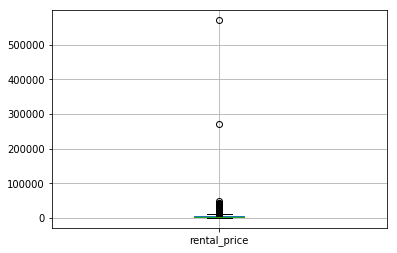

In [7]:
# lets plot and see how the data looks like

r_df2[['rental_price']].boxplot()

# ## lets think about this

In [8]:
r_df2[r_df2['rental_price']>10000]['type2'].value_counts() # consider whether i want a different approach for this 



Landed Houses                                 322
Orchard Scotts                                 78
Skyline @ Orchard Boulevard                    56
The Oliv                                       46
Ardmore Residence                              38
Cyan                                           37
Alba                                           35
The Bayshore                                   35
Silversea                                      26
Lloyd Sixtyfive                                26
The Colonnade                                  25
Nouvel 18                                      24
The Oceanfront @ Sentosa Cove                  23
Cliveden At Grange                             21
Hana                                           20
Marina Bay Residences                          20
The Claymore                                   16
The Scotts Tower                               14
Sage                                           12
Skypark                                        12


In [9]:
# will drop outliers but only at the end just before modelling

# these 2 are probably an error (doesn't make sense - > $200k for rental in a month), I should drop it.

highend_rental = r_df2[r_df2['rental_price']>200000].index
highend_rental

Int64Index([4740, 6449], dtype='int64')

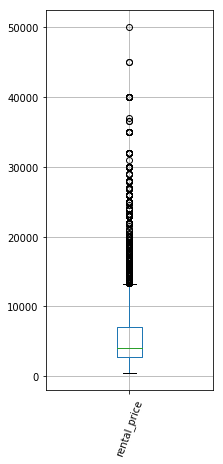

In [42]:
# drop and replot again
r_df3 = r_df2.drop(highend_rental, axis = 0)

# reset index 
r_df3_2 = r_df3.reset_index(drop = True).drop('Unnamed: 0', axis = 1)

# replot 
fig = plt.figure(figsize=(3,7))
r_df3_2[['rental_price']].boxplot(rot = 70, column = 'rental_price' )

In [11]:
r_df3_2.head()

,time_scrapped,page,url,property_title,directory,type1,type2,near_mrt,address,listing_time,...,rental_dict,agent_name,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",12 hours ago,...,"{'Furnishing': 'Partially Furnished', 'Facing'...",(Edmund Lim B C),PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
2,2019-05-18T22:46:34.879887,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",5 days ago,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Lydia,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",For rent,HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Peter Quah,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.44197,0.0,0.0


In [12]:
# lets remove duplicates
r_df3_2.columns
print(r_df3_2.shape)

cols_check_dup = ['rental_price', 'property_title', 'agent_name', 'agency']
r_df4 = r_df3_2.drop_duplicates(cols_check_dup)
print(r_df4.shape)

(8450, 24)
(8032, 24)


In [13]:
# lets change the type1 column to either (1) Condominiums, (2) HDB, (3) Landed Houses

changed_rows = 0
for i, row in r_df4[['type1']].iterrows():
    if row['type1'] == 'For rent':
        r_df4.loc[i,'type1'] = r_df4.loc[i,'type2']
        changed_rows += 1
print(('changed {} rows').format(changed_rows))

# lets check if it has been changed

print(r_df4['type1'].value_counts())

# drop 'type2' column and rename 'type1' column to property_type

r_df5 = r_df4.drop('type2', axis = 1).rename(columns = {'type1':'property_type'})
r_df5.head()




/Users/nicholastay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


changed 1989 rows
Condominiums     6043
Landed Houses    1051
HDB               938
Name: type1, dtype: int64


,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,rent_yn,...,rental_dict,agent_name,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,...,"{'Furnishing': 'Partially Furnished', 'Facing'...",(Edmund Lim B C),PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Lydia,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Peter Quah,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Pets': 'Not...",Tan Poh Sing,ERA Realty Network Pte Ltd,"{'Name': '1 Canberra', 'Total Units': '665', '...",Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0


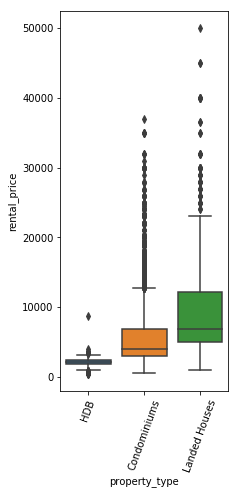

In [38]:
fig = plt.figure(figsize=(3,7))
ax = sns.boxplot(x='property_type', y = 'rental_price', data = r_df5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

In [15]:
r_df5.groupby('property_type')[['property_type', 'rental_price']].median()

,rental_price
property_type,
Condominiums,4000.0
HDB,2200.0
Landed Houses,6900.0


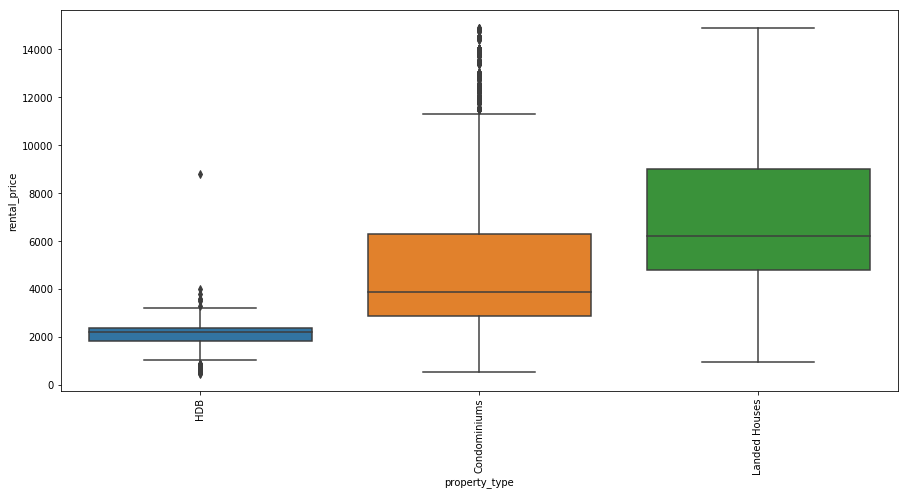

In [16]:
# remove the very expensive houses and plot again... 
r_df5_2 = r_df5[r_df5['rental_price'] <15000]
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='property_type', y = 'rental_price', data = r_df5_2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


In [17]:
r_df6 = r_df5.copy()
r_df6.groupby('property_type')['property_type'].count()

property_type
Condominiums     6043
HDB               938
Landed Houses    1051
Name: property_type, dtype: int64

In [18]:
#outlier for HDB looks like a shop house rental. Lets drop this
print(r_df6[(r_df6['property_type'] == 'HDB') & (r_df6['rental_price'] > 6000)])
hdb_drop = r_df6[(r_df6['property_type'] == 'HDB') & (r_df6['rental_price'] > 6000)].index

r_df6 = r_df5.copy().drop(hdb_drop, axis = 0) #486 index from HDB looks dropped already
r_df6.head()


                  time_scrapped  page  \
486  2019-05-19T00:31:04.260757   549   

                                                   url  \
486  https://www.99.co/singapore/rent/property/345-...   

                property_title  \
486  345 Jurong East Street 31   

                                             directory property_type near_mrt  \
486  ['Home', 'For rent', 'HDB', '345 Jurong East S...           HDB       []   

                                     address listing_time   rent_yn  \
486  ['HDB 2 Rooms, District 22, Singapore']  4 hours ago  For rent   

           ...                                               rental_dict  \
486        ...         {'Furnishing': 'Partially Furnished', 'Lease':...   

    agent_name        agency  \
486  Milson Ng  SRI Pte Ltd.   

                                         property_dict  \
486  {'Name': 'Yuhua Place', 'Year of Completion': ...   

                                           description  \
486  For Rent: 345 Jurong East, 

,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,rent_yn,...,rental_dict,agent_name,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Tiffany Tee - 83334519,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,...,"{'Furnishing': 'Partially Furnished', 'Facing'...",(Edmund Lim B C),PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Lydia,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Lease': 'Fl...",Peter Quah,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,...,"{'Furnishing': 'Fully Furnished', 'Pets': 'Not...",Tan Poh Sing,ERA Realty Network Pte Ltd,"{'Name': '1 Canberra', 'Total Units': '665', '...",Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0


In [19]:
# lets pull out the features of each property. Lets leave baths out now because I don't think it is super relevant

for i, row in r_df6.iterrows():
     r_df6.loc[i,'floor_sqft'] = row['features'].split("',")[2].replace(",","").replace("'","").replace(" sqft (built up)","")
#     r_df6.loc[i,'baths'] = row['features'].split(',')[1].replace(",","").replace(" Baths","").replace(" Bath","").replace("'","") # need to remove rows that say built up area
     r_df6.loc[i,'beds'] = row['features'].split(',')[0].replace("[","").replace("'","").replace(" Beds","").replace(" Bed","")    

print(r_df6.shape)
r_df6.head()


(8031, 25)


,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,rent_yn,...,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,731,2
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,690,1
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,730,2
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,...,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,730,2
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,...,ERA Realty Network Pte Ltd,"{'Name': '1 Canberra', 'Total Units': '665', '...",Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,150,1


In [20]:
# there are some floor sqft that is non-numerical, change them to "nan", easier way to deal with them

r_df6['floor_sqft'] = pd.to_numeric(r_df6['floor_sqft'], errors='coerce')
r_df6[['floor_sqft']].isnull().sum()

floor_sqft    574
dtype: int64

In [21]:
# drop the na

r_df7 = r_df6.dropna()
print(r_df7.shape)
r_df7.head()

(7457, 25)


,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,rent_yn,...,agency,property_dict,description,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,731.0,2
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,690.0,1
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,730.0,2
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['Lavender MRT', '5 min (419m)']","['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,...,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,NICOLL HIGHWAY MRT STATION,0.441970,0.0,0.0,730.0,2
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,...,ERA Realty Network Pte Ltd,"{'Name': '1 Canberra', 'Total Units': '665', '...",Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,150.0,1


In [22]:
# IRRELEVANT, I have exact distance away from nearest MRT. That will be more useful 



# r_df8['near_mrt'] = r_df7['near_mrt'].apply(lambda x: 0 if x == '[]' else (1 if len(x) > 3 else x) )

# r_df8.head()

r_df8 = r_df7.copy()
print(r_df8.shape)

(7457, 25)


In [23]:
r_df8_2 = r_df8.copy()
r_df8_3 = r_df8_2.drop(['nearest_mrt','near_mrt'], axis = 1)

In [24]:
# expanding the rental_dict get the (a) district, (b) sales data have little info on furnishing & lease_period (nil information)

for i, row in r_df8_3.iterrows():
    try: 
        r_df8_3.loc[i,'district'] = ast.literal_eval(row['rental_dict'])['District']
    except:
        r_df8_3.loc[i,'district'] = np.nan
        print('no info on district')
#     try: 
#         r_df8.loc[i,'furnishing'] = ast.literal_eval(row['rental_dict'])['Furnishing']
#     except:
#         r_df8.loc[i,'furnishing'] = np.nan
#         print('no info on furnishing')
#     try: 
#         r_df8_3.loc[i,'lease_period'] = ast.literal_eval(row['rental_dict'])['Lease']
#     except:
#         r_df8_3.loc[i,'lease_period'] = np.nan
#         print('no info on lease_period')
r_df8_3.head()

no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district


,time_scrapped,page,url,property_title,directory,property_type,address,listing_time,rent_yn,rental_price,...,agency,property_dict,description,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,2500.0,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,0.441970,0.0,0.0,731.0,2,D07
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,2500.0,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,0.441970,0.0,0.0,690.0,1,D07
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,2500.0,...,PropNex Realty Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,0.441970,0.0,0.0,730.0,2,D07
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,2500.0,...,ERA Realty Network Pte Ltd,"{'Name': 'Beach Road Gardens', 'Year of Comple...",* nice and renovated unit* high floor* availab...,1 Beach Road,0.441970,0.0,0.0,730.0,2,D07
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,800.0,...,ERA Realty Network Pte Ltd,"{'Name': '1 Canberra', 'Total Units': '665', '...",Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,1.052938,0.0,0.0,150.0,1,D27


In [25]:
print(r_df8_3.isnull().sum())

time_scrapped             0
page                      0
url                       0
property_title            0
directory                 0
property_type             0
address                   0
listing_time              0
rent_yn                   0
rental_price              0
features                  0
amenities                 0
rental_dict               0
agent_name                0
agency                    0
property_dict             0
description               0
property_title2           0
mrt_nearest_distance      0
within1km_to_tpri         0
within2km_to_tpri         0
floor_sqft                0
beds                      0
district                301
dtype: int64


In [26]:
# expanding the property_dict get the (a) district, (b) furnishing, (c) lease_period
now = datetime.datetime.now()
for i, row in r_df8_3.iterrows():
#     try: 
#         r_df8_3.loc[i,'property_name'] = ast.literal_eval(row['property_dict'])['Name']
#     except:
#         r_df8_3.loc[i,'property_name'] = np.nan
#         print('no info on property_name')
#     try: 
#         r_df8.loc[i,'total_units'] = ast.literal_eval(row['property_dict'])['Total Units']
#     except:
#         r_df8.loc[i,'total_units'] = np.nan
#         print('no info on total_unts')
    try: 
        r_df8_3.loc[i,'age'] = now.year - int(ast.literal_eval(row['property_dict'])['Year of Completion'])
    except:
        r_df8_3.loc[i,'age'] = np.nan
        print('no info on year of completion')
    try: 
        r_df8_3.loc[i,'free_lease'] = ast.literal_eval(row['property_dict'])['Tenure']
    except:
        r_df8_3.loc[i,'free_lease'] = np.nan
        print('no info on freehold or leasehold')


no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on

no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or le

no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or le

no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info

no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or le

In [27]:
print(r_df8_3.shape)
r_df8_3.isnull().sum()

(7457, 26)


time_scrapped             0
page                      0
url                       0
property_title            0
directory                 0
property_type             0
address                   0
listing_time              0
rent_yn                   0
rental_price              0
features                  0
amenities                 0
rental_dict               0
agent_name                0
agency                    0
property_dict             0
description               0
property_title2           0
mrt_nearest_distance      0
within1km_to_tpri         0
within2km_to_tpri         0
floor_sqft                0
beds                      0
district                301
age                     574
free_lease              748
dtype: int64

In [28]:
# lets clean the beds column

r_df8_3['beds'].value_counts()

for i, row in r_df8_3.iterrows():
    if row['beds'] == 'Studio':
        r_df8_3.loc[i,'beds'] = 0        
    elif row['beds'] == 'None':
        r_df8_3.loc[i,'beds'] = np.nan


In [29]:
# drop nas again

print(r_df8_3.shape)
r_df9 = r_df8_3.dropna()
print(r_df9.shape)
r_df9.head()

(7457, 26)
(6145, 26)


,time_scrapped,page,url,property_title,directory,property_type,address,listing_time,rent_yn,rental_price,...,description,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,age,free_lease
0,2019-05-18T22:46:17.962733,2,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",10 hours ago,For rent,2500.0,...,::: 1 Beach Road 3 Room Flat HDB for rent :::...,1 Beach Road,0.441970,0.0,0.0,731.0,2,D07,40.0,99 Years
1,2019-05-18T22:46:29.958353,1,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '1...",HDB,"['HDB 2 Rooms, District 07, Singapore']",12 hours ago,For rent,2500.0,...,HDB for rent in D07/ Blk 1 Beach Road!**Blk 1 ...,1 Beach Road,0.441970,0.0,0.0,690.0,1,D07,40.0,99 Years
3,2019-05-18T22:46:39.208721,3,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",5 days ago,For rent,2500.0,...,2 Bedroom Apartment for Rent Interior Design t...,1 Beach Road,0.441970,0.0,0.0,730.0,2,D07,40.0,99 Years
4,2019-05-18T22:46:44.789488,4,https://www.99.co/singapore/rent/property/1-be...,1 Beach Road,"['Home', 'For rent', 'HDB', '1 Beach Road', '2...",HDB,"['HDB 3 Rooms, District 07, Singapore']",3 weeks ago,For rent,2500.0,...,* nice and renovated unit* high floor* availab...,1 Beach Road,0.441970,0.0,0.0,730.0,2,D07,40.0,99 Years
5,2019-05-18T22:46:48.661030,5,https://www.99.co/singapore/rent/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For re...",Condominiums,"['Canberra Drive, District 27, Singapore']",3 days ago,For rent,800.0,...,Room for rent. One beautiful bedroom at ONE CA...,1 Canberra,1.052938,0.0,0.0,150.0,1,D27,4.0,99 Years


In [30]:
# change to float numerical datas 

r_df9['beds'] = r_df9['beds'].astype('float')


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
r_df9['property_type'].value_counts()

Condominiums     5397
Landed Houses     396
HDB               352
Name: property_type, dtype: int64

(array([  9.,   4.,   9.,  65., 117.,  81.,  45.,  16.,   4.,   2.]),
 array([ 480.,  832., 1184., 1536., 1888., 2240., 2592., 2944., 3296.,
        3648., 4000.]),
 <a list of 10 Patch objects>)

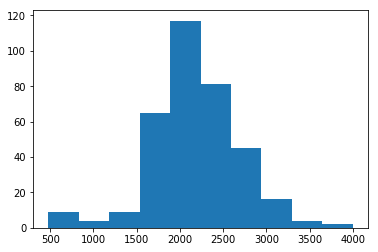

In [32]:
plt.hist(r_df9[r_df9['property_type'] == 'HDB']['rental_price'])

In [33]:
r_df9_2 = r_df9.copy()
summary = r_df9_2[['property_type','rental_price']].groupby('property_type').describe()
summary.columns = summary.columns.droplevel()
summary.columns
summary['max_rent'] = summary['mean'] + summary['std']*3
summary['min_rent'] = summary['mean'] - summary['std']*3
summary.head()

,count,mean,std,min,25%,50%,75%,max,max_rent,min_rent
property_type,,,,,,,,,,
Condominiums,5397.0,5697.299240,4466.345467,800.0,3000.0,4000.0,6999.0,37000.0,19096.335643,-7701.737162
HDB,352.0,2175.028409,509.173269,480.0,1900.0,2200.0,2500.0,4000.0,3702.548216,647.508602
Landed Houses,396.0,8472.542929,5957.962425,980.0,5000.0,6700.0,9600.0,50000.0,26346.430203,-9401.344345


In [34]:
property_type_name = ['Condominiums','HDB','Landed Houses']

for row in property_type_name:
    drop_low = r_df9_2[(r_df9_2['property_type'] == row) & (r_df9_2['rental_price'] < summary.loc[row,'min_rent'])].index
    drop_high = r_df9_2[(r_df9_2['property_type'] == row) & (r_df9_2['rental_price'] > summary.loc[row,'max_rent'])].index
    r_df9_2.drop(drop_low, inplace = True, axis = 0)
    r_df9_2.drop(drop_high, inplace = True, axis = 0)

r_df9_2.shape
# r_df9_3 = r_df9_2.copy()
# for a in index_drop:
#     try:
#         r_df9_3 = r_df9_3.drop(a, axis = 0, inplace = True)
#     except:
#         pass
# r_df9_3.shape


(6013, 26)

In [35]:
r_df9_2['property_type'].value_counts()

Condominiums     5279
Landed Houses     386
HDB               348
Name: property_type, dtype: int64

# ## (3.2) Drop and model

In [43]:
to_drop_cols = ['time_scrapped','page', 'url','directory','address','listing_time','rent_yn','features'
                ,'amenities','rental_dict','agent_name','agency','property_dict','description']
r_df10 = r_df9_2.drop(to_drop_cols, axis = 1)
r_df10.reset_index(inplace=True, drop = True)
print(r_df10.info())
r_df10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 12 columns):
property_title          6013 non-null object
property_type           6013 non-null object
rental_price            6013 non-null float64
property_title2         6013 non-null object
mrt_nearest_distance    6013 non-null float64
within1km_to_tpri       6013 non-null float64
within2km_to_tpri       6013 non-null float64
floor_sqft              6013 non-null float64
beds                    6013 non-null float64
district                6013 non-null object
age                     6013 non-null float64
free_lease              6013 non-null object
dtypes: float64(7), object(5)
memory usage: 563.8+ KB
None


,property_title,property_type,rental_price,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,age,free_lease
0,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,731.0,2.0,D07,40.0,99 Years
1,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,690.0,1.0,D07,40.0,99 Years
2,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,D07,40.0,99 Years
3,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,D07,40.0,99 Years
4,1 Canberra,Condominiums,800.0,1 Canberra,1.052938,0.0,0.0,150.0,1.0,D27,4.0,99 Years


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


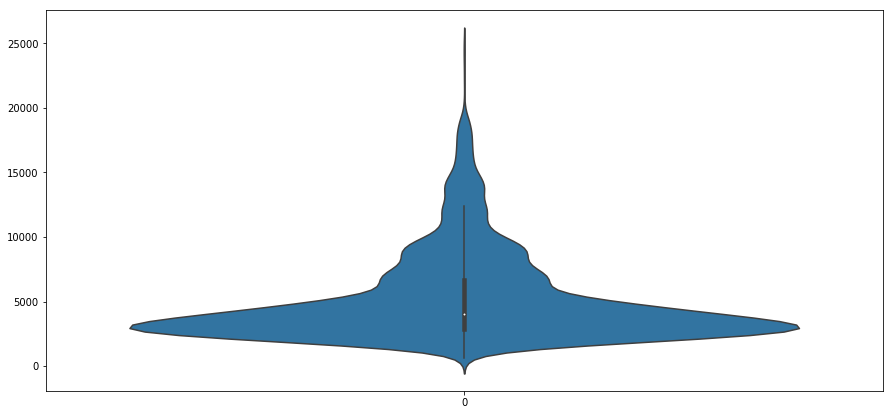

In [44]:
fig = plt.figure(figsize=(15,7))
sns.violinplot(data=r_df10['rental_price'])

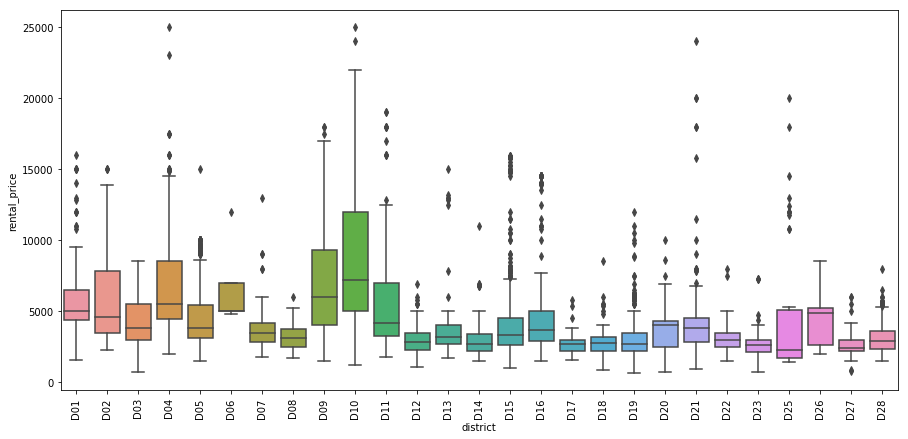

In [45]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='district', y = 'rental_price', data = r_df10.sort_values(['district']))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

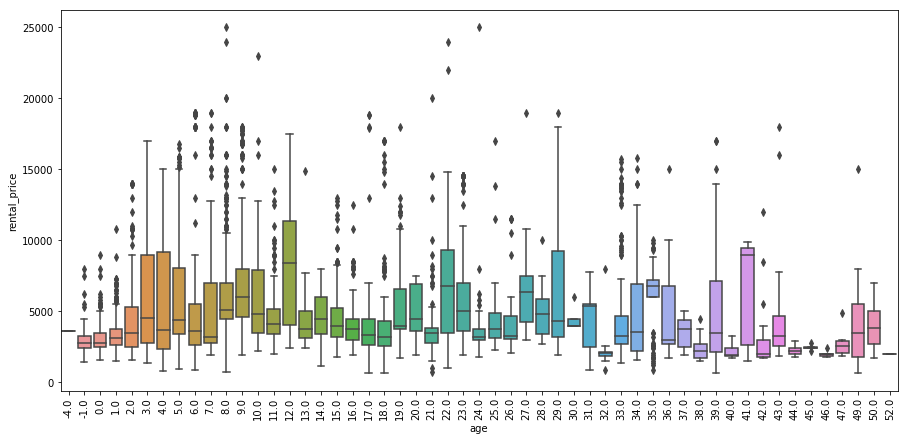

In [46]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='age', y = 'rental_price', data = r_df10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# delete the ones where the age is negative

In [47]:
# drop the columns that are not required as well as the properties where the age is < 0 but still being rented out
r_df10_2 = r_df10.drop(r_df10[r_df10['age']<0].index, axis = 0)

In [48]:
# rent remove free_lease_100 Years + remove NAN columns

droplist_fl = r_df10_2[(r_df10_2['free_lease'] == '100 Years') | (r_df10_2['free_lease'] == '-')].index
r_df10_3 = r_df10_2.drop(droplist_fl, axis = 0)

In [49]:
# get dummies
r_df11 = pd.concat([r_df10_3, pd.get_dummies(r_df10_3[['property_type','district','free_lease']],drop_first=True)], axis = 1)
r_df12 = r_df11.drop(['district','property_type','free_lease'], axis = 1)

print(r_df12.shape)
r_df12.head()

(5831, 44)


,property_title,rental_price,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,property_type_HDB,...,district_D26,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold
0,1 Beach Road,2500.0,1 Beach Road,0.441970,0.0,0.0,731.0,2.0,40.0,1,...,0,0,0,0,0,0,0,1,0,0
1,1 Beach Road,2500.0,1 Beach Road,0.441970,0.0,0.0,690.0,1.0,40.0,1,...,0,0,0,0,0,0,0,1,0,0
2,1 Beach Road,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,40.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1 Beach Road,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,40.0,1,...,0,0,0,0,0,0,0,1,0,0
4,1 Canberra,800.0,1 Canberra,1.052938,0.0,0.0,150.0,1.0,4.0,0,...,0,1,0,0,0,0,0,1,0,0


In [50]:
scaler = StandardScaler()
r_df13 = r_df12.copy()
r_df13['floor_sqft'] = scaler.fit_transform(r_df12[['floor_sqft']])
r_df13['beds'] = scaler.fit_transform(r_df12[['beds']])
r_df13['age'] = scaler.fit_transform(r_df12[['age']])
r_df13['mrt_nearest_distance'] = scaler.fit_transform(r_df12[['mrt_nearest_distance']])
r_df13.head()

,property_title,rental_price,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,property_type_HDB,...,district_D26,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold
0,1 Beach Road,2500.0,1 Beach Road,-0.419920,0.0,0.0,-0.013161,-0.442476,2.376866,1,...,0,0,0,0,0,0,0,1,0,0
1,1 Beach Road,2500.0,1 Beach Road,-0.419920,0.0,0.0,-0.013163,-1.271551,2.376866,1,...,0,0,0,0,0,0,0,1,0,0
2,1 Beach Road,2500.0,1 Beach Road,-0.419920,0.0,0.0,-0.013161,-0.442476,2.376866,1,...,0,0,0,0,0,0,0,1,0,0
3,1 Beach Road,2500.0,1 Beach Road,-0.419920,0.0,0.0,-0.013161,-0.442476,2.376866,1,...,0,0,0,0,0,0,0,1,0,0
4,1 Canberra,800.0,1 Canberra,0.763771,0.0,0.0,-0.013185,-1.271551,-0.831085,0,...,0,1,0,0,0,0,0,1,0,0


In [51]:
y1 = r_df13[['rental_price']]
x1 = r_df13.drop(['property_title','property_title2','rental_price'], axis = 1)
print(x1.shape)

(5831, 41)


In [52]:
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(x1, y1)
print(lassoregcv.alpha_)

27.76115630722385


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(x1, y1)

scores_nmse = cross_val_score(l_new, x1, y1, cv = 5, scoring = 'neg_mean_squared_error')
print('mean negative mean squared errors is', round(np.sqrt(np.abs(np.mean(scores_nmse))),1),'+-' ,round(np.sqrt(np.std(scores_nmse)),1))
iscores_nmse = np.sqrt(np.abs(scores_nmse))
print('and individual scores are', [round(score,1) for score in iscores_nmse])

scores_r2 = cross_val_score(l_new, x1, y1, cv = 5, scoring = 'r2')
print('mean r2 scores is', round(np.mean(scores_r2),2),'+-', round(np.std(scores_r2),2)) 
print('and individual scores are', [round(score,2) for score in scores_r2])


mean negative mean squared errors is 2440.4 +- 1095.9
and individual scores are [2750.7, 2030.4, 2413.9, 2315.9, 2626.7]
mean r2 scores is 0.52 +- 0.05
and individual scores are [0.5, 0.58, 0.55, 0.51, 0.44]


In [77]:
lasso_coefs = round(pd.DataFrame({'variable':x1.columns,'coef':l_new.coef_,'abs_coef':np.abs(l_new.coef_)}),1)

lc_summary = lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.columns = ['variable','lasso_coef','lasso_abs_coef']
lasso_coefs.head(10)

,variable,lasso_coef,lasso_abs_coef
16,district_D10,2763.5,2763.5
4,beds,2139.2,2139.2
15,district_D09,1999.6,1999.6
32,district_D27,-1322.7,1322.7
6,property_type_HDB,-1155.3,1155.3
8,district_D02,1125.0,1125.0
25,district_D19,-1090.1,1090.1
33,district_D28,-704.9,704.9
10,district_D04,689.6,689.6
28,district_D22,-528.1,528.1


In [58]:
# ridge

alpha_range = np.linspace(0.145, 0.15, 100)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(x1, y1)

r_new = Ridge(alpha=ridgeregcv.alpha_)
r_new.fit(x1, y1)

scores_nmse = cross_val_score(r_new, x1, y1, cv = 5, scoring = 'neg_mean_squared_error')
print('mean negative mean squared errors is', round(np.sqrt(np.abs(np.mean(scores_nmse))),1),'+-' ,round(np.sqrt(np.std(scores_nmse)),1))
iscores_nmse = np.sqrt(np.abs(scores_nmse))
print('and individual scores are', [round(score,1) for score in iscores_nmse])

scores_r2 = cross_val_score(r_new, x1, y1, cv = 5, scoring = 'r2')
print('mean r2 scores is', round(np.mean(scores_r2),2),'+-', round(np.std(scores_r2),2)) 
print('and individual scores are', [round(score,2) for score in scores_r2])

#With a CV of 2, the mean score is 0.42 and std deviation is 0.12

mean negative mean squared errors is 2552.0 +- 1795.3
and individual scores are [3593.0, 2089.4, 2215.1, 2186.7, 2366.1]
mean r2 scores is 0.49 +- 0.17
and individual scores are [0.14, 0.56, 0.62, 0.56, 0.55]


In [59]:
# RandomForestRegressor


parameters = {
    'max_depth': [5, 6, 7],
    'n_estimators': (400, 500, 600),
}

gsc = GridSearchCV( estimator=RandomForestRegressor(), param_grid = parameters, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x1, y1)
best_params = grid_result.best_params_
print(best_params)

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)

scores_nmse = cross_val_score(rfr, x1, y1, cv = 5, scoring = 'neg_mean_squared_error')
print('mean negative mean squared errors is', round(np.sqrt(np.abs(np.mean(scores_nmse))),1),'+-' ,round(np.sqrt(np.std(scores_nmse)),1))
iscores_nmse = np.sqrt(np.abs(scores_nmse))
print('and individual scores are', [round(score,1) for score in iscores_nmse])

scores_r2 = cross_val_score(rfr, x1, y1, cv = 5, scoring = 'r2')
print('mean r2 scores is', round(np.mean(scores_r2),2),'+-', round(np.std(scores_r2),2)) 
print('and individual scores are', [round(score,2) for score in scores_r2])

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 7, 'n_estimators': 500}


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

mean negative mean squared errors is 1740.1 +- 755.4
and individual scores are [1922.9, 1562.4, 1923.4, 1558.0, 1695.4]


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

mean r2 scores is 0.75 +- 0.02
and individual scores are [0.75, 0.75, 0.71, 0.78, 0.77]


In [60]:
# XGboost normal

xgr = XGBRegressor()

xgr_result1 = xgr.fit(x1,y1)

scores_nmse = cross_val_score(xgr_result1, x1, y1, cv = 5, scoring = 'neg_mean_squared_error')
print('mean negative mean squared errors is', round(np.sqrt(np.abs(np.mean(scores_nmse))),1),'+-' ,round(np.sqrt(np.std(scores_nmse)),1))
iscores_nmse = np.sqrt(np.abs(scores_nmse))
print('and individual scores are', [round(score,1) for score in iscores_nmse])

scores_r2 = cross_val_score(xgr_result1, x1, y1, cv = 5, scoring = 'r2')
print('mean r2 scores is', round(np.mean(scores_r2),2),'+-', round(np.std(scores_r2),2)) 
print('and individual scores are', [round(score,2) for score in scores_r2])


mean negative mean squared errors is 1687.9 +- 727.5
and individual scores are [1910.1, 1529.1, 1740.1, 1480.5, 1743.4]
mean r2 scores is 0.77 +- 0.02
and individual scores are [0.76, 0.76, 0.77, 0.8, 0.75]


In [61]:
# XGboost tuned

xgr = XGBRegressor()

xgr_params ={
    "n_estimators":[50,100,150,200],
    'max_depth':[5,6,7,8,9],
    'learning_rate':[0.25,0.20,0.15,0.10],
    'n_jobs':[-1],
    'random_state':[42]
}

xgr_search = GridSearchCV(xgr,param_grid=xgr_params,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error')
xgr_tune = xgr_search.fit(x1,y1)
print(xgr_tune.best_estimator_)

scores_nmse = cross_val_score(xgr_tune.best_estimator_, x1, y1, cv = 5, scoring = 'neg_mean_squared_error')
print('mean negative mean squared errors is', round(np.sqrt(np.abs(np.mean(scores_nmse))),1),'+-' ,round(np.sqrt(np.std(scores_nmse)),1))
iscores_nmse = np.sqrt(np.abs(scores_nmse))
print('and individual scores are', [round(score,1) for score in iscores_nmse])

scores_r2 = cross_val_score(xgr_tune.best_estimator_, x1, y1, cv = 5, scoring = 'r2')
print('mean r2 scores is', round(np.mean(scores_r2),2),'+-', round(np.std(scores_r2),2)) 
print('and individual scores are', [round(score,2) for score in scores_r2])


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 11.6min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.15, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
mean negative mean squared errors is 1497.2 +- 650.0
and individual scores are [1664.7, 1434.9, 1645.7, 1308.7, 1399.0]
mean r2 scores is 0.82 +- 0.02
and individual scores are [0.82, 0.79, 0.79, 0.84, 0.84]


In [82]:
results=pd.DataFrame()
results['columns']=x1.columns
results['xg_importances'] = xgr_tune.best_estimator_.feature_importances_
results['xg_importances'] = round(results['xg_importances'],3)
results.sort_values(by='xg_importances',ascending=False,inplace=True)
results
# can't interpret results, only able to know the relative importance nia

,columns,xg_importances
3,floor_sqft,0.110
7,property_type_Landed Houses,0.105
16,district_D10,0.091
15,district_D09,0.075
8,district_D02,0.074
25,district_D19,0.072
2,within2km_to_tpri,0.059
11,district_D05,0.048
34,free_lease_103 Years,0.046
5,age,0.038


In [84]:
summary_merge = results.merge(lasso_coefs, left_on = 'columns', right_on = 'variable' )
summary_merge2 = summary_merge.drop(['variable', 'lasso_abs_coef'], axis = 1)
summary_merge2

,columns,xg_importances,lasso_coef
0,floor_sqft,0.110,-0.0
1,property_type_Landed Houses,0.105,-0.0
2,district_D10,0.091,2763.5
3,district_D09,0.075,1999.6
4,district_D02,0.074,1125.0
5,district_D19,0.072,-1090.1
6,within2km_to_tpri,0.059,-452.2
7,district_D05,0.048,-0.0
8,free_lease_103 Years,0.046,0.0
9,age,0.038,-524.3


In [85]:
x_new = xgr_tune.best_estimator_
x_new.fit(x1, y1)
y_pred = x_new.predict(x1)
r_df14 = r_df10_3.copy()
r_df14['y_pred'] = y_pred
r_df14.head()

,property_title,property_type,rental_price,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,age,free_lease,y_pred
0,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,731.0,2.0,D07,40.0,99 Years,2261.263672
1,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,690.0,1.0,D07,40.0,99 Years,2081.488770
2,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,D07,40.0,99 Years,2261.263672
3,1 Beach Road,HDB,2500.0,1 Beach Road,0.441970,0.0,0.0,730.0,2.0,D07,40.0,99 Years,2261.263672
4,1 Canberra,Condominiums,800.0,1 Canberra,1.052938,0.0,0.0,150.0,1.0,D27,4.0,99 Years,981.524048


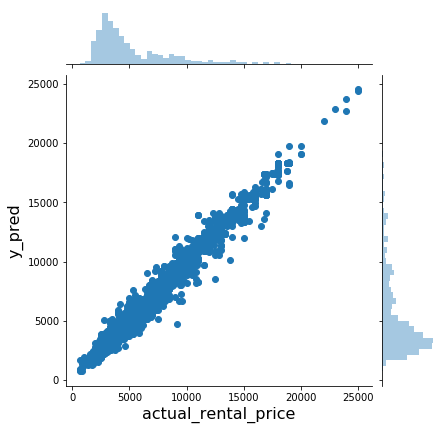

In [254]:
ax = sns.jointplot(r_df14['rental_price'], r_df14['y_pred'])
ax.set_axis_labels('actual_rental_price', 'y_pred', fontsize=16)


Text(0, 0.5, 'count')

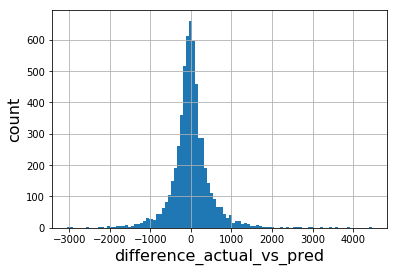

In [256]:
# plotting errors
r_df14['errors'] = r_df14['rental_price'] - r_df14['y_pred']
r_df14['errors'].hist(bins = 100)
plt.xlabel('difference_actual_vs_pred',FontSize = 16)
plt.ylabel('count',FontSize = 16)

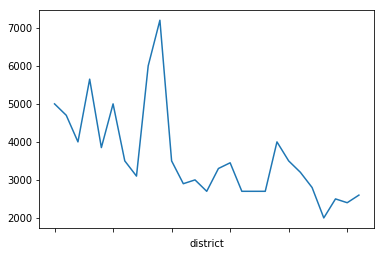

In [88]:
round(r_df14.groupby(['property_type', 'district'])['rental_price'].describe(),0).loc['Condominiums','50%'].plot()

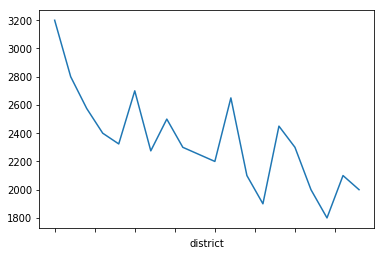

In [89]:
round(r_df14.groupby(['property_type', 'district'])['rental_price'].describe(),0).loc['HDB','50%'].plot()

In [90]:
round(r_df14.groupby(['property_type', 'district'])['rental_price'].describe(),0)

count     mean     std      min      25%      50%  \
property_type district                                                       
Condominiums  D01        323.0   5541.0  2178.0   1600.0   4400.0   5000.0   
              D02        238.0   5879.0  2650.0   2500.0   3500.0   4700.0   
              D03        243.0   4733.0  1945.0   2100.0   3050.0   4000.0   
              D04        180.0   6851.0  3374.0   2500.0   4500.0   5650.0   
              D05        273.0   5018.0  2613.0   1500.0   3200.0   3850.0   
              D06          5.0   6760.0  3064.0   4800.0   5000.0   5000.0   
              D07         97.0   3897.0  1628.0   1800.0   3200.0   3500.0   
              D08         82.0   3204.0   920.0   1700.0   2425.0   3100.0   
              D09       1011.0   6947.0  3516.0   1500.0   4000.0   6000.0   
              D10        613.0   8540.0  4608.0   1200.0   4950.0   7200.0   
              D11        240.0   4090.0  1783.0   1800.0   2875.0   3500.0   
              D12        105.0   3076.0  1063.0   1050.0   2300.0   2900.0   
              D13         75.0   3158.0   867.0   1700.0   2550.0   3000.0   
              D14        189.0   2881.0   902.0   1500.0   2200.0   2700.0   
              D15        303.0   4627.0  3446.0   1000.0   2695.0   3300.0   
              D16        161.0   5586.0  4353.0   1950.0   2900.0   3450.0   
              D17         35.0   2673.0   813.0   1600.0   2125.0   2700.0   
              D18         79.0   2725.0   794.0    872.0   2140.0   2700.0   
              D19        160.0   2722.0   676.0   1500.0   2200.0   2700.0   
              D20        184.0   4214.0   947.0   2300.0   3900.0   4000.0   
              D21        102.0   3625.0   983.0   1800.0   2800.0   3500.0   
              D22         85.0   3237.0   624.0   1680.0   2800.0   3200.0   
              D23         86.0   3019.0   976.0   1900.0   2500.0   2800.0   
              D25         29.0   2063.0   498.0   1400.0   1600.0   2000.0   
              D26         14.0   2878.0  1051.0   2000.0   2250.0   2500.0   
              D27         86.0   2532.0   517.0    800.0   2300.0   2400.0   
              D28        103.0   2621.0   490.0   1600.0   2300.0   2600.0   
HDB           D02          6.0   3117.0   471.0   2300.0   2975.0   3200.0   
              D03         28.0   2488.0   655.0    700.0   2000.0   2800.0   
              D04          8.0   2506.0   431.0   1999.0   2100.0   2575.0   
...                        ...      ...     ...      ...      ...      ...   
              D15         20.0   2254.0   313.0   1800.0   1975.0   2250.0   
              D16         11.0   2177.0   424.0   1500.0   1850.0   2200.0   
              D18          7.0   2550.0   414.0   1900.0   2325.0   2650.0   
              D19         29.0   1941.0   535.0    650.0   1900.0   2100.0   
              D20         66.0   1975.0   388.0    700.0   1712.0   1900.0   
              D21          4.0   2100.0   804.0    900.0   2025.0   2450.0   
              D22         19.0   2271.0   228.0   1500.0   2225.0   2300.0   
              D23         34.0   1946.0   353.0    750.0   1800.0   2000.0   
              D25          6.0   1808.0   128.0   1650.0   1725.0   1800.0   
              D27         46.0   2043.0   312.0    850.0   1900.0   2100.0   
              D28          3.0   2000.0     1.0   1999.0   2000.0   2000.0   
Landed Houses D04          3.0  20967.0  5348.0  14900.0  18950.0  23000.0   
              D05         10.0   6430.0  3737.0   1900.0   4400.0   5150.0   
              D09          2.0  13350.0  6576.0   8700.0  11025.0  13350.0   
              D10         48.0  10581.0  4574.0   2850.0   7500.0   9250.0   
              D11         95.0   9245.0  3221.0   6100.0   6700.0   9300.0   
              D13          8.0  11538.0  3344.0   5000.0  11325.0  12900.0   
              D14          5.0   7000.0  2631.0   3600.0   6800.0   6800.0   
              D15         10.0   5260.0  2176.0

In [91]:
r_df14.groupby(['property_type']).count()

,property_title,rental_price,property_title2,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,age,free_lease,y_pred,errors
property_type,,,,,,,,,,,,,
Condominiums,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101
HDB,348,348,348,348,348,348,348,348,348,348,348,348,348
Landed Houses,382,382,382,382,382,382,382,382,382,382,382,382,382


### 12thTry: This was scary... (initial results were super bad) removed outliers by property type instead of just by value and taking out SD x 3 + feature engineer schools inside + included absolute distance to MRT in the formula! Significantly better SD and MSE

mean negative mean squared errors is 1497.2 +- 650.0

and individual scores are [1664.7, 1434.9, 1645.7, 1308.7, 1399.0]

mean r2 scores is 0.82 +- 0.02

and individual scores are [0.82, 0.79, 0.79, 0.84, 0.84]


### 11thTry: With less info lets see results.... 

mean negative mean squared errors is 2180.8 +- 1035.7

and individual scores are [1997.1, 2094.6, 2399.9, 2497.6, 1845.3]

mean r2 scores is 0.77 +- 0.07

and individual scores are [0.79, 0.8, 0.76, 0.65, 0.85]


### 10thTry: Include closeness to MRT and include outliers result in r2 of 0.77. No difference

mean negative mean squared errors is 2188.6 +- 1090.4

and individual scores are [1994.8, 2194.4, 2590.9, 2288.8, 1790.3]

mean r2 scores is 0.77 +- 0.05

and individual scores are [0.79, 0.78, 0.72, 0.71, 0.86]


### 9thTry: 4th tuning, similar R2 of 0.78, but MSE std decrease significantly by 55! r2 std also improves significantly!

mean negative mean squared errors is 1107.7 +- 412.7

and individual scores are [1197.0, 1089.9, 1188.2, 1000.4, 1049.4]

mean r2 scores is 0.78 +- 0.03

and individual scores are [0.75, 0.78, 0.83, 0.81, 0.74]


### 8thTry: 3th tuning, similar R2 of 0.78, but MSE decrease by 7

mean negative mean squared errors is 1112.0 +- 467.1

and individual scores are [1160.9, 958.1, 1255.4, 1088.0, 1076.0]

mean r2 scores is 0.78 +- 0.04

and individual scores are [0.77, 0.83, 0.81, 0.78, 0.72]


### 8thTry: Further tuning, increased the XGBoost to 0.78

mean negative mean squared errors is 1119.0 +- 475.7

and individual scores are [1240.1, 984.9, 1224.3, 1078.1, 1044.8]

mean r2 scores is 0.78 +- 0.04

and individual scores are [0.74, 0.82, 0.82, 0.78, 0.74]


### 8thTry: With tuning, increased the XGBoost to 0.77

mean negative mean squared errors is 1132.3 +- 456.8

and individual scores are [1178.8, 1095.3, 1279.7, 1040.3, 1049.2]

mean r2 scores is 0.77 +- 0.02

and individual scores are [0.76, 0.77, 0.8, 0.8, 0.74]


### 7thTry: Even without tuning the XGBoost model, it is 0.76! AMAZING!

mean negative mean squared errors is 1175.8 +- 514.1

and individual scores are [1264.0, 1149.2, 1331.2, 1058.4, 1049.9]

mean r2 scores is 0.76 +- 0.02

and individual scores are [0.73, 0.75, 0.78, 0.79, 0.74]

### 6thTry: Lets random forest it. Results are pretty good = 0.7! 

#### CV = 5

mean negative mean squared errors is 1273.3 +- 618.8

and individual scores are [1440.1, 1139.2, 1449.6, 1119.9, 1174.5]

mean r2 scores is 0.71 +- 0.05

and individual scores are [0.64, 0.76, 0.74, 0.76, 0.67]


### 5thTry: Interestingly getting more data results in a poorer score... 

#### CV = 5

mean negative mean squared errors is 1703.2 +- 816.0

and individual scores are [1941.5, 1504.1, 1911.5, 1565.6, 1538.6]

mean r2 scores is 0.49 +- 0.08

and individual scores are [0.35, 0.57, 0.55, 0.54, 0.43]

### 4thTry: Just by dropping first column when i get_dummies, I reduce overfitting

#### CV = 5

mean negative mean squared errors is 1522.0 +- 645.4

and individual scores are [1519.2, 1716.6, 1296.9, 1583.4, 1462.6]

mean r2 scores is 0.58 +- 0.09

and individual scores are [0.56, 0.46, 0.53, 0.63, 0.71]


### 3rd Try: This marks a serious improvement just by removing outliers that are causing substantial differences. 

#### CV = 2

mean negative mean squared errors is 1680.1 +- 660.2

and individual scores are [1805.2, 1545.0]

mean r2 scores is 0.53 +- 0.1

and individual scores are [0.42, 0.63]

#### CV = 5

mean negative mean squared errors is 1552.3 +- 668.5

and individual scores are [1660.3, 1714.2, 1297.2, 1583.3, 1470.6]

mean r2 scores is 0.56 +- 0.09

and individual scores are [0.48, 0.46, 0.53, 0.63, 0.71]


### 2nd Try: Marked improvement by including a few more features, such as age, leasehold, furnishing and lease length

#### CV = 2

mean negative mean squared errors is 3146.6 +- 928.8

and individual scores are [3006.4, 3280.8]

mean r2 scores is 0.47 +- 0.06

and individual scores are [0.53, 0.41]


### 2nd Try: For reference: CV = 5

mean negative mean squared errors is 2979.2 +- 2064.2

and individual scores are [2073.9, 3547.3, 2773.2, 3876.8, 2184.6]

mean r2 scores is 0.5 +- 0.06

and individual scores are [0.47, 0.55, 0.59, 0.42, 0.48]


### 1st Try: This is my baseline: CV = 2

mean negative mean squared errors is 3590.0 +- 1069.0

and individual scores are [3427.1, 3745.7]

mean r2 scores is 0.4 +- 0.13

and individual scores are [0.27, 0.52]


### 1st Try: For reference: CV = 5

mean negative mean squared errors is 3336.2 +- 2336.0

and individual scores are [1632.1, 3331.3, 4311.4, 3859.2, 2899.7]

mean r2 scores is -0.12 +- 1.24

and individual scores are [-2.61, 0.55, 0.5, 0.45, 0.51]

# Lets bring in the sales data and see if I can predict the rental well

In [92]:
# s_column_names = ['time_scrapped', 'page', 'url', 'property_title', 'directory', 'type1',
#        'type2', 'near_mrt', 'address', 'listing_time', 'rent_yn',
#        'sale_price', 'features', 'amenities', 'rental_dict', 'agent_name',
#        'agency', 'property_dict', 'description', 'property_title2',
#        'nearest_mrt', 'nearest_distance']
s_df1 = pd.read_csv("./s_residential_details2_geoinfo4.csv")
s_df1.iloc[:5,10:]

,listing_time,rent_yn,sale_price,features,amenities,rental_dict,agent_name,agency,property_dict,description,property_title2,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,2 days ago,For sale,"S$1,115,000","['3 Beds', '2 Baths', '1,130 sqft (built up)',...","['High Floor', 'City View', 'Sea View', 'Renov...","{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Shon Foong,ERA Realty Network Pte Ltd,"{'Name': 'The Pinnacle @ Duxton', 'Year of Com...",★ ☆★ ☆BEST UNIT AT ★ ☆★ ☆Hi! If you are look...,1 Cantonment Road,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0
1,3 days ago,For sale,"S$918,000","['3 Beds', '2 Baths', '958 sqft (built up)', '...","['Clubhouse', 'Function Room', 'Gym', 'Jacuzzi...","{'Facing': 'North', 'District': 'D27'}",Nick Tan,SRI Pte Ltd.,"{'Name': '1 Canberra', 'Total Units': '665', '...","★★ Unblocked view from Living, all rooms and K...",1 Canberra,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0
2,2 days ago,For sale,"S$1,115,000","['3 Beds', '2 Baths', '1,130 sqft (built up)',...","['High Floor', 'City View', 'Sea View', 'Renov...","{'Furnishing': 'Fully Furnished', 'Facing': 'N...",Shon Foong,ERA Realty Network Pte Ltd,"{'Name': 'The Pinnacle @ Duxton', 'Year of Com...",★ ☆★ ☆BEST UNIT AT ★ ☆★ ☆Hi! If you are look...,1 Cantonment Road,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0
3,12 hours ago,For sale,"S$310,000","['2 Beds', '1 Bath', '700 sqft (built up)', 'S...","['High Floor', 'Utility Room']","{'Floor': '09', 'District': 'D05'}",Ivan Low @ 93868686,PropNex Realty Pte Ltd,"{'Name': 'Dover Court', 'Year of Completion': ...",3I @ Blk 1 Dover Rd3I (2+1)Corridor unitHigh f...,1 Dover Road,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0
4,3 days ago,For sale,"S$255,000","['2 Beds', '2 Baths', '775 sqft (built up)', '...",['High Floor'],{'District': 'D19'},Jennifer Wee,ERA Realty Network Pte Ltd,"{'Name': '1 Hougang Avenue 3', 'Total Units': ...","Just 2 bus stops to Kovan MRT, Kovan Mall, Kov...",1 Hougang Avenue 3,1 HOUGANG AVENUE 3 HDB-HOUGANG SINGAPORE 530001,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0


In [93]:
#1 convert sales price to integers and drop rows where there is no sales price

s_df2 = s_df1.copy()

s_df2['sale_price'] = s_df1['sale_price'].apply(lambda x: x.replace('S$', '').replace(',', ''))

print(s_df2[['sale_price']].dtypes)

s_df2['sale_price'] = s_df2['sale_price'].astype('float')

print(s_df2[['sale_price']].dtypes)

sale_price    object
dtype: object
sale_price    float64
dtype: object


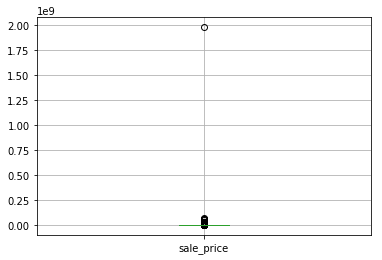

In [94]:
s_df2[['sale_price']].boxplot()

In [95]:
# 2 drop the outliers and replot, more than 5% yield is unlikely in the property market
s_df2[s_df2['sale_price']>50000000][['property_title', 'sale_price']]

,property_title,sale_price
3579,Boulevard Vue,6.103800e+07
4307,Ewart Park,5.900000e+07
5203,La Fiesta,1.980000e+09
6253,Oxley Residence,7.500000e+07
6761,Queen Astrid Park,5.800000e+07
7596,Skyline @ Orchard Boulevard,5.221700e+07


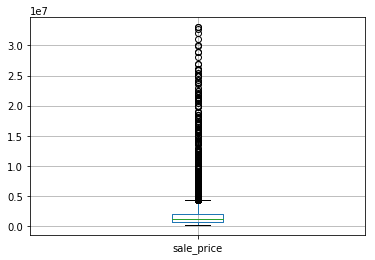

In [96]:
# 2.1 continuation of dropping outliers and replot

# drop and replot again
highend_sale = s_df2[s_df2['sale_price']>50000000].index
s_df3 = s_df2.drop(highend_sale, axis = 0)

# replot 
s_df3[['sale_price']].boxplot() 

# this looks alot better but there are alot of expensive houses

In [97]:
s_df3.columns

Index(['Unnamed: 0', 'time_scrapped', 'page', 'url', 'property_title',
       'directory', 'type1', 'type2', 'near_mrt', 'address', 'listing_time',
       'rent_yn', 'sale_price', 'features', 'amenities', 'rental_dict',
       'agent_name', 'agency', 'property_dict', 'description',
       'property_title2', 'ADDRESS', 'ROAD_NAME', 'LATITUDE', 'LONGITUDE',
       'nearest_mrt', 'mrt_nearest_distance', 'within1km_to_tpri',
       'within2km_to_tpri'],
      dtype='object')

In [98]:
# 3 lets remove duplicates
print(s_df3.shape)
cols_check_dup = ['sale_price', 'property_title', 'agent_name', 'agency']
s_df4 = s_df3.drop_duplicates(cols_check_dup)
print(s_df3.shape)

# no duplicates

(9297, 29)
(9297, 29)


In [99]:
# 4 lets change the type1 column to either (1) Condominiums, (2) HDB_Resale, (3) Landed_Houses

changed_rows = 0
for i, row in s_df4[['type1']].iterrows():
    if row['type1'] == 'For sale':
        s_df4.loc[i,'type1'] = s_df4.loc[i,'type2']
        changed_rows += 1
print(('changed {} rows').format(changed_rows))

# lets check if it has been changed

print(s_df4['type1'].value_counts())

# drop 'type2' column and rename 'type1' column to property_type

s_df5 = s_df4.drop('type2', axis = 1).rename(columns = {'type1':'property_type'})
s_df5.head()

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


changed 3350 rows
Condominiums     5749
HDB Resale       2546
Landed Houses     804
Name: type1, dtype: int64


,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,...,description,property_title2,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['Tanjong Pagar MRT', '6 min (496m)']","['HDB 5 Rooms, District 02, Singapore']",2 days ago,...,★ ☆★ ☆BEST UNIT AT ★ ☆★ ☆Hi! If you are look...,1 Cantonment Road,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,...,"★★ Unblocked view from Living, all rooms and K...",1 Canberra,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,[],"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,...,3I @ Blk 1 Dover Rd3I (2+1)Corridor unitHigh f...,1 Dover Road,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0
4,4,2019-05-19T14:10:03.202112,4,https://www.99.co/singapore/sale/property/1-ho...,1 Hougang Avenue 3,"['Home', 'For sale', 'HDB Resale', '1 Hougang ...",HDB Resale,[],"['HDB 3 Rooms, District 19, Singapore']",3 days ago,...,"Just 2 bus stops to Kovan MRT, Kovan Mall, Kov...",1 Hougang Avenue 3,1 HOUGANG AVENUE 3 HDB-HOUGANG SINGAPORE 530001,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Aljunied MRT', '5 min (411m)']","['Lorong 24 Geylang, District 14, Singapore']",1 day ago,...,"**High floor, unblocked view. Freehold tenure!...",1 Loft,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0


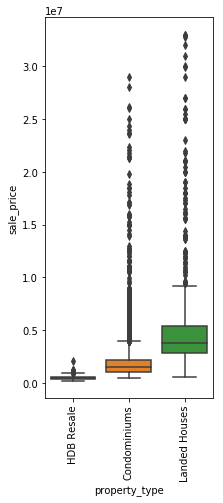

In [100]:
# 4.1 lets see what is the difference when plotting 

fig = plt.figure(figsize=(3,7))
ax = sns.boxplot(x='property_type', y = 'sale_price', data = s_df5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# alot of outliers

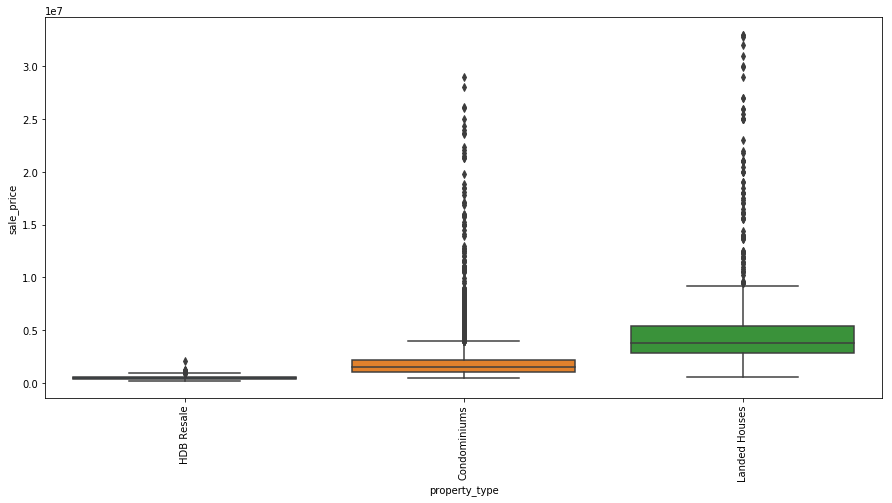

In [101]:
# 4.2 lets remove the outliers (> $5m) and see a more meaningful plot

s_df5_2 = s_df5[s_df5['sale_price']<50000000]

fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='property_type', y = 'sale_price', data = s_df5_2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# alot of outliers

In [102]:
# 5 lets pull out the features of each property. Lets leave baths out now because I don't think it is super relevant
s_df6 = s_df5.copy()
for i, row in s_df6.iterrows():
     s_df6.loc[i,'floor_sqft'] = row['features'].split("',")[2].replace(",","").replace("'","").replace(" sqft (built up)","")
#     r_df6.loc[i,'baths'] = row['features'].split(',')[1].replace(",","").replace(" Baths","").replace(" Bath","").replace("'","") # need to remove rows that say built up area
     s_df6.loc[i,'beds'] = row['features'].split(',')[0].replace("[","").replace("'","").replace(" Beds","").replace(" Bed","")    


s_df6.head()

,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,...,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['Tanjong Pagar MRT', '6 min (496m)']","['HDB 5 Rooms, District 02, Singapore']",2 days ago,...,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0,1130,3
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,...,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0,958,3
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,[],"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,...,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700,2
4,4,2019-05-19T14:10:03.202112,4,https://www.99.co/singapore/sale/property/1-ho...,1 Hougang Avenue 3,"['Home', 'For sale', 'HDB Resale', '1 Hougang ...",HDB Resale,[],"['HDB 3 Rooms, District 19, Singapore']",3 days ago,...,1 HOUGANG AVENUE 3 HDB-HOUGANG SINGAPORE 530001,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0,775,2
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Aljunied MRT', '5 min (411m)']","['Lorong 24 Geylang, District 14, Singapore']",1 day ago,...,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560,1


In [103]:
# 6 there are some floor sqft that is non-numerical, change them to "nan", easier way to deal with them

s_df6['floor_sqft'] = pd.to_numeric(s_df6['floor_sqft'], errors='coerce')
print(s_df6[['floor_sqft']].isnull().sum())

s_df7 = s_df6.dropna()
print(s_df7.shape)
s_df7.head()


floor_sqft    1267
dtype: int64
(7832, 30)


,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,near_mrt,address,listing_time,...,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['Tanjong Pagar MRT', '6 min (496m)']","['HDB 5 Rooms, District 02, Singapore']",2 days ago,...,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0,1130.0,3
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,[],"['Canberra Drive, District 27, Singapore']",3 days ago,...,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,[],"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,...,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2
4,4,2019-05-19T14:10:03.202112,4,https://www.99.co/singapore/sale/property/1-ho...,1 Hougang Avenue 3,"['Home', 'For sale', 'HDB Resale', '1 Hougang ...",HDB Resale,[],"['HDB 3 Rooms, District 19, Singapore']",3 days ago,...,1 HOUGANG AVENUE 3 HDB-HOUGANG SINGAPORE 530001,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0,775.0,2
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Aljunied MRT', '5 min (411m)']","['Lorong 24 Geylang, District 14, Singapore']",1 day ago,...,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1


In [104]:
# 7 drop near_mrt column as I have better data that I pulled out

s_df8 = s_df7.copy().drop('near_mrt', axis = 1)

s_df8.head()

,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,address,listing_time,rent_yn,...,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['HDB 5 Rooms, District 02, Singapore']",2 days ago,For sale,...,1 CANTONMENT ROAD THE PINNACLE@DUXTON SINGAPOR...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0,1130.0,3
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,"['Canberra Drive, District 27, Singapore']",3 days ago,For sale,...,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,For sale,...,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2
4,4,2019-05-19T14:10:03.202112,4,https://www.99.co/singapore/sale/property/1-ho...,1 Hougang Avenue 3,"['Home', 'For sale', 'HDB Resale', '1 Hougang ...",HDB Resale,"['HDB 3 Rooms, District 19, Singapore']",3 days ago,For sale,...,1 HOUGANG AVENUE 3 HDB-HOUGANG SINGAPORE 530001,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0,775.0,2
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Lorong 24 Geylang, District 14, Singapore']",1 day ago,For sale,...,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1


In [105]:
# 8 expanding the rental_dict get the (a) district

for i, row in s_df8.iterrows():
    try: 
        s_df8.loc[i,'district'] = ast.literal_eval(row['rental_dict'])['District']
    except:
        s_df8.loc[i,'district'] = np.nan
        print('no info on district')

s_df8.head()

no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district
no info on district


,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,address,listing_time,rent_yn,...,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['HDB 5 Rooms, District 02, Singapore']",2 days ago,For sale,...,CANTONMENT ROAD,1.277035,103.841261,OUTRAM PARK MRT STATION,0.355524,0.0,0.0,1130.0,3,D02
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,"['Canberra Drive, District 27, Singapore']",3 days ago,For sale,...,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3,D27
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,For sale,...,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2,D05
4,4,2019-05-19T14:10:03.202112,4,https://www.99.co/singapore/sale/property/1-ho...,1 Hougang Avenue 3,"['Home', 'For sale', 'HDB Resale', '1 Hougang ...",HDB Resale,"['HDB 3 Rooms, District 19, Singapore']",3 days ago,For sale,...,HOUGANG AVENUE 3,1.364131,103.893001,HOUGANG MRT STATION,0.795036,0.0,0.0,775.0,2,D19
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Lorong 24 Geylang, District 14, Singapore']",1 day ago,For sale,...,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1,D14


In [106]:
# 8.1 expanding the property_dict get the (a) property name, (b) age, (c) whether it is freehold or what kind of leasehold

for i, row in s_df8.iterrows():
    try: 
        s_df8.loc[i,'property_name'] = ast.literal_eval(row['property_dict'])['Name']
    except:
        s_df8.loc[i,'property_name'] = np.nan
        print('no info on property_name')
    try: 
        s_df8.loc[i,'age'] = now.year - int(ast.literal_eval(row['property_dict'])['Year of Completion'])
    except:
        s_df8.loc[i,'age'] = np.nan
        print('no info on year of completion')
    try: 
        s_df8.loc[i,'free_lease'] = ast.literal_eval(row['property_dict'])['Tenure']
    except:
        s_df8.loc[i,'free_lease'] = np.nan
        print('no info on freehold or leasehold')


no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freeh

no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold

no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
n

no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on fr

no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on year of completion
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on property_name
no info on property_name
no info on freehold or leasehold
no info on freehold or leasehold
no info on property_name
no info on property_name
no info on property_name
no info on property_name
no info on property_name
no info on property_name
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on freehold or leasehold
no info on 

no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on property_name
no info on year of completion
no info on freehold or leasehold
no info on property_name
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on property_name
no info on year of completion
no info on freehold or leasehold
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year of completion
no info on year 

In [107]:
# 8.3 dealing with the beds to make them numeric


for i, row in s_df8.iterrows():
    if row['beds'] == 'Studio':
        s_df8.loc[i,'beds'] = 0        
    elif row['beds'] == 'None':
        s_df8.loc[i,'beds'] = np.nan
s_df8['beds'] = s_df8['beds'].astype('float')

In [108]:
# 8.4 count number of null values and drop the rest 

print(s_df8.isnull().sum())

# drop nas again

print(s_df8.shape)
s_df9 = s_df8.dropna()
print(s_df9.shape)
s_df9.head()

Unnamed: 0                 0
time_scrapped              0
page                       0
url                        0
property_title             0
directory                  0
property_type              0
address                    0
listing_time               0
rent_yn                    0
sale_price                 0
features                   0
amenities                  0
rental_dict                0
agent_name                 0
agency                     0
property_dict              0
description                0
property_title2            0
ADDRESS                    0
ROAD_NAME                  0
LATITUDE                   0
LONGITUDE                  0
nearest_mrt                0
mrt_nearest_distance       0
within1km_to_tpri          0
within2km_to_tpri          0
floor_sqft                 0
beds                       0
district                  63
property_name             16
age                      248
free_lease              1197
dtype: int64
(7832, 33)
(6314, 33)


,Unnamed: 0,time_scrapped,page,url,property_title,directory,property_type,address,listing_time,rent_yn,...,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease
0,0,2019-05-19T14:09:37.246165,2,https://www.99.co/singapore/sale/property/1-ca...,1 Cantonment Road,"['Home', 'For sale', 'HDB Resale', '1 Cantonme...",HDB Resale,"['HDB 5 Rooms, District 02, Singapore']",2 days ago,For sale,...,OUTRAM PARK MRT STATION,0.355524,0.0,0.0,1130.0,3.0,D02,The Pinnacle @ Duxton,8.0,99 Years
1,1,2019-05-19T14:09:50.606395,1,https://www.99.co/singapore/sale/property/1-ca...,1 Canberra,"['Home', 'Condominiums', '1 Canberra', 'For sa...",Condominiums,"['Canberra Drive, District 27, Singapore']",3 days ago,For sale,...,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years
3,3,2019-05-19T14:09:58.751280,3,https://www.99.co/singapore/sale/property/1-do...,1 Dover Road,"['Home', 'For sale', 'HDB Resale', '1 Dover Ro...",HDB Resale,"['HDB 3 Rooms, District 05, Singapore']",12 hours ago,For sale,...,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years
5,5,2019-05-19T14:10:07.608837,5,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Lorong 24 Geylang, District 14, Singapore']",1 day ago,For sale,...,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
6,6,2019-05-19T14:10:12.205082,6,https://www.99.co/singapore/sale/property/1-lo...,# 1 Loft,"['Home', 'Condominiums', '# 1 Loft', 'For sale...",Condominiums,"['Lorong 24 Geylang, District 14, Singapore']",1 hour ago,For sale,...,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold


# DROP ROWS: Time to drop rows that are not representative of the population. Rationale is that I am trying to predict normal house rental not luxury house rental!


In [179]:
# See preferred method below
# # 8.5 dropping expensive housing, I am not here to predict luxury homes > $5m drop! 

# # drop and replot again
# highend_sale = s_df9[s_df9['sale_price']>5000000].index
# s_df9_2 = s_df9.drop(highend_sale, axis = 0)

# # replot 
# s_df9_2[['sale_price']].boxplot() 

# # this looks alot better but there are alot of expensive houses

In [109]:
s_df9_2 = s_df9.copy()
summary = s_df9_2[['property_type','sale_price']].groupby('property_type').describe()
summary.columns = summary.columns.droplevel()
summary['max_rent'] = summary['mean'] + summary['std']*3
summary['min_rent'] = summary['mean'] - summary['std']*3
summary.head()

,count,mean,std,min,25%,50%,75%,max,max_rent,min_rent
property_type,,,,,,,,,,
Condominiums,5302.0,2.061233e+06,2.142303e+06,500000.0,1012000.0,1485000.0,2200000.0,28980829.0,8.488141e+06,-4.365676e+06
HDB Resale,984.0,4.916763e+05,1.853828e+05,215000.0,349750.0,450000.0,600000.0,1230000.0,1.047825e+06,-6.447210e+04
Landed Houses,28.0,2.751112e+06,8.434247e+05,1500000.0,1903000.0,2754044.0,3371000.0,4500000.0,5.281386e+06,2.208375e+05


In [110]:
property_type_name = ['Condominiums','HDB Resale','Landed Houses']
print(s_df9_2.shape)
for row in property_type_name:
    drop_low = s_df9_2[(s_df9_2['property_type'] == row) & (s_df9_2['sale_price'] < summary.loc[row,'min_rent'])].index
    drop_high = s_df9_2[(s_df9_2['property_type'] == row) & (s_df9_2['sale_price'] > summary.loc[row,'max_rent'])].index
    s_df9_2.drop(drop_low, inplace = True, axis = 0)
    s_df9_2.drop(drop_high, inplace = True, axis = 0)

s_df9_2.shape


(6314, 33)


(6220, 33)

In [111]:
# lets drop the unecessary columns 

to_drop_cols = ['time_scrapped','page', 'url','directory','address','listing_time','rent_yn','features'
                ,'amenities','rental_dict','agent_name','agency','property_dict','description']
s_df10 = s_df9_2.drop(to_drop_cols, axis = 1)
s_df10.reset_index(inplace=True, drop = True)
print(s_df10.info())
s_df10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220 entries, 0 to 6219
Data columns (total 19 columns):
Unnamed: 0              6220 non-null int64
property_title          6220 non-null object
property_type           6220 non-null object
sale_price              6220 non-null float64
property_title2         6220 non-null object
ADDRESS                 6220 non-null object
ROAD_NAME               6220 non-null object
LATITUDE                6220 non-null float64
LONGITUDE               6220 non-null float64
nearest_mrt             6220 non-null object
mrt_nearest_distance    6220 non-null float64
within1km_to_tpri       6220 non-null float64
within2km_to_tpri       6220 non-null float64
floor_sqft              6220 non-null float64
beds                    6220 non-null float64
district                6220 non-null object
property_name           6220 non-null object
age                     6220 non-null float64
free_lease              6220 non-null object
dtypes: float64(9), int64(1), 

,Unnamed: 0,property_title,property_type,sale_price,property_title2,ADDRESS,ROAD_NAME,LATITUDE,LONGITUDE,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease
0,1,1 Canberra,Condominiums,918000.0,1 Canberra,1 CANBERRA DRIVE 1 CANBERRA SINGAPORE 768101,CANBERRA DRIVE,1.437692,103.830278,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years
1,3,1 Dover Road,HDB Resale,310000.0,1 Dover Road,1 DOVER ROAD DOVER COURT SINGAPORE 130001,DOVER ROAD,1.302526,103.783273,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years
2,5,# 1 Loft,Condominiums,680000.0,1 Loft,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
3,6,# 1 Loft,Condominiums,681000.0,1 Loft,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,LORONG 24 GEYLANG,1.312763,103.883519,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
4,9,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,1 MOULMEIN RISE 1 MOULMEIN RISE SINGAPORE 308143,MOULMEIN RISE,1.319086,103.847054,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold


In [112]:
# dropping more.. 

s_df10_2 = s_df10.drop(['Unnamed: 0','ADDRESS','ROAD_NAME','LATITUDE','LONGITUDE'], axis = 1)
s_df10_3 = s_df10_2.reset_index(drop = True)
s_df10_3.head()

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease
0,1 Canberra,Condominiums,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years
1,1 Dover Road,HDB Resale,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years
2,# 1 Loft,Condominiums,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
3,# 1 Loft,Condominiums,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
4,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold


# Some more plotting... 

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


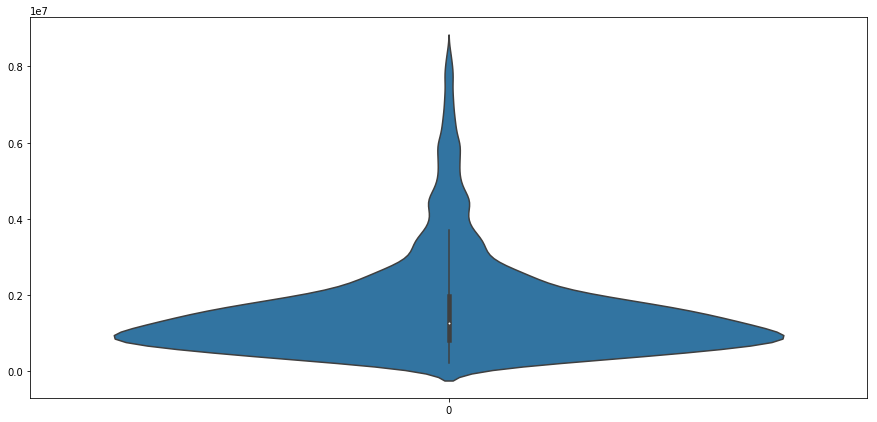

In [113]:
# violin plot

fig = plt.figure(figsize=(15,7))
sns.violinplot(data=s_df10_3['sale_price'])

# similar to the rental figure

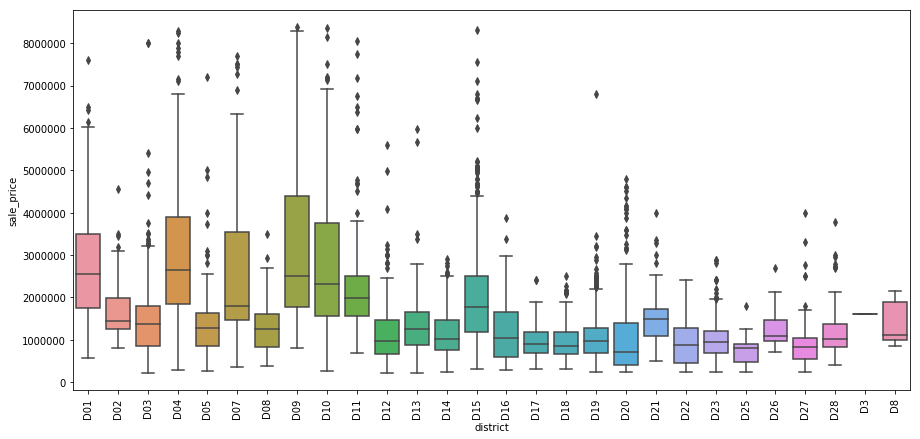

In [114]:
# boxplot of sale price by district

fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='district', y = 'sale_price', data = s_df10_3.sort_values(['district']))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

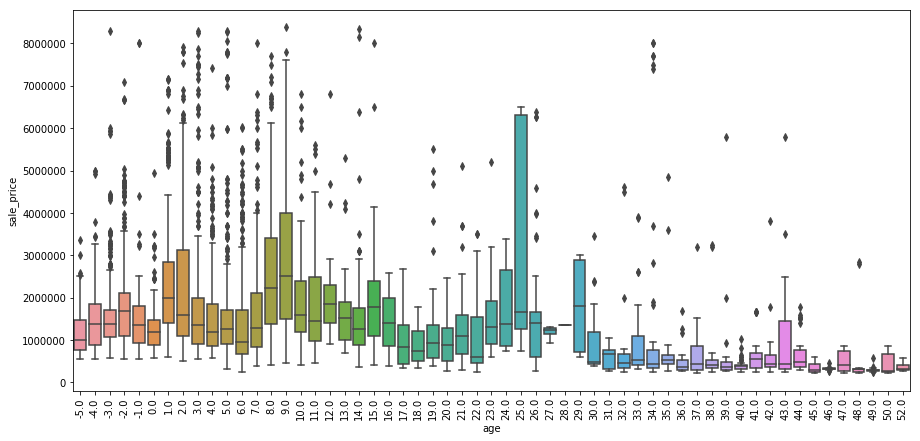

In [115]:
# boxplot of sale price by age of property

fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='age', y = 'sale_price', data = s_df10_3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# delete the ones where the age is negative

In [116]:
# drop the columns that are not required as well as the properties where the age is < 0 but still being rented out
s_df10_4 = s_df10_3.drop(s_df10_3[s_df10_3['age']<0].index, axis = 0)
s_df10_4.head()

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease
0,1 Canberra,Condominiums,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years
1,1 Dover Road,HDB Resale,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years
2,# 1 Loft,Condominiums,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
3,# 1 Loft,Condominiums,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold
4,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold


In [117]:
# lets check if the categorial data will give me the same as the rental data - district

sale_d_vc = pd.DataFrame(s_df10_4['district'].value_counts())
rent_d_vc = pd.DataFrame(r_df10_2['district'].value_counts())
pd.concat([sale_d_vc, rent_d_vc], axis=1, sort=True)

# D6 is missing 

,district,district
D01,261.0,323
D02,92.0,244
D03,189.0,271
D04,215.0,191
D05,158.0,298
D06,NaN,5
D07,75.0,107
D08,94.0,85
D09,367.0,1013
D10,259.0,667


In [118]:
# lets drop the 12 that are 929 years lease or 947 years lease or 101 years lease to tie both datasets together

df_droplist = s_df10_4[(s_df10_4['free_lease'] == '929 Years') | (s_df10_4['free_lease'] == '947 Years') | (s_df10_4['free_lease'] == '101 Years')].index

s_df10_5 = s_df10_4.drop(df_droplist, axis = 0)


In [119]:
# lets check the leases
sale_fl_vc = pd.DataFrame(s_df10_5['free_lease'].value_counts())
sale_fl_vc.columns = ['s_free_lease']
rent_fl_vc = pd.DataFrame(r_df10_3['free_lease'].value_counts())
pd.concat([sale_fl_vc, rent_fl_vc], axis=1, sort=True)

,s_free_lease,free_lease
100 Years,3.0,NaN
101 Years,NaN,1.0
103 Years,12.0,147.0
60 Years,7.0,1.0
946 Years,4.0,1.0
956 Years,15.0,14.0
99 Years,2966.0,2826.0
999 Years,86.0,144.0
Freehold,1403.0,2697.0


In [120]:
s_df10_6 = s_df10_5.copy()
s_df10_6['property_type'] = s_df10_5['property_type'].apply(lambda x: 'HDB' if x == 'HDB Resale' else x)

In [121]:
# get dummies for the ones that are related to the property

s_df11 = pd.concat([s_df10_6, pd.get_dummies(s_df10_6[['property_type','district','free_lease']],drop_first=True)], axis = 1)
s_df12 = s_df11.drop(['district','property_type','property_name','free_lease'], axis = 1)

print(s_df12.shape)
s_df12.head()

(4496, 44)


,property_title,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,...,district_D26,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold
0,1 Canberra,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,4.0,...,0,1,0,0,0,0,0,1,0,0
1,1 Dover Road,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,44.0,...,0,0,0,0,0,0,0,1,0,0
2,# 1 Loft,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,1
3,# 1 Loft,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,1
4,1 Moulmein Rise,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,16.0,...,0,0,0,0,0,0,0,0,0,1


In [122]:
# scale the data 

scaler = StandardScaler()
s_df13 = s_df12.copy()
s_df13['floor_sqft'] = scaler.fit_transform(s_df12[['floor_sqft']])
s_df13['beds'] = scaler.fit_transform(s_df12[['beds']])
s_df13['age'] = scaler.fit_transform(s_df12[['age']])
s_df13['mrt_nearest_distance'] = scaler.fit_transform(s_df12[['mrt_nearest_distance']])
s_df13.head()

,property_title,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,...,district_D26,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold
0,1 Canberra,918000.0,1 Canberra,YISHUN MRT STATION,0.629537,0.0,0.0,-0.088989,0.508073,-0.650415,...,0,1,0,0,0,0,0,1,0,0
1,1 Dover Road,310000.0,1 Dover Road,ONE-NORTH MRT STATION,-0.284919,0.0,1.0,-0.173114,-0.498225,2.475638,...,0,0,0,0,0,0,0,1,0,0
2,# 1 Loft,680000.0,1 Loft,ALJUNIED MRT STATION,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,...,0,0,0,0,0,0,0,0,0,1
3,# 1 Loft,681000.0,1 Loft,ALJUNIED MRT STATION,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,...,0,0,0,0,0,0,0,0,0,1
4,1 Moulmein Rise,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,-0.596808,0.0,0.0,0.005896,0.508073,0.287401,...,0,0,0,0,0,0,0,0,0,1


In [123]:
s_x = s_df13.drop(['property_title','property_title2','nearest_mrt','sale_price'], axis = 1)
print(s_x.shape)
s_x.head()

(4496, 40)


,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,property_type_HDB,property_type_Landed Houses,district_D02,district_D03,...,district_D26,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold
0,0.629537,0.0,0.0,-0.088989,0.508073,-0.650415,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.284919,0.0,1.0,-0.173114,-0.498225,2.475638,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.596808,0.0,0.0,0.005896,0.508073,0.287401,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
# adding missing district 6 from above

s_x['district_D06'] = 0

In [125]:
col_name_s = pd.DataFrame(s_x.columns.sort_values())
col_name_s.columns = ['col_name_s']

In [126]:
col_name_r = pd.DataFrame(x1.columns.sort_values())
col_name_r.columns = ['col_name_r']
concat = pd.concat([col_name_s, col_name_r], axis=1, sort=True)
for i, row in concat.iterrows():
    if row['col_name_s'] == row['col_name_r']:
        concat.loc[i,'check'] = 'ok'
    else:
        concat.loc[i,'check'] = 'error'
concat
# looks good

,col_name_s,col_name_r,check
0,age,age,ok
1,beds,beds,ok
2,district_D02,district_D02,ok
3,district_D03,district_D03,ok
4,district_D04,district_D04,ok
5,district_D05,district_D05,ok
6,district_D06,district_D06,ok
7,district_D07,district_D07,ok
8,district_D08,district_D08,ok
9,district_D09,district_D09,ok


In [127]:
s_x.head()

,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,age,property_type_HDB,property_type_Landed Houses,district_D02,district_D03,...,district_D27,district_D28,free_lease_103 Years,free_lease_60 Years,free_lease_946 Years,free_lease_956 Years,free_lease_99 Years,free_lease_999 Years,free_lease_Freehold,district_D06
0,0.629537,0.0,0.0,-0.088989,0.508073,-0.650415,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-0.284919,0.0,1.0,-0.173114,-0.498225,2.475638,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.555858,1.0,1.0,-0.218764,-1.504524,-0.650415,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.596808,0.0,0.0,0.005896,0.508073,0.287401,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [128]:
# resort columns according to x1 columns sequence

s_x_2 = s_x[x1.columns]

In [129]:
x_new = xgr_tune.best_estimator_
y_pred = x_new.predict(s_x_2)
s_df14 = s_df10_6.copy()
s_df14['y_pred'] = y_pred
s_df14.head()

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease,y_pred
0,1 Canberra,Condominiums,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years,1864.628296
1,1 Dover Road,HDB,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years,1626.872925
2,# 1 Loft,Condominiums,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303
3,# 1 Loft,Condominiums,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303
4,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold,4968.599121


In [130]:
s_df15 = s_df14.drop(s_df14[s_df14['y_pred']<0].index, axis = 0)

In [131]:
s_df15['annual_rent'] = s_df15['y_pred'] * 12
s_df15['yield%'] = round(s_df15['annual_rent'] / s_df14['sale_price']*100,2)
s_df15.head()

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease,y_pred,annual_rent,yield%
0,1 Canberra,Condominiums,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years,1864.628296,22375.539062,2.44
1,1 Dover Road,HDB,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years,1626.872925,19522.474609,6.30
2,# 1 Loft,Condominiums,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303,18363.722656,2.70
3,# 1 Loft,Condominiums,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303,18363.722656,2.70
4,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold,4968.599121,59623.187500,2.43


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


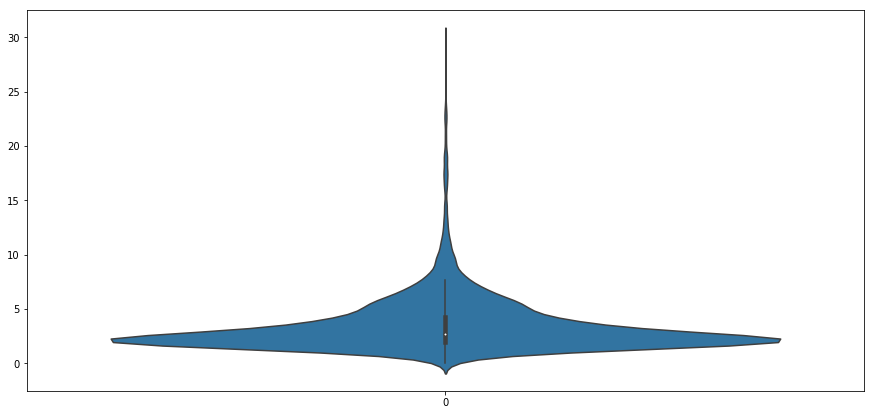

In [132]:
# violin plot of yield

fig = plt.figure(figsize=(15,7))
sns.violinplot(data=s_df15['yield%'])



In [133]:
# there are some property where the yield seems to be pretty high.. lets check it out

s_df15.sort_values(by = ['yield%'], ascending=False)

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease,y_pred,annual_rent,yield%
867,522 Woodlands Drive 14,HDB,438000.0,522 Woodlands Drive 14,WOODLANDS MRT STATION,0.707787,0.0,0.0,1367.0,4.0,D25,Fragrant Woods,19.0,99 Years,10918.308594,131019.703125,29.91
419,274B Jurong West Street 25,HDB,449000.0,274B Jurong West Street 25,BOON LAY MRT STATION,1.607865,0.0,0.0,1356.0,4.0,D22,Wenya,17.0,99 Years,10485.097656,125821.171875,28.02
986,660 Jalan Tenaga,HDB,588000.0,660 Jalan Tenaga,KAKI BUKIT MRT STATION,0.130965,1.0,1.0,1301.0,5.0,D14,Eunos Damai Ville,23.0,99 Years,12869.660156,154435.921875,26.26
826,504A Montreal Drive,HDB,460000.0,504A Montreal Drive,SEMBAWANG MRT STATION,0.516509,0.0,0.0,1399.0,4.0,D27,Montreal Spring,18.0,99 Years,9201.258789,110415.109375,24.00
828,504A Montreal Drive,HDB,475000.0,504A Montreal Drive,SEMBAWANG MRT STATION,0.516509,0.0,0.0,1399.0,4.0,D27,Montreal Spring,18.0,99 Years,9201.258789,110415.109375,23.25
827,504A Montreal Drive,HDB,475000.0,504A Montreal Drive,SEMBAWANG MRT STATION,0.516509,0.0,0.0,1399.0,4.0,D27,Montreal Spring,18.0,99 Years,9201.258789,110415.109375,23.25
276,203 Marsiling Drive,HDB,450000.0,203 Marsiling Drive,MARSILING MRT STATION,1.246493,0.0,0.0,1614.0,5.0,D25,Marsiling Admiralty Park,38.0,99 Years,8642.799805,103713.593750,23.05
1206,871 Tampines Street 84,HDB,485000.0,871 Tampines Street 84,TAMPINES MRT STATION,1.151748,1.0,1.0,1302.0,4.0,D18,Tampines Vista,30.0,99 Years,9123.432617,109481.187500,22.57
277,203 Marsiling Drive,HDB,450000.0,203 Marsiling Drive,MARSILING MRT STATION,1.246493,0.0,0.0,1614.0,4.0,D25,Marsiling Admiralty Park,38.0,99 Years,8393.228516,100718.742188,22.38
278,203 Marsiling Drive,HDB,450000.0,203 Marsiling Drive,MARSILING MRT STATION,1.246493,0.0,0.0,1614.0,4.0,D25,Marsiling Admiralty Park,38.0,99 Years,8393.228516,100718.742188,22.38


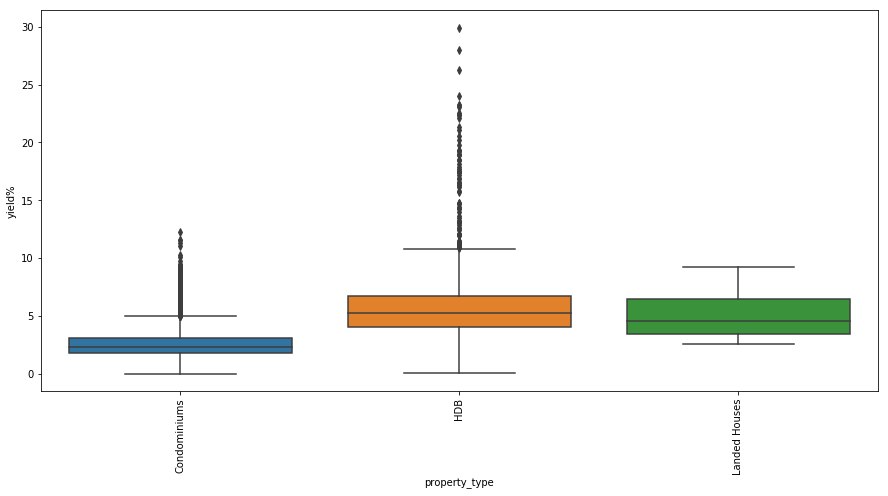

In [134]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x='property_type', y = 'yield%', data = s_df15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

property_type
Condominiums     AxesSubplot(0.125,0.125;0.775x0.755)
HDB              AxesSubplot(0.125,0.125;0.775x0.755)
Landed Houses    AxesSubplot(0.125,0.125;0.775x0.755)
Name: yield%, dtype: object

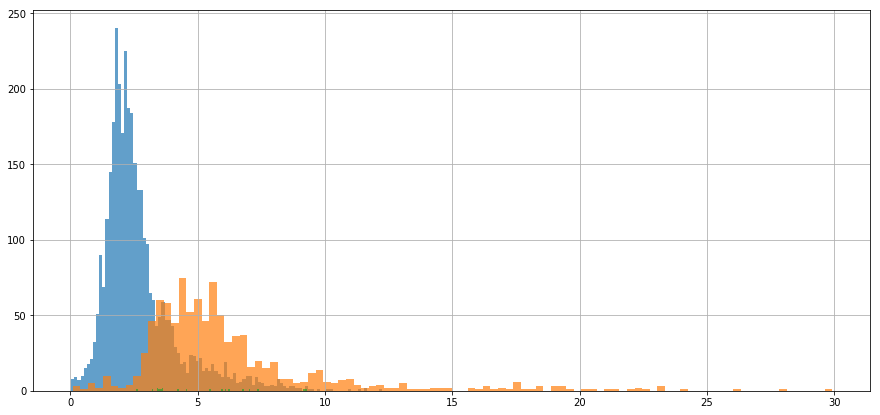

In [222]:
ax = plt.figure(figsize=(15,7))
s_df15.groupby('property_type')['yield%'].hist(bins=100, alpha = 0.7)


3454
475


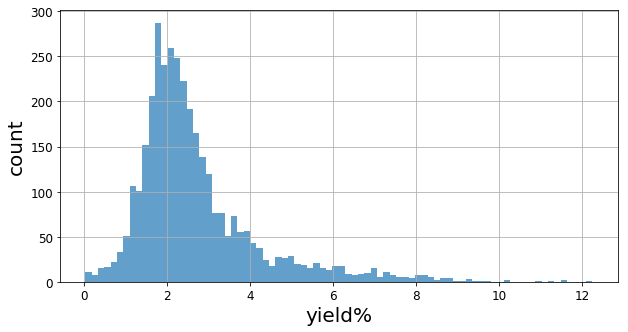

In [247]:
print(s_df15[s_df15['property_type'] == 'Condominiums']['yield%'].count())
print(s_df15[(s_df15['property_type'] == 'Condominiums') & (s_df15['yield%'] > 4)]['yield%'].count())

# plot condo yield%
ax = plt.figure(figsize=(10,5))
s_df15[s_df15['property_type'] == 'Condominiums']['yield%'].hist(bins=80, alpha = 0.7)
plt.xlabel('yield%',FontSize = 20)
plt.ylabel('count',FontSize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

In [135]:
s_df15.head()

,property_title,property_type,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease,y_pred,annual_rent,yield%
0,1 Canberra,Condominiums,918000.0,1 Canberra,YISHUN MRT STATION,1.052938,0.0,0.0,958.0,3.0,D27,1 Canberra,4.0,99 Years,1864.628296,22375.539062,2.44
1,1 Dover Road,HDB,310000.0,1 Dover Road,ONE-NORTH MRT STATION,0.558226,0.0,1.0,700.0,2.0,D05,Dover Court,44.0,99 Years,1626.872925,19522.474609,6.30
2,# 1 Loft,Condominiums,680000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303,18363.722656,2.70
3,# 1 Loft,Condominiums,681000.0,1 Loft,ALJUNIED MRT STATION,0.411651,1.0,1.0,560.0,1.0,D14,# 1 Loft,4.0,Freehold,1530.310303,18363.722656,2.70
4,1 Moulmein Rise,Condominiums,2450000.0,1 Moulmein Rise,NOVENA MRT STATION,0.389498,0.0,0.0,1249.0,3.0,D11,1 Moulmein Rise,16.0,Freehold,4968.599121,59623.187500,2.43


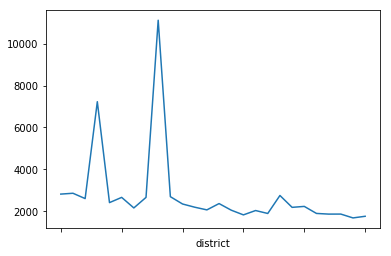

In [136]:
# median condo prediction by district

round(s_df15.groupby(['property_type', 'district'])['y_pred'].describe(),0).loc['Condominiums','50%'].plot()

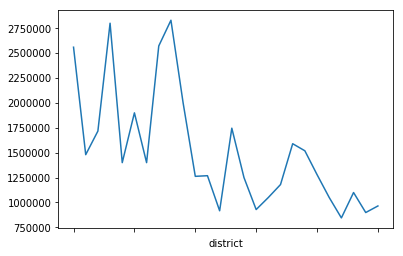

In [137]:
# median condo prediction by district

round(s_df15.groupby(['property_type', 'district'])['sale_price'].describe(),0).loc['Condominiums','50%'].plot()

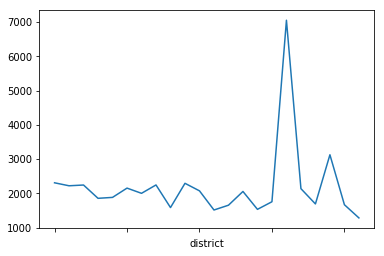

In [138]:
round(s_df15.groupby(['property_type', 'district'])['y_pred'].describe(),0).loc['HDB','50%'].plot()

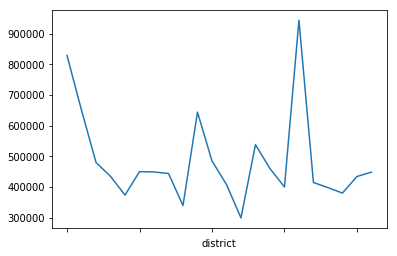

In [139]:
round(s_df15.groupby(['property_type', 'district'])['sale_price'].describe(),0).loc['HDB','50%'].plot()

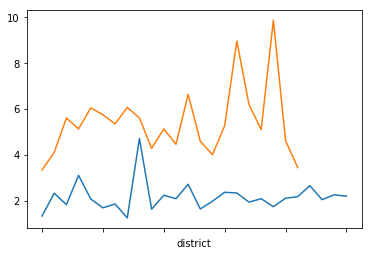

In [204]:
s_df16 = s_df15.groupby(['property_type', 'district'])['sale_price','annual_rent'].median()
s_df16['yield%'] = round(s_df16['annual_rent'] / s_df16['sale_price']*100,2)
s_df16.loc['Condominiums','yield%'].plot()
s_df16.loc['HDB','yield%'].plot()

In [212]:
s_df16.loc['HDB','yield%'].mean()

5.435454545454545

In [140]:
hc_df = s_df15.groupby(['property_type', 'district'])['yield%'].describe()
s_df15.groupby(['property_type']).count()

,property_title,sale_price,property_title2,nearest_mrt,mrt_nearest_distance,within1km_to_tpri,within2km_to_tpri,floor_sqft,beds,district,property_name,age,free_lease,y_pred,annual_rent,yield%
property_type,,,,,,,,,,,,,,,,
Condominiums,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454
HDB,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958
Landed Houses,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [168]:
c_df2 = hc_df.loc['Condominiums','50%']
c_df3 = c_df2.reset_index()
print(c_df3['50%'].mean())

2.3626923076923076


In [169]:
h_df2 = hc_df.loc['HDB','50%']
h_df3 = h_df2.reset_index()
print(h_df3['50%'].mean())

5.866363636363636


In [185]:
h_df3['type'] = 'HDB'
h_df3.columns = ['district', 'yield%','type']
c_df3['type'] = 'condo'
c_df3.columns = ['district', 'yield%','type']
ch_df3 = h_df3.append(c_df3)
ch_df4 = ch_df3.sort_values(by = 'district').reset_index()
ch_df4.head()

,index,district,yield%,type
0,0,D01,1.920,condo
1,0,D02,3.280,HDB
2,1,D02,2.030,condo
3,2,D03,2.125,condo
4,1,D03,4.420,HDB


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


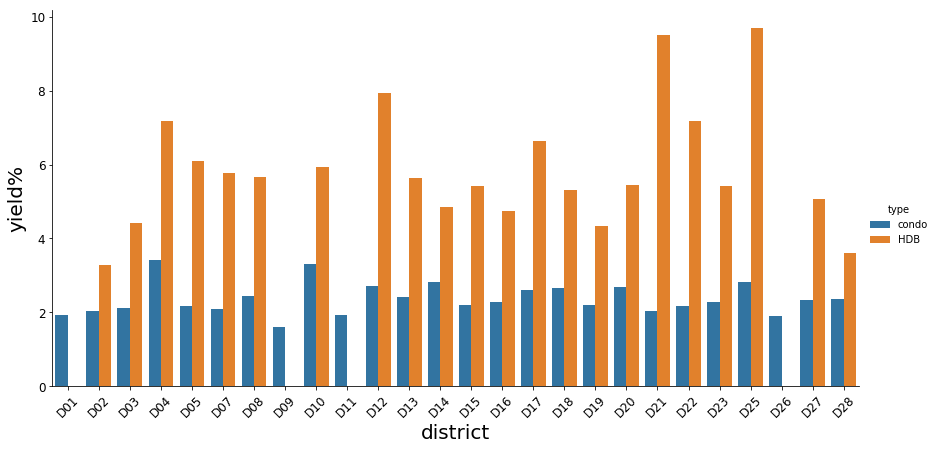

In [209]:
# ax = plt.figure(figsize=(15,7))
ax = sns.factorplot(x = 'district' , y = 'yield%', data = ch_df4, hue = 'type', kind='bar', size=6, aspect=2)
# ax = sns.factorplot(x = 'district' , y = '50%', data = h_df3, kind='bar')
# ax = sns.factorplot(x = h_df3['district'] , y = h_df3['50%'],kind='bar')
# plt.legend(['HDB Yield%','Condo Yield%'], fontsize = 15)

# ax = sns.lineplot(x = c_df3['district'] , y = c_df3['yield%'].mean())
# ax = sns.lineplot(x = c_df3['district'] , y = h_df3['yield%'].mean())
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('district',FontSize = 20)
plt.ylabel('yield%',FontSize = 20)
plt.tick_params(axis='x', which='major', labelsize=12,rotation = 45)
plt.tick_params(axis='y', which='major', labelsize=12)

#Calculate optimal width
# ax = fig.add_subplot(111)

# fig = plt.figure()
# sns.factorplot(x = 'investors', y='value', hue = 'investments',data=dfs1, kind='bar')
# plt.show()


In [144]:
s_df14.groupby(['property_type', 'district'])['yield%'].describe()

KeyError: 'Column not found: yield%'

In [ ]:
s_df14[s_df14['yield%']>10].sort_values(by='yield%', ascending = False)[['property_title','property_type','mrt_nearest_distance','sale_price','annual_rent','yield%']]
